In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
df = pd.read_csv('day.csv')

In [8]:
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [9]:
df.drop(['instant','dteday','weekday','temp'],axis=1,inplace=True)

In [10]:
df

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,2,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,2,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,1,1,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,1,1,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,1,2,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,1,2,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,0,2,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,1,0.231700,0.483333,0.350754,364,1432,1796


In [11]:
#scaling of data
df['season'] = df['season']/4
df['mnth'] = df['mnth']/12

In [12]:
scale = MinMaxScaler()
df[['casual','registered']] = scale.fit_transform(df[['casual','registered']])

In [13]:
#splitting our dataset into train and test with 0.25 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

In [34]:
model = Sequential()

model.add(Dense(200,input_shape=[X.shape[1]]))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('tanh'))

model.add(Dense(50))
model.add(Activation('tanh'))

model.add(Dropout(0.5))

model.add(Dense(25))
model.add(Activation('relu'))

model.add(Dense(1))


# Here I used Mean squared error as loss and RMSprop as my optimizer and I also monitored Mean absolute error
model.compile(optimizer='RMSprop',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 200)               2400      
_________________________________________________________________
activation_25 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               20100     
_________________________________________________________________
activation_26 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_27 (Activation)   (None, 50)               

<h3> Since loss is fluctuating, We ensure to save the best model with lower loss

In [35]:
call = ModelCheckpoint('bike_day.h5',save_best_only=True,verbose=1)

In [36]:
history = model.fit(X_train,y_train,epochs=5000,verbose=1,validation_split=0.15,callbacks=[call])

Epoch 1/5000
 1/15 [=>............................] - ETA: 0s - loss: 28912540.0000 - mse: 28912540.0000 - mae: 4897.9922
Epoch 00001: val_loss improved from inf to 23814434.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 9ms/step - loss: 24416118.0000 - mse: 24416118.0000 - mae: 4549.7061 - val_loss: 23814434.0000 - val_mse: 23814434.0000 - val_mae: 4455.6538
Epoch 2/5000
 1/15 [=>............................] - ETA: 0s - loss: 28571820.0000 - mse: 28571820.0000 - mae: 5058.2324
Epoch 00002: val_loss improved from 23814434.00000 to 23755800.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 4ms/step - loss: 24331904.0000 - mse: 24331904.0000 - mae: 4540.3315 - val_loss: 23755800.0000 - val_mse: 23755800.0000 - val_mae: 4448.9136
Epoch 3/5000
 1/15 [=>............................] - ETA: 0s - loss: 24108392.0000 - mse: 24108392.0000 - mae: 4529.0166
Epoch 00003: val_loss improved from 23755800.00000 to 23709362.00000, saving mo

 1/15 [=>............................] - ETA: 0s - loss: 28086636.0000 - mse: 28086636.0000 - mae: 5012.6865
Epoch 00021: val_loss improved from 22473468.00000 to 22374398.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 4ms/step - loss: 22960666.0000 - mse: 22960666.0000 - mae: 4387.0918 - val_loss: 22374398.0000 - val_mse: 22374398.0000 - val_mae: 4290.7603
Epoch 22/5000
 1/15 [=>............................] - ETA: 0s - loss: 23134906.0000 - mse: 23134906.0000 - mae: 4372.5977
Epoch 00022: val_loss improved from 22374398.00000 to 22269612.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 4ms/step - loss: 22849100.0000 - mse: 22849100.0000 - mae: 4374.7065 - val_loss: 22269612.0000 - val_mse: 22269612.0000 - val_mae: 4278.5322
Epoch 23/5000
 1/15 [=>............................] - ETA: 0s - loss: 26442842.0000 - mse: 26442842.0000 - mae: 4712.3823
Epoch 00023: val_loss improved from 22269612.00000 to 22165606.00000, saving mo

 1/15 [=>............................] - ETA: 0s - loss: 21042896.0000 - mse: 21042896.0000 - mae: 4245.1460
Epoch 00041: val_loss improved from 19974984.00000 to 19824486.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 20390202.0000 - mse: 20390202.0000 - mae: 4084.0586 - val_loss: 19824486.0000 - val_mse: 19824486.0000 - val_mae: 3982.5508
Epoch 42/5000
 1/15 [=>............................] - ETA: 0s - loss: 23704242.0000 - mse: 23704242.0000 - mae: 4314.7310
Epoch 00042: val_loss improved from 19824486.00000 to 19672600.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 20218088.0000 - mse: 20218088.0000 - mae: 4064.3938 - val_loss: 19672600.0000 - val_mse: 19672600.0000 - val_mae: 3963.4360
Epoch 43/5000
 1/15 [=>............................] - ETA: 0s - loss: 18171584.0000 - mse: 18171584.0000 - mae: 3948.6665
Epoch 00043: val_loss improved from 19672600.00000 to 19517894.00000, saving mo

 1/15 [=>............................] - ETA: 0s - loss: 13744724.0000 - mse: 13744724.0000 - mae: 3430.2949
Epoch 00061: val_loss improved from 16619301.00000 to 16431823.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 16843432.0000 - mse: 16843432.0000 - mae: 3637.8735 - val_loss: 16431823.0000 - val_mse: 16431823.0000 - val_mae: 3531.0125
Epoch 62/5000
 1/15 [=>............................] - ETA: 0s - loss: 14725106.0000 - mse: 14725106.0000 - mae: 3479.7485
Epoch 00062: val_loss improved from 16431823.00000 to 16249989.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 16702713.0000 - mse: 16702713.0000 - mae: 3614.6338 - val_loss: 16249989.0000 - val_mse: 16249989.0000 - val_mae: 3505.1694
Epoch 63/5000
 1/15 [=>............................] - ETA: 0s - loss: 17147654.0000 - mse: 17147654.0000 - mae: 3618.2412
Epoch 00063: val_loss improved from 16249989.00000 to 16064591.00000, saving mo

 1/15 [=>............................] - ETA: 0s - loss: 11386307.0000 - mse: 11386307.0000 - mae: 2917.7163
Epoch 00081: val_loss improved from 12804810.00000 to 12612305.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 13152073.0000 - mse: 13152073.0000 - mae: 3132.6101 - val_loss: 12612305.0000 - val_mse: 12612305.0000 - val_mae: 2981.2803
Epoch 82/5000
 1/15 [=>............................] - ETA: 0s - loss: 13027568.0000 - mse: 13027568.0000 - mae: 3183.4888
Epoch 00082: val_loss improved from 12612305.00000 to 12416962.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 12881794.0000 - mse: 12881794.0000 - mae: 3094.5122 - val_loss: 12416962.0000 - val_mse: 12416962.0000 - val_mae: 2952.2903
Epoch 83/5000
 1/15 [=>............................] - ETA: 0s - loss: 11477772.0000 - mse: 11477772.0000 - mae: 2935.5120
Epoch 00083: val_loss improved from 12416962.00000 to 12221422.00000, saving mo

Epoch 102/5000
 1/15 [=>............................] - ETA: 0s - loss: 9786895.0000 - mse: 9786895.0000 - mae: 2621.3567
Epoch 00102: val_loss improved from 8865673.00000 to 8691337.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 9094692.0000 - mse: 9094692.0000 - mae: 2554.2234 - val_loss: 8691337.0000 - val_mse: 8691337.0000 - val_mae: 2376.0728
Epoch 103/5000
 1/15 [=>............................] - ETA: 0s - loss: 10416455.0000 - mse: 10416455.0000 - mae: 2743.5347
Epoch 00103: val_loss improved from 8691337.00000 to 8516645.00000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 8780954.0000 - mse: 8780954.0000 - mae: 2498.4807 - val_loss: 8516645.0000 - val_mse: 8516645.0000 - val_mae: 2348.9661
Epoch 104/5000
 1/15 [=>............................] - ETA: 0s - loss: 6770526.5000 - mse: 6770526.5000 - mae: 2207.2415
Epoch 00104: val_loss improved from 8516645.00000 to 8344340.00000, saving mod

Epoch 123/5000
 1/15 [=>............................] - ETA: 0s - loss: 6131905.5000 - mse: 6131905.5000 - mae: 2153.3708
Epoch 00123: val_loss improved from 5704317.00000 to 5586004.50000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 5828478.5000 - mse: 5828478.5000 - mae: 2016.5089 - val_loss: 5586004.5000 - val_mse: 5586004.5000 - val_mae: 1920.2211
Epoch 124/5000
 1/15 [=>............................] - ETA: 0s - loss: 6495175.5000 - mse: 6495175.5000 - mae: 2127.9561
Epoch 00124: val_loss improved from 5586004.50000 to 5477161.50000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 5633722.0000 - mse: 5633722.0000 - mae: 1967.2856 - val_loss: 5477161.5000 - val_mse: 5477161.5000 - val_mae: 1904.1573
Epoch 125/5000
 1/15 [=>............................] - ETA: 0s - loss: 5983000.0000 - mse: 5983000.0000 - mae: 1988.0165
Epoch 00125: val_loss improved from 5477161.50000 to 5368683.00000, saving model

Epoch 144/5000
 1/15 [=>............................] - ETA: 0s - loss: 2737782.7500 - mse: 2737782.7500 - mae: 1314.4871
Epoch 00144: val_loss improved from 2848012.75000 to 2745548.75000, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 2874424.7500 - mse: 2874424.7500 - mae: 1243.8220 - val_loss: 2745548.7500 - val_mse: 2745548.7500 - val_mae: 1168.7826
Epoch 145/5000
 1/15 [=>............................] - ETA: 0s - loss: 2089769.0000 - mse: 2089769.0000 - mae: 1053.9246
Epoch 00145: val_loss improved from 2745548.75000 to 2658811.25000, saving model to bike_day.h5
15/15 [==============================] - 0s 4ms/step - loss: 2826692.2500 - mse: 2826692.2500 - mae: 1263.6462 - val_loss: 2658811.2500 - val_mse: 2658811.2500 - val_mae: 1149.1888
Epoch 146/5000
 1/15 [=>............................] - ETA: 0s - loss: 3373855.2500 - mse: 3373855.2500 - mae: 1427.9744
Epoch 00146: val_loss improved from 2658811.25000 to 2566571.25000, saving model

Epoch 165/5000
 1/15 [=>............................] - ETA: 0s - loss: 1762939.6250 - mse: 1762939.6250 - mae: 1046.2947
Epoch 00165: val_loss improved from 1199284.75000 to 1185369.50000, saving model to bike_day.h5
15/15 [==============================] - 0s 4ms/step - loss: 1542750.7500 - mse: 1542750.7500 - mae: 950.8989 - val_loss: 1185369.5000 - val_mse: 1185369.5000 - val_mae: 717.5799
Epoch 166/5000
 1/15 [=>............................] - ETA: 0s - loss: 1473204.5000 - mse: 1473204.5000 - mae: 886.2014
Epoch 00166: val_loss improved from 1185369.50000 to 1114576.37500, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 1362174.5000 - mse: 1362174.5000 - mae: 895.0889 - val_loss: 1114576.3750 - val_mse: 1114576.3750 - val_mae: 677.4337
Epoch 167/5000
 1/15 [=>............................] - ETA: 0s - loss: 1757945.0000 - mse: 1757945.0000 - mae: 933.8133
Epoch 00167: val_loss improved from 1114576.37500 to 1052729.75000, saving model to bi

 1/15 [=>............................] - ETA: 0s - loss: 979890.3750 - mse: 979890.3750 - mae: 765.6355
Epoch 00186: val_loss improved from 484576.43750 to 447729.15625, saving model to bike_day.h5
15/15 [==============================] - 0s 4ms/step - loss: 838938.5625 - mse: 838938.5625 - mae: 696.1663 - val_loss: 447729.1562 - val_mse: 447729.1562 - val_mae: 441.5777
Epoch 187/5000
 1/15 [=>............................] - ETA: 0s - loss: 633585.7500 - mse: 633585.7500 - mae: 602.8644
Epoch 00187: val_loss improved from 447729.15625 to 410083.62500, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 802320.5625 - mse: 802320.5625 - mae: 682.8701 - val_loss: 410083.6250 - val_mse: 410083.6250 - val_mae: 396.4714
Epoch 188/5000
 1/15 [=>............................] - ETA: 0s - loss: 841637.3750 - mse: 841637.3750 - mae: 711.2003
Epoch 00188: val_loss improved from 410083.62500 to 408740.53125, saving model to bike_day.h5
15/15 [===================

 1/15 [=>............................] - ETA: 0s - loss: 553322.1250 - mse: 553322.1250 - mae: 571.4587
Epoch 00208: val_loss did not improve from 192076.79688
15/15 [==============================] - 0s 2ms/step - loss: 622062.0625 - mse: 622062.0625 - mae: 603.1689 - val_loss: 207890.7188 - val_mse: 207890.7188 - val_mae: 301.3192
Epoch 209/5000
 1/15 [=>............................] - ETA: 0s - loss: 762503.3125 - mse: 762503.3125 - mae: 700.1299
Epoch 00209: val_loss did not improve from 192076.79688
15/15 [==============================] - 0s 2ms/step - loss: 687729.3125 - mse: 687729.3125 - mae: 643.6654 - val_loss: 256177.2500 - val_mse: 256177.2500 - val_mae: 409.7877
Epoch 210/5000
 1/15 [=>............................] - ETA: 0s - loss: 717056.3750 - mse: 717056.3750 - mae: 673.1531
Epoch 00210: val_loss improved from 192076.79688 to 186527.76562, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 659624.1250 - mse: 659624.1250 - mae: 614

Epoch 231/5000
 1/15 [=>............................] - ETA: 0s - loss: 929307.4375 - mse: 929307.4375 - mae: 744.6312
Epoch 00231: val_loss did not improve from 127899.44531
15/15 [==============================] - 0s 2ms/step - loss: 720982.2500 - mse: 720982.2500 - mae: 641.9196 - val_loss: 167535.2969 - val_mse: 167535.2969 - val_mae: 311.0751
Epoch 232/5000
 1/15 [=>............................] - ETA: 0s - loss: 479758.9375 - mse: 479758.9375 - mae: 494.2444
Epoch 00232: val_loss did not improve from 127899.44531
15/15 [==============================] - 0s 3ms/step - loss: 663727.1875 - mse: 663727.1875 - mae: 598.9725 - val_loss: 137244.6875 - val_mse: 137244.6875 - val_mae: 267.2331
Epoch 233/5000
 1/15 [=>............................] - ETA: 0s - loss: 651738.9375 - mse: 651738.9375 - mae: 581.2173
Epoch 00233: val_loss did not improve from 127899.44531
15/15 [==============================] - 0s 3ms/step - loss: 614037.7500 - mse: 614037.7500 - mae: 581.0444 - val_loss: 16607

Epoch 254/5000
 1/15 [=>............................] - ETA: 0s - loss: 922115.1250 - mse: 922115.1250 - mae: 753.1538
Epoch 00254: val_loss did not improve from 94362.77344
15/15 [==============================] - 0s 2ms/step - loss: 631963.1875 - mse: 631963.1875 - mae: 598.4697 - val_loss: 164385.0625 - val_mse: 164385.0625 - val_mae: 312.3474
Epoch 255/5000
 1/15 [=>............................] - ETA: 0s - loss: 510454.8125 - mse: 510454.8125 - mae: 564.5889
Epoch 00255: val_loss did not improve from 94362.77344
15/15 [==============================] - 0s 2ms/step - loss: 656663.1875 - mse: 656663.1875 - mae: 600.1483 - val_loss: 116393.7500 - val_mse: 116393.7500 - val_mae: 249.0806
Epoch 256/5000
 1/15 [=>............................] - ETA: 0s - loss: 953534.3125 - mse: 953534.3125 - mae: 757.6093
Epoch 00256: val_loss did not improve from 94362.77344
15/15 [==============================] - 0s 2ms/step - loss: 602331.3750 - mse: 602331.3750 - mae: 598.4992 - val_loss: 96691.50

 1/15 [=>............................] - ETA: 0s - loss: 611985.5000 - mse: 611985.5000 - mae: 583.3501
Epoch 00277: val_loss did not improve from 74663.51562
15/15 [==============================] - 0s 3ms/step - loss: 585063.9375 - mse: 585063.9375 - mae: 588.6936 - val_loss: 74806.7500 - val_mse: 74806.7500 - val_mae: 182.5592
Epoch 278/5000
 1/15 [=>............................] - ETA: 0s - loss: 362014.2500 - mse: 362014.2500 - mae: 393.9977
Epoch 00278: val_loss did not improve from 74663.51562
15/15 [==============================] - 0s 3ms/step - loss: 584209.0625 - mse: 584209.0625 - mae: 592.6197 - val_loss: 85800.8906 - val_mse: 85800.8906 - val_mae: 180.8864
Epoch 279/5000
 1/15 [=>............................] - ETA: 0s - loss: 450222.2188 - mse: 450222.2188 - mae: 538.8469
Epoch 00279: val_loss did not improve from 74663.51562
15/15 [==============================] - 0s 3ms/step - loss: 657718.5625 - mse: 657718.5625 - mae: 613.7961 - val_loss: 83663.5312 - val_mse: 83663

Epoch 301/5000
 1/15 [=>............................] - ETA: 0s - loss: 641053.4375 - mse: 641053.4375 - mae: 595.5922
Epoch 00301: val_loss did not improve from 62665.43359
15/15 [==============================] - 0s 2ms/step - loss: 637227.8750 - mse: 637227.8750 - mae: 605.4617 - val_loss: 105469.2188 - val_mse: 105469.2188 - val_mae: 250.6219
Epoch 302/5000
 1/15 [=>............................] - ETA: 0s - loss: 298431.9375 - mse: 298431.9375 - mae: 470.6071
Epoch 00302: val_loss improved from 62665.43359 to 59553.87891, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 562595.2500 - mse: 562595.2500 - mae: 565.0272 - val_loss: 59553.8789 - val_mse: 59553.8789 - val_mae: 161.8176
Epoch 303/5000
 1/15 [=>............................] - ETA: 0s - loss: 462077.6250 - mse: 462077.6250 - mae: 510.4235
Epoch 00303: val_loss did not improve from 59553.87891
15/15 [==============================] - 0s 2ms/step - loss: 599525.7500 - mse: 599525.7500 -

 1/15 [=>............................] - ETA: 0s - loss: 244432.7344 - mse: 244432.7344 - mae: 386.1867
Epoch 00324: val_loss did not improve from 54251.74219
15/15 [==============================] - 0s 3ms/step - loss: 520825.7188 - mse: 520825.7188 - mae: 542.4712 - val_loss: 68262.0156 - val_mse: 68262.0156 - val_mae: 192.9095
Epoch 325/5000
 1/15 [=>............................] - ETA: 0s - loss: 411489.8750 - mse: 411489.8750 - mae: 498.2200
Epoch 00325: val_loss did not improve from 54251.74219
15/15 [==============================] - 0s 2ms/step - loss: 506846.4375 - mse: 506846.4375 - mae: 530.9858 - val_loss: 68089.3281 - val_mse: 68089.3281 - val_mae: 187.9175
Epoch 326/5000
 1/15 [=>............................] - ETA: 0s - loss: 619190.6250 - mse: 619190.6250 - mae: 579.4318
Epoch 00326: val_loss did not improve from 54251.74219
15/15 [==============================] - 0s 2ms/step - loss: 569818.0000 - mse: 569818.0000 - mae: 577.8893 - val_loss: 66980.8828 - val_mse: 66980

Epoch 348/5000
 1/15 [=>............................] - ETA: 0s - loss: 668821.3750 - mse: 668821.3750 - mae: 576.6641
Epoch 00348: val_loss did not improve from 50975.27734
15/15 [==============================] - 0s 3ms/step - loss: 534776.3750 - mse: 534776.3750 - mae: 557.6720 - val_loss: 65380.7812 - val_mse: 65380.7812 - val_mae: 178.5910
Epoch 349/5000
 1/15 [=>............................] - ETA: 0s - loss: 430766.0938 - mse: 430766.0938 - mae: 442.7535
Epoch 00349: val_loss did not improve from 50975.27734
15/15 [==============================] - 0s 2ms/step - loss: 577548.6875 - mse: 577548.6875 - mae: 546.8463 - val_loss: 66149.3984 - val_mse: 66149.3984 - val_mae: 206.7480
Epoch 350/5000
 1/15 [=>............................] - ETA: 0s - loss: 577498.1250 - mse: 577498.1250 - mae: 527.2128
Epoch 00350: val_loss did not improve from 50975.27734
15/15 [==============================] - 0s 2ms/step - loss: 560373.0000 - mse: 560373.0000 - mae: 560.3561 - val_loss: 228502.7969 

Epoch 372/5000
 1/15 [=>............................] - ETA: 0s - loss: 390811.7500 - mse: 390811.7500 - mae: 472.8409
Epoch 00372: val_loss did not improve from 49454.06641
15/15 [==============================] - 0s 2ms/step - loss: 493158.0312 - mse: 493158.0312 - mae: 528.1844 - val_loss: 127585.2031 - val_mse: 127585.2031 - val_mae: 312.1611
Epoch 373/5000
 1/15 [=>............................] - ETA: 0s - loss: 752057.7500 - mse: 752057.7500 - mae: 669.3986
Epoch 00373: val_loss did not improve from 49454.06641
15/15 [==============================] - 0s 2ms/step - loss: 567348.5000 - mse: 567348.5000 - mae: 571.1012 - val_loss: 59074.4805 - val_mse: 59074.4805 - val_mae: 186.5366
Epoch 374/5000
 1/15 [=>............................] - ETA: 0s - loss: 509101.8438 - mse: 509101.8438 - mae: 515.0532
Epoch 00374: val_loss improved from 49454.06641 to 49366.89062, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 532872.6875 - mse: 532872.6875 -

 1/15 [=>............................] - ETA: 0s - loss: 584445.4375 - mse: 584445.4375 - mae: 543.1437
Epoch 00395: val_loss did not improve from 47585.57422
15/15 [==============================] - 0s 2ms/step - loss: 528394.7500 - mse: 528394.7500 - mae: 557.5887 - val_loss: 69170.6641 - val_mse: 69170.6641 - val_mae: 202.2847
Epoch 396/5000
 1/15 [=>............................] - ETA: 0s - loss: 464662.1562 - mse: 464662.1562 - mae: 480.3624
Epoch 00396: val_loss did not improve from 47585.57422
15/15 [==============================] - 0s 3ms/step - loss: 564775.1250 - mse: 564775.1250 - mae: 564.7549 - val_loss: 52932.0352 - val_mse: 52932.0352 - val_mae: 151.8758
Epoch 397/5000
 1/15 [=>............................] - ETA: 0s - loss: 358598.5312 - mse: 358598.5312 - mae: 480.3664
Epoch 00397: val_loss did not improve from 47585.57422
15/15 [==============================] - 0s 3ms/step - loss: 537832.8125 - mse: 537832.8125 - mae: 562.5966 - val_loss: 58650.7109 - val_mse: 58650

Epoch 419/5000
 1/15 [=>............................] - ETA: 0s - loss: 494365.5938 - mse: 494365.5938 - mae: 482.0364
Epoch 00419: val_loss did not improve from 47585.57422
15/15 [==============================] - 0s 3ms/step - loss: 507984.0625 - mse: 507984.0625 - mae: 531.0707 - val_loss: 90863.7422 - val_mse: 90863.7422 - val_mae: 243.1254
Epoch 420/5000
 1/15 [=>............................] - ETA: 0s - loss: 710364.6250 - mse: 710364.6250 - mae: 662.3269
Epoch 00420: val_loss did not improve from 47585.57422
15/15 [==============================] - 0s 3ms/step - loss: 552134.0625 - mse: 552134.0625 - mae: 550.0776 - val_loss: 149871.1719 - val_mse: 149871.1719 - val_mae: 333.9210
Epoch 421/5000
 1/15 [=>............................] - ETA: 0s - loss: 485446.3750 - mse: 485446.3750 - mae: 571.9653
Epoch 00421: val_loss did not improve from 47585.57422
15/15 [==============================] - 0s 3ms/step - loss: 516335.5625 - mse: 516335.5625 - mae: 547.2891 - val_loss: 62505.8086

Epoch 443/5000
 1/15 [=>............................] - ETA: 0s - loss: 448392.6562 - mse: 448392.6562 - mae: 475.9275
Epoch 00443: val_loss did not improve from 38604.26953
15/15 [==============================] - 0s 2ms/step - loss: 504998.7500 - mse: 504998.7500 - mae: 533.6522 - val_loss: 142609.4531 - val_mse: 142609.4531 - val_mae: 329.0619
Epoch 444/5000
 1/15 [=>............................] - ETA: 0s - loss: 462030.2500 - mse: 462030.2500 - mae: 556.6910
Epoch 00444: val_loss did not improve from 38604.26953
15/15 [==============================] - 0s 2ms/step - loss: 541169.2500 - mse: 541169.2500 - mae: 571.0720 - val_loss: 52260.6562 - val_mse: 52260.6562 - val_mae: 161.9133
Epoch 445/5000
 1/15 [=>............................] - ETA: 0s - loss: 651150.2500 - mse: 651150.2500 - mae: 627.3795
Epoch 00445: val_loss did not improve from 38604.26953
15/15 [==============================] - 0s 3ms/step - loss: 553836.1875 - mse: 553836.1875 - mae: 563.6028 - val_loss: 41939.9102

Epoch 467/5000
 1/15 [=>............................] - ETA: 0s - loss: 487032.1250 - mse: 487032.1250 - mae: 546.2450
Epoch 00467: val_loss did not improve from 38604.26953
15/15 [==============================] - 0s 3ms/step - loss: 478693.6875 - mse: 478693.6875 - mae: 527.2011 - val_loss: 55843.6797 - val_mse: 55843.6797 - val_mae: 178.1916
Epoch 468/5000
 1/15 [=>............................] - ETA: 0s - loss: 482814.4688 - mse: 482814.4688 - mae: 542.7604
Epoch 00468: val_loss did not improve from 38604.26953
15/15 [==============================] - 0s 2ms/step - loss: 510747.0938 - mse: 510747.0938 - mae: 549.6644 - val_loss: 41656.2930 - val_mse: 41656.2930 - val_mae: 134.1897
Epoch 469/5000
 1/15 [=>............................] - ETA: 0s - loss: 694820.1250 - mse: 694820.1250 - mae: 612.3147
Epoch 00469: val_loss did not improve from 38604.26953
15/15 [==============================] - 0s 3ms/step - loss: 574390.6250 - mse: 574390.6250 - mae: 565.4995 - val_loss: 48547.9258 -

Epoch 491/5000
 1/15 [=>............................] - ETA: 0s - loss: 564314.2500 - mse: 564314.2500 - mae: 610.0815
Epoch 00491: val_loss did not improve from 38604.26953
15/15 [==============================] - 0s 2ms/step - loss: 516329.5312 - mse: 516329.5312 - mae: 539.6108 - val_loss: 39153.9297 - val_mse: 39153.9297 - val_mae: 131.6646
Epoch 492/5000
 1/15 [=>............................] - ETA: 0s - loss: 664911.5000 - mse: 664911.5000 - mae: 629.1144
Epoch 00492: val_loss did not improve from 38604.26953
15/15 [==============================] - 0s 2ms/step - loss: 550758.3125 - mse: 550758.3125 - mae: 559.4028 - val_loss: 41707.1680 - val_mse: 41707.1680 - val_mae: 135.8813
Epoch 493/5000
 1/15 [=>............................] - ETA: 0s - loss: 702392.7500 - mse: 702392.7500 - mae: 614.8068
Epoch 00493: val_loss did not improve from 38604.26953
15/15 [==============================] - 0s 2ms/step - loss: 542016.7500 - mse: 542016.7500 - mae: 543.3573 - val_loss: 88697.9297 -

Epoch 515/5000
 1/15 [=>............................] - ETA: 0s - loss: 531523.6250 - mse: 531523.6250 - mae: 561.5856
Epoch 00515: val_loss did not improve from 37453.60938
15/15 [==============================] - 0s 2ms/step - loss: 491083.1250 - mse: 491083.1250 - mae: 525.5139 - val_loss: 172486.3594 - val_mse: 172486.3594 - val_mae: 365.2233
Epoch 516/5000
 1/15 [=>............................] - ETA: 0s - loss: 541134.8750 - mse: 541134.8750 - mae: 606.5054
Epoch 00516: val_loss did not improve from 37453.60938
15/15 [==============================] - 0s 2ms/step - loss: 517043.9375 - mse: 517043.9375 - mae: 544.4280 - val_loss: 63364.0859 - val_mse: 63364.0859 - val_mae: 205.3454
Epoch 517/5000
 1/15 [=>............................] - ETA: 0s - loss: 390423.0625 - mse: 390423.0625 - mae: 497.2885
Epoch 00517: val_loss did not improve from 37453.60938
15/15 [==============================] - 0s 3ms/step - loss: 518172.8125 - mse: 518172.8125 - mae: 537.2924 - val_loss: 59469.3789

Epoch 539/5000
 1/15 [=>............................] - ETA: 0s - loss: 626610.6250 - mse: 626610.6250 - mae: 702.8601
Epoch 00539: val_loss did not improve from 35512.32812
15/15 [==============================] - 0s 3ms/step - loss: 429231.9062 - mse: 429231.9062 - mae: 511.5769 - val_loss: 40046.9297 - val_mse: 40046.9297 - val_mae: 135.1582
Epoch 540/5000
 1/15 [=>............................] - ETA: 0s - loss: 397314.9375 - mse: 397314.9375 - mae: 449.9087
Epoch 00540: val_loss did not improve from 35512.32812
15/15 [==============================] - 0s 3ms/step - loss: 528426.0625 - mse: 528426.0625 - mae: 541.7784 - val_loss: 100111.8359 - val_mse: 100111.8359 - val_mae: 268.6045
Epoch 541/5000
 1/15 [=>............................] - ETA: 0s - loss: 636854.5000 - mse: 636854.5000 - mae: 582.8118
Epoch 00541: val_loss did not improve from 35512.32812
15/15 [==============================] - 0s 2ms/step - loss: 560514.1250 - mse: 560514.1250 - mae: 558.8303 - val_loss: 77069.1484

Epoch 563/5000
 1/15 [=>............................] - ETA: 0s - loss: 358609.3750 - mse: 358609.3750 - mae: 476.4612
Epoch 00563: val_loss did not improve from 33727.13672
15/15 [==============================] - 0s 2ms/step - loss: 499658.3438 - mse: 499658.3438 - mae: 545.3313 - val_loss: 36399.5117 - val_mse: 36399.5117 - val_mae: 129.0816
Epoch 564/5000
 1/15 [=>............................] - ETA: 0s - loss: 564538.8750 - mse: 564538.8750 - mae: 536.4585
Epoch 00564: val_loss did not improve from 33727.13672
15/15 [==============================] - 0s 3ms/step - loss: 481030.3438 - mse: 481030.3438 - mae: 501.6081 - val_loss: 57378.7812 - val_mse: 57378.7812 - val_mae: 188.8509
Epoch 565/5000
 1/15 [=>............................] - ETA: 0s - loss: 733328.0000 - mse: 733328.0000 - mae: 646.3676
Epoch 00565: val_loss did not improve from 33727.13672
15/15 [==============================] - 0s 2ms/step - loss: 526124.4375 - mse: 526124.4375 - mae: 540.4404 - val_loss: 78170.2109 -

Epoch 587/5000
 1/15 [=>............................] - ETA: 0s - loss: 586655.8750 - mse: 586655.8750 - mae: 570.3976
Epoch 00587: val_loss did not improve from 28224.40430
15/15 [==============================] - 0s 3ms/step - loss: 528693.6250 - mse: 528693.6250 - mae: 519.1299 - val_loss: 52845.1094 - val_mse: 52845.1094 - val_mae: 184.1627
Epoch 588/5000
 1/15 [=>............................] - ETA: 0s - loss: 235453.5938 - mse: 235453.5938 - mae: 368.2186
Epoch 00588: val_loss did not improve from 28224.40430
15/15 [==============================] - 0s 3ms/step - loss: 485692.6250 - mse: 485692.6250 - mae: 529.4407 - val_loss: 38181.1445 - val_mse: 38181.1445 - val_mae: 132.5569
Epoch 589/5000
 1/15 [=>............................] - ETA: 0s - loss: 323105.5000 - mse: 323105.5000 - mae: 456.5937
Epoch 00589: val_loss did not improve from 28224.40430
15/15 [==============================] - 0s 3ms/step - loss: 573592.2500 - mse: 573592.2500 - mae: 548.8448 - val_loss: 98482.2500 -

Epoch 611/5000
 1/15 [=>............................] - ETA: 0s - loss: 787627.0625 - mse: 787627.0625 - mae: 668.8142
Epoch 00611: val_loss did not improve from 28224.40430
15/15 [==============================] - 0s 3ms/step - loss: 497778.7188 - mse: 497778.7188 - mae: 534.0007 - val_loss: 51203.4648 - val_mse: 51203.4648 - val_mae: 158.4059
Epoch 612/5000
 1/15 [=>............................] - ETA: 0s - loss: 639815.7500 - mse: 639815.7500 - mae: 567.9100
Epoch 00612: val_loss did not improve from 28224.40430
15/15 [==============================] - 0s 2ms/step - loss: 530083.4375 - mse: 530083.4375 - mae: 539.7974 - val_loss: 35165.2227 - val_mse: 35165.2227 - val_mae: 121.1383
Epoch 613/5000
 1/15 [=>............................] - ETA: 0s - loss: 356435.3125 - mse: 356435.3125 - mae: 420.8539
Epoch 00613: val_loss did not improve from 28224.40430
15/15 [==============================] - 0s 3ms/step - loss: 474068.7812 - mse: 474068.7812 - mae: 506.4637 - val_loss: 73902.1719 -

Epoch 635/5000
 1/15 [=>............................] - ETA: 0s - loss: 292597.3125 - mse: 292597.3125 - mae: 401.2725
Epoch 00635: val_loss did not improve from 26709.48242
15/15 [==============================] - 0s 3ms/step - loss: 481594.2500 - mse: 481594.2500 - mae: 519.6492 - val_loss: 45079.3008 - val_mse: 45079.3008 - val_mae: 169.0470
Epoch 636/5000
 1/15 [=>............................] - ETA: 0s - loss: 637984.3125 - mse: 637984.3125 - mae: 620.9574
Epoch 00636: val_loss did not improve from 26709.48242
15/15 [==============================] - 0s 3ms/step - loss: 468168.3125 - mse: 468168.3125 - mae: 505.4080 - val_loss: 89220.8047 - val_mse: 89220.8047 - val_mae: 257.8977
Epoch 637/5000
 1/15 [=>............................] - ETA: 0s - loss: 821321.0000 - mse: 821321.0000 - mae: 747.3729
Epoch 00637: val_loss did not improve from 26709.48242
15/15 [==============================] - 0s 2ms/step - loss: 519797.9375 - mse: 519797.9375 - mae: 541.9218 - val_loss: 35693.1094 -

Epoch 659/5000
 1/15 [=>............................] - ETA: 0s - loss: 453361.1250 - mse: 453361.1250 - mae: 509.5467
Epoch 00659: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 2ms/step - loss: 465347.0625 - mse: 465347.0625 - mae: 525.6019 - val_loss: 59827.5781 - val_mse: 59827.5781 - val_mae: 205.3172
Epoch 660/5000
 1/15 [=>............................] - ETA: 0s - loss: 514973.7500 - mse: 514973.7500 - mae: 594.7513
Epoch 00660: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 3ms/step - loss: 454385.6562 - mse: 454385.6562 - mae: 518.0330 - val_loss: 45087.7188 - val_mse: 45087.7188 - val_mae: 169.0352
Epoch 661/5000
 1/15 [=>............................] - ETA: 0s - loss: 710551.4375 - mse: 710551.4375 - mae: 662.1755
Epoch 00661: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 2ms/step - loss: 489235.3750 - mse: 489235.3750 - mae: 528.2093 - val_loss: 56250.2969 -

Epoch 683/5000
 1/15 [=>............................] - ETA: 0s - loss: 384962.0000 - mse: 384962.0000 - mae: 506.1408
Epoch 00683: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 2ms/step - loss: 531420.8750 - mse: 531420.8750 - mae: 552.9352 - val_loss: 35238.7383 - val_mse: 35238.7383 - val_mae: 128.5286
Epoch 684/5000
 1/15 [=>............................] - ETA: 0s - loss: 542385.6250 - mse: 542385.6250 - mae: 540.6024
Epoch 00684: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 2ms/step - loss: 465447.7500 - mse: 465447.7500 - mae: 515.2147 - val_loss: 68330.1797 - val_mse: 68330.1797 - val_mae: 221.3588
Epoch 685/5000
 1/15 [=>............................] - ETA: 0s - loss: 629131.6250 - mse: 629131.6250 - mae: 589.7812
Epoch 00685: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 3ms/step - loss: 509997.0000 - mse: 509997.0000 - mae: 537.8412 - val_loss: 212067.2969 

Epoch 707/5000
 1/15 [=>............................] - ETA: 0s - loss: 632705.6875 - mse: 632705.6875 - mae: 608.3726
Epoch 00707: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 2ms/step - loss: 481965.6562 - mse: 481965.6562 - mae: 529.3170 - val_loss: 33088.0586 - val_mse: 33088.0586 - val_mae: 128.9067
Epoch 708/5000
 1/15 [=>............................] - ETA: 0s - loss: 410650.6875 - mse: 410650.6875 - mae: 440.8475
Epoch 00708: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 3ms/step - loss: 480953.5312 - mse: 480953.5312 - mae: 513.2436 - val_loss: 26669.5059 - val_mse: 26669.5059 - val_mae: 111.2296
Epoch 709/5000
 1/15 [=>............................] - ETA: 0s - loss: 422366.5000 - mse: 422366.5000 - mae: 497.0535
Epoch 00709: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 3ms/step - loss: 417513.5000 - mse: 417513.5000 - mae: 475.1031 - val_loss: 48804.6289 -

Epoch 731/5000
 1/15 [=>............................] - ETA: 0s - loss: 322512.6875 - mse: 322512.6875 - mae: 462.3033
Epoch 00731: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 3ms/step - loss: 439140.7500 - mse: 439140.7500 - mae: 501.3799 - val_loss: 35440.4688 - val_mse: 35440.4688 - val_mae: 124.3491
Epoch 732/5000
 1/15 [=>............................] - ETA: 0s - loss: 807053.0000 - mse: 807053.0000 - mae: 689.3926
Epoch 00732: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 2ms/step - loss: 504866.4062 - mse: 504866.4062 - mae: 528.8024 - val_loss: 43773.8477 - val_mse: 43773.8477 - val_mae: 133.5206
Epoch 733/5000
 1/15 [=>............................] - ETA: 0s - loss: 965768.2500 - mse: 965768.2500 - mae: 734.4490
Epoch 00733: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 3ms/step - loss: 487006.7188 - mse: 487006.7188 - mae: 519.3154 - val_loss: 142067.3438 

Epoch 755/5000
 1/15 [=>............................] - ETA: 0s - loss: 266700.5625 - mse: 266700.5625 - mae: 352.5899
Epoch 00755: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 3ms/step - loss: 487858.9688 - mse: 487858.9688 - mae: 488.9615 - val_loss: 95910.2500 - val_mse: 95910.2500 - val_mae: 232.4820
Epoch 756/5000
 1/15 [=>............................] - ETA: 0s - loss: 435442.6250 - mse: 435442.6250 - mae: 495.4215
Epoch 00756: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 2ms/step - loss: 462503.1875 - mse: 462503.1875 - mae: 491.1351 - val_loss: 32781.0586 - val_mse: 32781.0586 - val_mae: 128.9124
Epoch 757/5000
 1/15 [=>............................] - ETA: 0s - loss: 341754.9688 - mse: 341754.9688 - mae: 477.1381
Epoch 00757: val_loss did not improve from 23307.38477
15/15 [==============================] - 0s 2ms/step - loss: 512013.5000 - mse: 512013.5000 - mae: 523.4129 - val_loss: 59834.2461 -

Epoch 779/5000
 1/15 [=>............................] - ETA: 0s - loss: 467313.3750 - mse: 467313.3750 - mae: 530.3774
Epoch 00779: val_loss did not improve from 21561.68164
15/15 [==============================] - 0s 2ms/step - loss: 501670.1562 - mse: 501670.1562 - mae: 532.3583 - val_loss: 67409.6953 - val_mse: 67409.6953 - val_mae: 218.1497
Epoch 780/5000
 1/15 [=>............................] - ETA: 0s - loss: 329754.9688 - mse: 329754.9688 - mae: 456.7801
Epoch 00780: val_loss did not improve from 21561.68164
15/15 [==============================] - 0s 3ms/step - loss: 451064.6250 - mse: 451064.6250 - mae: 487.7364 - val_loss: 50044.6367 - val_mse: 50044.6367 - val_mae: 189.6263
Epoch 781/5000
 1/15 [=>............................] - ETA: 0s - loss: 363974.3750 - mse: 363974.3750 - mae: 471.5807
Epoch 00781: val_loss did not improve from 21561.68164
15/15 [==============================] - 0s 2ms/step - loss: 441811.4062 - mse: 441811.4062 - mae: 506.5941 - val_loss: 24394.5156 -

Epoch 803/5000
 1/15 [=>............................] - ETA: 0s - loss: 690720.3750 - mse: 690720.3750 - mae: 544.8379
Epoch 00803: val_loss did not improve from 21561.68164
15/15 [==============================] - 0s 3ms/step - loss: 468269.6250 - mse: 468269.6250 - mae: 494.1504 - val_loss: 35068.2383 - val_mse: 35068.2383 - val_mae: 142.4486
Epoch 804/5000
 1/15 [=>............................] - ETA: 0s - loss: 456137.6250 - mse: 456137.6250 - mae: 469.1620
Epoch 00804: val_loss did not improve from 21561.68164
15/15 [==============================] - 0s 3ms/step - loss: 457254.1875 - mse: 457254.1875 - mae: 499.8651 - val_loss: 47261.3281 - val_mse: 47261.3281 - val_mae: 182.5699
Epoch 805/5000
 1/15 [=>............................] - ETA: 0s - loss: 323949.9375 - mse: 323949.9375 - mae: 463.6928
Epoch 00805: val_loss did not improve from 21561.68164
15/15 [==============================] - 0s 3ms/step - loss: 460634.6562 - mse: 460634.6562 - mae: 494.5512 - val_loss: 31301.0098 -

Epoch 827/5000
 1/15 [=>............................] - ETA: 0s - loss: 582441.0000 - mse: 582441.0000 - mae: 582.2338
Epoch 00827: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 474702.4375 - mse: 474702.4375 - mae: 504.9958 - val_loss: 30840.3770 - val_mse: 30840.3770 - val_mae: 118.7680
Epoch 828/5000
 1/15 [=>............................] - ETA: 0s - loss: 336390.2500 - mse: 336390.2500 - mae: 437.7923
Epoch 00828: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 475012.0625 - mse: 475012.0625 - mae: 507.7217 - val_loss: 42051.9258 - val_mse: 42051.9258 - val_mae: 154.0019
Epoch 829/5000
 1/15 [=>............................] - ETA: 0s - loss: 851292.9375 - mse: 851292.9375 - mae: 611.7577
Epoch 00829: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 2ms/step - loss: 554078.9375 - mse: 554078.9375 - mae: 547.8730 - val_loss: 32664.7832 -

Epoch 851/5000
 1/15 [=>............................] - ETA: 0s - loss: 811827.9375 - mse: 811827.9375 - mae: 631.1116
Epoch 00851: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 470974.1562 - mse: 470974.1562 - mae: 500.2197 - val_loss: 44566.9297 - val_mse: 44566.9297 - val_mae: 165.8186
Epoch 852/5000
 1/15 [=>............................] - ETA: 0s - loss: 552631.8750 - mse: 552631.8750 - mae: 606.8854
Epoch 00852: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 453628.7188 - mse: 453628.7188 - mae: 494.5065 - val_loss: 39760.5234 - val_mse: 39760.5234 - val_mae: 156.9840
Epoch 853/5000
 1/15 [=>............................] - ETA: 0s - loss: 248194.3281 - mse: 248194.3281 - mae: 400.1434
Epoch 00853: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 414218.1875 - mse: 414218.1875 - mae: 479.9481 - val_loss: 92004.6562 -

Epoch 875/5000
 1/15 [=>............................] - ETA: 0s - loss: 528161.3750 - mse: 528161.3750 - mae: 557.0021
Epoch 00875: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 499961.8125 - mse: 499961.8125 - mae: 527.5044 - val_loss: 66511.5156 - val_mse: 66511.5156 - val_mae: 202.3242
Epoch 876/5000
 1/15 [=>............................] - ETA: 0s - loss: 584723.8750 - mse: 584723.8750 - mae: 539.7756
Epoch 00876: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 463831.6250 - mse: 463831.6250 - mae: 494.6426 - val_loss: 40602.4570 - val_mse: 40602.4570 - val_mae: 140.4549
Epoch 877/5000
 1/15 [=>............................] - ETA: 0s - loss: 555370.9375 - mse: 555370.9375 - mae: 590.6290
Epoch 00877: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 2ms/step - loss: 464395.1562 - mse: 464395.1562 - mae: 492.1054 - val_loss: 27948.2070 -

Epoch 899/5000
 1/15 [=>............................] - ETA: 0s - loss: 460336.4062 - mse: 460336.4062 - mae: 519.4697
Epoch 00899: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 426514.1562 - mse: 426514.1562 - mae: 494.9308 - val_loss: 68534.3594 - val_mse: 68534.3594 - val_mae: 212.6191
Epoch 900/5000
 1/15 [=>............................] - ETA: 0s - loss: 484470.9375 - mse: 484470.9375 - mae: 577.8959
Epoch 00900: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 2ms/step - loss: 463981.6875 - mse: 463981.6875 - mae: 498.8893 - val_loss: 42864.7031 - val_mse: 42864.7031 - val_mae: 134.0991
Epoch 901/5000
 1/15 [=>............................] - ETA: 0s - loss: 554441.0625 - mse: 554441.0625 - mae: 574.4116
Epoch 00901: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 2ms/step - loss: 445545.7188 - mse: 445545.7188 - mae: 501.8601 - val_loss: 45986.3086 -

Epoch 923/5000
 1/15 [=>............................] - ETA: 0s - loss: 606545.8750 - mse: 606545.8750 - mae: 544.5596
Epoch 00923: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 458833.2188 - mse: 458833.2188 - mae: 513.2598 - val_loss: 24930.5957 - val_mse: 24930.5957 - val_mae: 104.6696
Epoch 924/5000
 1/15 [=>............................] - ETA: 0s - loss: 412739.8750 - mse: 412739.8750 - mae: 503.4026
Epoch 00924: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 3ms/step - loss: 458597.8750 - mse: 458597.8750 - mae: 512.1019 - val_loss: 26195.7793 - val_mse: 26195.7793 - val_mae: 89.0093
Epoch 925/5000
 1/15 [=>............................] - ETA: 0s - loss: 325208.4688 - mse: 325208.4688 - mae: 456.5108
Epoch 00925: val_loss did not improve from 20565.91602
15/15 [==============================] - 0s 2ms/step - loss: 451403.9375 - mse: 451403.9375 - mae: 494.6635 - val_loss: 56419.3359 - 

Epoch 947/5000
 1/15 [=>............................] - ETA: 0s - loss: 319100.1250 - mse: 319100.1250 - mae: 450.0609
Epoch 00947: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 2ms/step - loss: 449617.4688 - mse: 449617.4688 - mae: 485.0034 - val_loss: 34396.5742 - val_mse: 34396.5742 - val_mae: 144.8537
Epoch 948/5000
 1/15 [=>............................] - ETA: 0s - loss: 414637.2188 - mse: 414637.2188 - mae: 503.7724
Epoch 00948: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 500826.2812 - mse: 500826.2812 - mae: 531.5664 - val_loss: 45250.8203 - val_mse: 45250.8203 - val_mae: 176.1369
Epoch 949/5000
 1/15 [=>............................] - ETA: 0s - loss: 312394.3125 - mse: 312394.3125 - mae: 451.4971
Epoch 00949: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 2ms/step - loss: 473323.1875 - mse: 473323.1875 - mae: 496.4995 - val_loss: 27728.4277 -

Epoch 971/5000
 1/15 [=>............................] - ETA: 0s - loss: 320099.6562 - mse: 320099.6562 - mae: 440.6039
Epoch 00971: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 408261.8125 - mse: 408261.8125 - mae: 483.6562 - val_loss: 30964.5000 - val_mse: 30964.4961 - val_mae: 130.6699
Epoch 972/5000
 1/15 [=>............................] - ETA: 0s - loss: 472835.1250 - mse: 472835.1250 - mae: 432.9846
Epoch 00972: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 471906.4688 - mse: 471906.4688 - mae: 509.4570 - val_loss: 27977.0898 - val_mse: 27977.0898 - val_mae: 117.3598
Epoch 973/5000
 1/15 [=>............................] - ETA: 0s - loss: 863427.6250 - mse: 863427.6250 - mae: 669.9691
Epoch 00973: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 2ms/step - loss: 442786.5000 - mse: 442786.5000 - mae: 468.5688 - val_loss: 34647.5430 -

Epoch 995/5000
 1/15 [=>............................] - ETA: 0s - loss: 280299.0938 - mse: 280299.0938 - mae: 410.0841
Epoch 00995: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 2ms/step - loss: 431794.6562 - mse: 431794.6562 - mae: 486.9504 - val_loss: 28419.1836 - val_mse: 28419.1836 - val_mae: 123.8346
Epoch 996/5000
 1/15 [=>............................] - ETA: 0s - loss: 609369.4375 - mse: 609369.4375 - mae: 634.1675
Epoch 00996: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 424181.0000 - mse: 424181.0000 - mae: 481.7751 - val_loss: 55246.4219 - val_mse: 55246.4219 - val_mae: 198.1745
Epoch 997/5000
 1/15 [=>............................] - ETA: 0s - loss: 414625.4375 - mse: 414625.4375 - mae: 464.4592
Epoch 00997: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 450484.8438 - mse: 450484.8438 - mae: 498.8254 - val_loss: 60153.6992 -

Epoch 1019/5000
 1/15 [=>............................] - ETA: 0s - loss: 565614.1875 - mse: 565614.1875 - mae: 617.4772
Epoch 01019: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 457053.6250 - mse: 457053.6250 - mae: 504.4477 - val_loss: 20237.5410 - val_mse: 20237.5410 - val_mae: 86.6498
Epoch 1020/5000
 1/15 [=>............................] - ETA: 0s - loss: 547852.8125 - mse: 547852.8125 - mae: 554.5813
Epoch 01020: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 2ms/step - loss: 396820.2188 - mse: 396820.2188 - mae: 464.2716 - val_loss: 32809.3438 - val_mse: 32809.3438 - val_mae: 128.2835
Epoch 1021/5000
 1/15 [=>............................] - ETA: 0s - loss: 262065.3438 - mse: 262065.3438 - mae: 359.3605
Epoch 01021: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 416719.9688 - mse: 416719.9688 - mae: 471.5587 - val_loss: 57203.8867

Epoch 1043/5000
 1/15 [=>............................] - ETA: 0s - loss: 389793.6875 - mse: 389793.6875 - mae: 451.2165
Epoch 01043: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 2ms/step - loss: 417017.5625 - mse: 417017.5625 - mae: 473.4720 - val_loss: 26545.6543 - val_mse: 26545.6543 - val_mae: 104.7285
Epoch 1044/5000
 1/15 [=>............................] - ETA: 0s - loss: 584426.0000 - mse: 584426.0000 - mae: 558.3227
Epoch 01044: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 428874.6875 - mse: 428874.6875 - mae: 487.2155 - val_loss: 39974.4141 - val_mse: 39974.4141 - val_mae: 148.2557
Epoch 1045/5000
 1/15 [=>............................] - ETA: 0s - loss: 352628.0938 - mse: 352628.0938 - mae: 482.1177
Epoch 01045: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 378858.7500 - mse: 378858.7500 - mae: 466.3921 - val_loss: 21787.568

Epoch 1067/5000
 1/15 [=>............................] - ETA: 0s - loss: 366609.5312 - mse: 366609.5312 - mae: 487.7441
Epoch 01067: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 3ms/step - loss: 373848.1562 - mse: 373848.1562 - mae: 463.1691 - val_loss: 20591.9082 - val_mse: 20591.9082 - val_mae: 91.0259
Epoch 1068/5000
 1/15 [=>............................] - ETA: 0s - loss: 405549.9688 - mse: 405549.9688 - mae: 386.0602
Epoch 01068: val_loss did not improve from 20148.69336
15/15 [==============================] - 0s 2ms/step - loss: 428880.6875 - mse: 428880.6875 - mae: 467.2829 - val_loss: 28414.3125 - val_mse: 28414.3125 - val_mae: 104.7269
Epoch 1069/5000
 1/15 [=>............................] - ETA: 0s - loss: 544412.7500 - mse: 544412.7500 - mae: 586.0417
Epoch 01069: val_loss improved from 20148.69336 to 19132.96680, saving model to bike_day.h5
15/15 [==============================] - 0s 4ms/step - loss: 452976.9688 - mse: 452976.9688 -

 1/15 [=>............................] - ETA: 0s - loss: 221782.3125 - mse: 221782.3125 - mae: 371.0519
Epoch 01090: val_loss did not improve from 18444.98633
15/15 [==============================] - 0s 3ms/step - loss: 364660.2812 - mse: 364660.2812 - mae: 459.2293 - val_loss: 86438.8984 - val_mse: 86438.8984 - val_mae: 232.5155
Epoch 1091/5000
 1/15 [=>............................] - ETA: 0s - loss: 386848.6562 - mse: 386848.6562 - mae: 473.0688
Epoch 01091: val_loss did not improve from 18444.98633
15/15 [==============================] - 0s 2ms/step - loss: 472999.7500 - mse: 472999.7500 - mae: 501.1564 - val_loss: 62649.2305 - val_mse: 62649.2305 - val_mae: 197.0665
Epoch 1092/5000
 1/15 [=>............................] - ETA: 0s - loss: 432870.8750 - mse: 432870.8750 - mae: 524.4146
Epoch 01092: val_loss did not improve from 18444.98633
15/15 [==============================] - 0s 2ms/step - loss: 436225.0625 - mse: 436225.0625 - mae: 495.5885 - val_loss: 32386.3379 - val_mse: 323

 1/15 [=>............................] - ETA: 0s - loss: 303083.4375 - mse: 303083.4375 - mae: 429.3030
Epoch 01113: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 432107.3438 - mse: 432107.3438 - mae: 488.2834 - val_loss: 98111.8828 - val_mse: 98111.8828 - val_mae: 249.9087
Epoch 1114/5000
 1/15 [=>............................] - ETA: 0s - loss: 417855.5625 - mse: 417855.5625 - mae: 469.6249
Epoch 01114: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 510822.1875 - mse: 510822.1875 - mae: 513.4645 - val_loss: 26472.2559 - val_mse: 26472.2559 - val_mae: 117.9136
Epoch 1115/5000
 1/15 [=>............................] - ETA: 0s - loss: 342285.8438 - mse: 342285.8438 - mae: 419.0511
Epoch 01115: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 325482.3125 - mse: 325482.3125 - mae: 422.2103 - val_loss: 57433.6523 - val_mse: 574

Epoch 1137/5000
 1/15 [=>............................] - ETA: 0s - loss: 194345.2656 - mse: 194345.2656 - mae: 340.9722
Epoch 01137: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 457703.5312 - mse: 457703.5312 - mae: 494.3354 - val_loss: 64358.7773 - val_mse: 64358.7773 - val_mae: 226.2799
Epoch 1138/5000
 1/15 [=>............................] - ETA: 0s - loss: 520479.2500 - mse: 520479.2500 - mae: 594.4795
Epoch 01138: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 432267.2500 - mse: 432267.2500 - mae: 483.3179 - val_loss: 26987.9512 - val_mse: 26987.9512 - val_mae: 121.5492
Epoch 1139/5000
 1/15 [=>............................] - ETA: 0s - loss: 215686.4844 - mse: 215686.4844 - mae: 364.2704
Epoch 01139: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 433323.9688 - mse: 433323.9688 - mae: 471.9321 - val_loss: 53631.554

Epoch 1161/5000
 1/15 [=>............................] - ETA: 0s - loss: 361391.4375 - mse: 361391.4375 - mae: 474.5974
Epoch 01161: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 463525.2188 - mse: 463525.2188 - mae: 498.0071 - val_loss: 23107.9199 - val_mse: 23107.9199 - val_mae: 117.9221
Epoch 1162/5000
 1/15 [=>............................] - ETA: 0s - loss: 323032.3125 - mse: 323032.3125 - mae: 486.3850
Epoch 01162: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 385893.6875 - mse: 385893.6875 - mae: 461.9345 - val_loss: 39730.6836 - val_mse: 39730.6836 - val_mae: 154.4498
Epoch 1163/5000
 1/15 [=>............................] - ETA: 0s - loss: 533255.9375 - mse: 533255.9375 - mae: 571.4490
Epoch 01163: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 445169.7812 - mse: 445169.7812 - mae: 496.2721 - val_loss: 47559.308

Epoch 1185/5000
 1/15 [=>............................] - ETA: 0s - loss: 368136.2500 - mse: 368136.2500 - mae: 461.3332
Epoch 01185: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 414071.5312 - mse: 414071.5312 - mae: 481.8701 - val_loss: 34632.3242 - val_mse: 34632.3242 - val_mae: 153.2114
Epoch 1186/5000
 1/15 [=>............................] - ETA: 0s - loss: 455971.9375 - mse: 455971.9375 - mae: 554.3493
Epoch 01186: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 393144.5000 - mse: 393144.5000 - mae: 465.7097 - val_loss: 56488.9688 - val_mse: 56488.9688 - val_mae: 174.3581
Epoch 1187/5000
 1/15 [=>............................] - ETA: 0s - loss: 497311.8438 - mse: 497311.8438 - mae: 528.9268
Epoch 01187: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 442929.3438 - mse: 442929.3438 - mae: 494.1200 - val_loss: 52621.425

Epoch 1209/5000
 1/15 [=>............................] - ETA: 0s - loss: 496338.1875 - mse: 496338.1875 - mae: 510.2408
Epoch 01209: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 420878.9688 - mse: 420878.9688 - mae: 478.8083 - val_loss: 42906.0156 - val_mse: 42906.0156 - val_mae: 170.4462
Epoch 1210/5000
 1/15 [=>............................] - ETA: 0s - loss: 382378.4688 - mse: 382378.4688 - mae: 497.7429
Epoch 01210: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 465535.9062 - mse: 465535.9062 - mae: 511.1990 - val_loss: 42166.9297 - val_mse: 42166.9297 - val_mae: 146.7969
Epoch 1211/5000
 1/15 [=>............................] - ETA: 0s - loss: 361982.9062 - mse: 361982.9062 - mae: 473.8213
Epoch 01211: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 457171.4375 - mse: 457171.4375 - mae: 512.9567 - val_loss: 49053.976

Epoch 1233/5000
 1/15 [=>............................] - ETA: 0s - loss: 484346.8125 - mse: 484346.8125 - mae: 510.4225
Epoch 01233: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 418981.9375 - mse: 418981.9375 - mae: 474.2532 - val_loss: 20426.8379 - val_mse: 20426.8379 - val_mae: 98.7886
Epoch 1234/5000
 1/15 [=>............................] - ETA: 0s - loss: 372549.5938 - mse: 372549.5938 - mae: 468.7089
Epoch 01234: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 388640.3750 - mse: 388640.3750 - mae: 466.6765 - val_loss: 32979.6523 - val_mse: 32979.6523 - val_mae: 140.7530
Epoch 1235/5000
 1/15 [=>............................] - ETA: 0s - loss: 456932.8438 - mse: 456932.8438 - mae: 492.4245
Epoch 01235: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 4ms/step - loss: 409362.1250 - mse: 409362.1250 - mae: 475.6136 - val_loss: 44020.2812

Epoch 1257/5000
 1/15 [=>............................] - ETA: 0s - loss: 465861.6562 - mse: 465861.6562 - mae: 494.4552
Epoch 01257: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 387135.0938 - mse: 387135.0938 - mae: 464.8656 - val_loss: 17945.4473 - val_mse: 17945.4473 - val_mae: 88.1107
Epoch 1258/5000
 1/15 [=>............................] - ETA: 0s - loss: 251402.1875 - mse: 251402.1875 - mae: 379.7501
Epoch 01258: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 337189.3125 - mse: 337189.3125 - mae: 443.4394 - val_loss: 47848.9062 - val_mse: 47848.9062 - val_mae: 159.7446
Epoch 1259/5000
 1/15 [=>............................] - ETA: 0s - loss: 463073.9375 - mse: 463073.9375 - mae: 491.1985
Epoch 01259: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 476661.1875 - mse: 476661.1875 - mae: 495.8378 - val_loss: 60578.2227

Epoch 1281/5000
 1/15 [=>............................] - ETA: 0s - loss: 438945.2500 - mse: 438945.2500 - mae: 510.1783
Epoch 01281: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 415754.7500 - mse: 415754.7500 - mae: 481.3859 - val_loss: 30388.1836 - val_mse: 30388.1836 - val_mae: 121.1473
Epoch 1282/5000
 1/15 [=>............................] - ETA: 0s - loss: 371208.0938 - mse: 371208.0938 - mae: 490.1736
Epoch 01282: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 407117.5625 - mse: 407117.5625 - mae: 471.0827 - val_loss: 34291.6250 - val_mse: 34291.6250 - val_mae: 135.2818
Epoch 1283/5000
 1/15 [=>............................] - ETA: 0s - loss: 625181.8750 - mse: 625181.8750 - mae: 560.4399
Epoch 01283: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 430679.4062 - mse: 430679.4062 - mae: 467.6813 - val_loss: 30116.027

Epoch 1305/5000
 1/15 [=>............................] - ETA: 0s - loss: 395842.1875 - mse: 395842.1875 - mae: 461.1182
Epoch 01305: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 361216.9688 - mse: 361216.9688 - mae: 444.4203 - val_loss: 27210.6504 - val_mse: 27210.6504 - val_mae: 107.4096
Epoch 1306/5000
 1/15 [=>............................] - ETA: 0s - loss: 377926.0625 - mse: 377926.0625 - mae: 472.6804
Epoch 01306: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 378282.9375 - mse: 378282.9375 - mae: 466.7126 - val_loss: 38357.7031 - val_mse: 38357.7031 - val_mae: 157.7773
Epoch 1307/5000
 1/15 [=>............................] - ETA: 0s - loss: 198180.0625 - mse: 198180.0625 - mae: 325.4910
Epoch 01307: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 379141.8125 - mse: 379141.8125 - mae: 448.9670 - val_loss: 20416.765

Epoch 1329/5000
 1/15 [=>............................] - ETA: 0s - loss: 320901.7812 - mse: 320901.7812 - mae: 445.3889
Epoch 01329: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 381960.5000 - mse: 381960.5000 - mae: 461.2124 - val_loss: 21715.0234 - val_mse: 21715.0234 - val_mae: 89.2827
Epoch 1330/5000
 1/15 [=>............................] - ETA: 0s - loss: 257793.8438 - mse: 257793.8438 - mae: 413.1549
Epoch 01330: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 393126.9375 - mse: 393126.9375 - mae: 458.8693 - val_loss: 16641.9258 - val_mse: 16641.9258 - val_mae: 87.2090
Epoch 1331/5000
 1/15 [=>............................] - ETA: 0s - loss: 275963.5938 - mse: 275963.5938 - mae: 396.1001
Epoch 01331: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 413743.3438 - mse: 413743.3438 - mae: 469.2041 - val_loss: 19056.1758 

Epoch 1353/5000
 1/15 [=>............................] - ETA: 0s - loss: 321560.6875 - mse: 321560.6875 - mae: 397.7909
Epoch 01353: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 404441.1875 - mse: 404441.1875 - mae: 470.4373 - val_loss: 49493.3359 - val_mse: 49493.3359 - val_mae: 184.9335
Epoch 1354/5000
 1/15 [=>............................] - ETA: 0s - loss: 372665.7500 - mse: 372665.7500 - mae: 455.5154
Epoch 01354: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 3ms/step - loss: 311785.2188 - mse: 311785.2188 - mae: 417.7815 - val_loss: 27417.5488 - val_mse: 27417.5488 - val_mae: 100.2596
Epoch 1355/5000
 1/15 [=>............................] - ETA: 0s - loss: 625807.8750 - mse: 625807.8750 - mae: 640.1042
Epoch 01355: val_loss did not improve from 15982.31348
15/15 [==============================] - 0s 2ms/step - loss: 365753.4688 - mse: 365753.4688 - mae: 454.2896 - val_loss: 37078.519

Epoch 1377/5000
 1/15 [=>............................] - ETA: 0s - loss: 346050.1875 - mse: 346050.1875 - mae: 459.2523
Epoch 01377: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 386326.1250 - mse: 386326.1250 - mae: 460.4365 - val_loss: 21049.3945 - val_mse: 21049.3945 - val_mae: 93.9070
Epoch 1378/5000
 1/15 [=>............................] - ETA: 0s - loss: 382558.6562 - mse: 382558.6562 - mae: 488.6554
Epoch 01378: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 383814.5000 - mse: 383814.5000 - mae: 459.8310 - val_loss: 24709.2246 - val_mse: 24709.2246 - val_mae: 108.0744
Epoch 1379/5000
 1/15 [=>............................] - ETA: 0s - loss: 325905.3750 - mse: 325905.3750 - mae: 430.1490
Epoch 01379: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 421164.8125 - mse: 421164.8125 - mae: 463.0146 - val_loss: 41568.1133

Epoch 1401/5000
 1/15 [=>............................] - ETA: 0s - loss: 276800.1875 - mse: 276800.1875 - mae: 415.2468
Epoch 01401: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 355601.0938 - mse: 355601.0938 - mae: 435.9945 - val_loss: 21213.7520 - val_mse: 21213.7520 - val_mae: 103.7763
Epoch 1402/5000
 1/15 [=>............................] - ETA: 0s - loss: 600860.0625 - mse: 600860.0625 - mae: 489.9290
Epoch 01402: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 2ms/step - loss: 435501.2812 - mse: 435501.2812 - mae: 472.8322 - val_loss: 56709.4922 - val_mse: 56709.4922 - val_mae: 153.6927
Epoch 1403/5000
 1/15 [=>............................] - ETA: 0s - loss: 246996.3438 - mse: 246996.3438 - mae: 428.4031
Epoch 01403: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 343138.8438 - mse: 343138.8438 - mae: 428.1490 - val_loss: 80716.195

Epoch 1425/5000
 1/15 [=>............................] - ETA: 0s - loss: 473939.4375 - mse: 473939.4375 - mae: 469.3680
Epoch 01425: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 2ms/step - loss: 365875.9375 - mse: 365875.9375 - mae: 434.7789 - val_loss: 29227.0059 - val_mse: 29227.0059 - val_mae: 116.3318
Epoch 1426/5000
 1/15 [=>............................] - ETA: 0s - loss: 293703.8125 - mse: 293703.8125 - mae: 416.7061
Epoch 01426: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 368660.7500 - mse: 368660.7500 - mae: 454.9054 - val_loss: 34225.9258 - val_mse: 34225.9258 - val_mae: 155.9124
Epoch 1427/5000
 1/15 [=>............................] - ETA: 0s - loss: 386204.3750 - mse: 386204.3750 - mae: 505.1181
Epoch 01427: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 443754.6562 - mse: 443754.6562 - mae: 488.3615 - val_loss: 25381.701

Epoch 1449/5000
 1/15 [=>............................] - ETA: 0s - loss: 481578.5000 - mse: 481578.5000 - mae: 532.1721
Epoch 01449: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 383856.3125 - mse: 383856.3125 - mae: 451.0800 - val_loss: 44670.1602 - val_mse: 44670.1602 - val_mae: 166.8523
Epoch 1450/5000
 1/15 [=>............................] - ETA: 0s - loss: 222008.0000 - mse: 222008.0000 - mae: 354.0240
Epoch 01450: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 2ms/step - loss: 408140.5000 - mse: 408140.5000 - mae: 467.2737 - val_loss: 39042.3359 - val_mse: 39042.3359 - val_mae: 166.0153
Epoch 1451/5000
 1/15 [=>............................] - ETA: 0s - loss: 197456.8750 - mse: 197456.8750 - mae: 353.7299
Epoch 01451: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 2ms/step - loss: 355732.8750 - mse: 355732.8750 - mae: 439.9577 - val_loss: 20457.183

Epoch 1473/5000
 1/15 [=>............................] - ETA: 0s - loss: 485206.9375 - mse: 485206.9375 - mae: 511.2276
Epoch 01473: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 365518.0312 - mse: 365518.0312 - mae: 439.0021 - val_loss: 29733.0762 - val_mse: 29733.0762 - val_mae: 108.3035
Epoch 1474/5000
 1/15 [=>............................] - ETA: 0s - loss: 186017.5000 - mse: 186017.5000 - mae: 350.2731
Epoch 01474: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 2ms/step - loss: 303971.6875 - mse: 303971.6875 - mae: 402.7681 - val_loss: 47506.4219 - val_mse: 47506.4219 - val_mae: 187.1916
Epoch 1475/5000
 1/15 [=>............................] - ETA: 0s - loss: 404491.1875 - mse: 404491.1875 - mae: 448.9164
Epoch 01475: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 342106.0938 - mse: 342106.0938 - mae: 439.6505 - val_loss: 34611.382

Epoch 1497/5000
 1/15 [=>............................] - ETA: 0s - loss: 442723.8750 - mse: 442723.8750 - mae: 482.9449
Epoch 01497: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 387975.5938 - mse: 387975.5938 - mae: 462.1523 - val_loss: 84601.2969 - val_mse: 84601.2969 - val_mae: 171.2931
Epoch 1498/5000
 1/15 [=>............................] - ETA: 0s - loss: 281775.9062 - mse: 281775.9062 - mae: 397.0200
Epoch 01498: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 2ms/step - loss: 326563.7500 - mse: 326563.7500 - mae: 425.8138 - val_loss: 41926.6641 - val_mse: 41926.6641 - val_mae: 139.2528
Epoch 1499/5000
 1/15 [=>............................] - ETA: 0s - loss: 202325.6562 - mse: 202325.6562 - mae: 353.0491
Epoch 01499: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 435263.0312 - mse: 435263.0312 - mae: 468.6919 - val_loss: 15078.905

Epoch 1521/5000
 1/15 [=>............................] - ETA: 0s - loss: 327281.1250 - mse: 327281.1250 - mae: 401.9590
Epoch 01521: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 342755.1250 - mse: 342755.1250 - mae: 432.9193 - val_loss: 27706.1328 - val_mse: 27706.1328 - val_mae: 114.9281
Epoch 1522/5000
 1/15 [=>............................] - ETA: 0s - loss: 356420.0625 - mse: 356420.0625 - mae: 458.4306
Epoch 01522: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 372074.1875 - mse: 372074.1875 - mae: 449.8233 - val_loss: 17820.9434 - val_mse: 17820.9434 - val_mae: 88.0224
Epoch 1523/5000
 1/15 [=>............................] - ETA: 0s - loss: 361332.4375 - mse: 361332.4375 - mae: 459.1734
Epoch 01523: val_loss did not improve from 14207.78809
15/15 [==============================] - 0s 3ms/step - loss: 396961.6875 - mse: 396961.6875 - mae: 466.4068 - val_loss: 21506.9277

Epoch 1545/5000
 1/15 [=>............................] - ETA: 0s - loss: 402553.6250 - mse: 402553.6250 - mae: 462.3000
Epoch 01545: val_loss did not improve from 13373.29492
15/15 [==============================] - 0s 2ms/step - loss: 360441.0000 - mse: 360441.0000 - mae: 445.7953 - val_loss: 38768.2969 - val_mse: 38768.2969 - val_mae: 118.3286
Epoch 1546/5000
 1/15 [=>............................] - ETA: 0s - loss: 451664.0625 - mse: 451664.0625 - mae: 492.3309
Epoch 01546: val_loss did not improve from 13373.29492
15/15 [==============================] - 0s 3ms/step - loss: 327285.0938 - mse: 327285.0938 - mae: 418.8290 - val_loss: 25160.6309 - val_mse: 25160.6309 - val_mae: 97.5310
Epoch 1547/5000
 1/15 [=>............................] - ETA: 0s - loss: 298948.7812 - mse: 298948.7812 - mae: 408.9668
Epoch 01547: val_loss did not improve from 13373.29492
15/15 [==============================] - 0s 3ms/step - loss: 308987.4375 - mse: 308987.4375 - mae: 417.0793 - val_loss: 20627.6680

Epoch 1569/5000
 1/15 [=>............................] - ETA: 0s - loss: 529749.6250 - mse: 529749.6250 - mae: 550.4235
Epoch 01569: val_loss did not improve from 13373.29492
15/15 [==============================] - 0s 2ms/step - loss: 383063.1250 - mse: 383063.1250 - mae: 449.4210 - val_loss: 60851.0547 - val_mse: 60851.0547 - val_mae: 177.1635
Epoch 1570/5000
 1/15 [=>............................] - ETA: 0s - loss: 476199.0000 - mse: 476199.0000 - mae: 543.7332
Epoch 01570: val_loss did not improve from 13373.29492
15/15 [==============================] - 0s 3ms/step - loss: 376768.6250 - mse: 376768.6250 - mae: 454.3199 - val_loss: 28640.7461 - val_mse: 28640.7461 - val_mae: 135.5872
Epoch 1571/5000
 1/15 [=>............................] - ETA: 0s - loss: 170667.2500 - mse: 170667.2500 - mae: 310.1697
Epoch 01571: val_loss did not improve from 13373.29492
15/15 [==============================] - 0s 3ms/step - loss: 390230.2500 - mse: 390230.2500 - mae: 452.3265 - val_loss: 33143.714

Epoch 1593/5000
 1/15 [=>............................] - ETA: 0s - loss: 235863.5625 - mse: 235863.5625 - mae: 383.3292
Epoch 01593: val_loss did not improve from 13128.63867
15/15 [==============================] - 0s 3ms/step - loss: 341058.4688 - mse: 341058.4688 - mae: 429.7774 - val_loss: 19621.3516 - val_mse: 19621.3516 - val_mae: 96.9645
Epoch 1594/5000
 1/15 [=>............................] - ETA: 0s - loss: 424148.4375 - mse: 424148.4375 - mae: 485.7260
Epoch 01594: val_loss did not improve from 13128.63867
15/15 [==============================] - 0s 2ms/step - loss: 371082.3438 - mse: 371082.3438 - mae: 434.7922 - val_loss: 37107.9570 - val_mse: 37107.9570 - val_mae: 152.2408
Epoch 1595/5000
 1/15 [=>............................] - ETA: 0s - loss: 379528.6250 - mse: 379528.6250 - mae: 486.9066
Epoch 01595: val_loss did not improve from 13128.63867
15/15 [==============================] - 0s 3ms/step - loss: 352953.5938 - mse: 352953.5938 - mae: 426.7434 - val_loss: 24142.3340

Epoch 1617/5000
 1/15 [=>............................] - ETA: 0s - loss: 192508.0000 - mse: 192508.0000 - mae: 353.3937
Epoch 01617: val_loss did not improve from 12192.49805
15/15 [==============================] - 0s 2ms/step - loss: 346279.8750 - mse: 346279.8750 - mae: 438.9265 - val_loss: 59630.2422 - val_mse: 59630.2422 - val_mae: 214.0892
Epoch 1618/5000
 1/15 [=>............................] - ETA: 0s - loss: 384584.0312 - mse: 384584.0312 - mae: 487.8596
Epoch 01618: val_loss improved from 12192.49805 to 11843.26172, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 405946.4688 - mse: 405946.4688 - mae: 468.8847 - val_loss: 11843.2617 - val_mse: 11843.2617 - val_mae: 79.7229
Epoch 1619/5000
 1/15 [=>............................] - ETA: 0s - loss: 311686.0938 - mse: 311686.0938 - mae: 409.0334
Epoch 01619: val_loss did not improve from 11843.26172
15/15 [==============================] - 0s 2ms/step - loss: 386998.0000 - mse: 386998.0000 -

Epoch 1641/5000
 1/15 [=>............................] - ETA: 0s - loss: 361701.9688 - mse: 361701.9688 - mae: 448.9549
Epoch 01641: val_loss did not improve from 11843.26172
15/15 [==============================] - 0s 3ms/step - loss: 293941.1875 - mse: 293941.1875 - mae: 395.0563 - val_loss: 19503.9434 - val_mse: 19503.9434 - val_mae: 102.2882
Epoch 1642/5000
 1/15 [=>............................] - ETA: 0s - loss: 261486.1562 - mse: 261486.1562 - mae: 392.8014
Epoch 01642: val_loss did not improve from 11843.26172
15/15 [==============================] - 0s 3ms/step - loss: 344862.0938 - mse: 344862.0938 - mae: 417.8321 - val_loss: 21534.0527 - val_mse: 21534.0527 - val_mae: 106.9680
Epoch 1643/5000
 1/15 [=>............................] - ETA: 0s - loss: 269758.5938 - mse: 269758.5938 - mae: 368.2793
Epoch 01643: val_loss did not improve from 11843.26172
15/15 [==============================] - 0s 2ms/step - loss: 314636.1562 - mse: 314636.1562 - mae: 407.9524 - val_loss: 19396.960

Epoch 1665/5000
 1/15 [=>............................] - ETA: 0s - loss: 432890.0312 - mse: 432890.0312 - mae: 495.3958
Epoch 01665: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 362176.6875 - mse: 362176.6875 - mae: 448.0547 - val_loss: 23637.8809 - val_mse: 23637.8809 - val_mae: 123.4992
Epoch 1666/5000
 1/15 [=>............................] - ETA: 0s - loss: 409981.2188 - mse: 409981.2188 - mae: 488.7958
Epoch 01666: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 333040.9688 - mse: 333040.9688 - mae: 430.2317 - val_loss: 25441.5898 - val_mse: 25441.5898 - val_mae: 118.9763
Epoch 1667/5000
 1/15 [=>............................] - ETA: 0s - loss: 479454.0938 - mse: 479454.0938 - mae: 483.6863
Epoch 01667: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 2ms/step - loss: 330747.1250 - mse: 330747.1250 - mae: 413.7568 - val_loss: 19622.3496 -

Epoch 1689/5000
 1/15 [=>............................] - ETA: 0s - loss: 298117.8438 - mse: 298117.8438 - mae: 403.6716
Epoch 01689: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 345396.6250 - mse: 345396.6250 - mae: 427.1359 - val_loss: 22754.8223 - val_mse: 22754.8223 - val_mae: 115.7844
Epoch 1690/5000
 1/15 [=>............................] - ETA: 0s - loss: 421724.0938 - mse: 421724.0938 - mae: 501.6526
Epoch 01690: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 2ms/step - loss: 320128.5312 - mse: 320128.5312 - mae: 418.1496 - val_loss: 20706.7461 - val_mse: 20706.7461 - val_mae: 99.8011
Epoch 1691/5000
 1/15 [=>............................] - ETA: 0s - loss: 338638.0000 - mse: 338638.0000 - mae: 443.0442
Epoch 01691: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 316750.2500 - mse: 316750.2500 - mae: 407.9008 - val_loss: 21141.1230 - 

Epoch 1713/5000
 1/15 [=>............................] - ETA: 0s - loss: 255711.4844 - mse: 255711.4844 - mae: 394.4035
Epoch 01713: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 2ms/step - loss: 292939.5938 - mse: 292939.5938 - mae: 405.8277 - val_loss: 23986.9453 - val_mse: 23986.9453 - val_mae: 112.1338
Epoch 1714/5000
 1/15 [=>............................] - ETA: 0s - loss: 207006.7188 - mse: 207006.7188 - mae: 375.3963
Epoch 01714: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 337397.0312 - mse: 337397.0312 - mae: 415.2099 - val_loss: 19940.8613 - val_mse: 19940.8613 - val_mae: 98.6052
Epoch 1715/5000
 1/15 [=>............................] - ETA: 0s - loss: 220012.4375 - mse: 220012.4375 - mae: 335.2492
Epoch 01715: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 286696.2812 - mse: 286696.2812 - mae: 393.3430 - val_loss: 26348.0234 - 

Epoch 1737/5000
 1/15 [=>............................] - ETA: 0s - loss: 402326.3438 - mse: 402326.3438 - mae: 427.3849
Epoch 01737: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 347210.2188 - mse: 347210.2188 - mae: 429.5336 - val_loss: 47555.8633 - val_mse: 47555.8633 - val_mae: 176.1201
Epoch 1738/5000
 1/15 [=>............................] - ETA: 0s - loss: 344062.5312 - mse: 344062.5312 - mae: 424.6839
Epoch 01738: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 354428.1875 - mse: 354428.1875 - mae: 432.4667 - val_loss: 19316.5293 - val_mse: 19316.5293 - val_mae: 109.9758
Epoch 1739/5000
 1/15 [=>............................] - ETA: 0s - loss: 478168.1875 - mse: 478168.1875 - mae: 563.8323
Epoch 01739: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 292900.3438 - mse: 292900.3438 - mae: 392.5026 - val_loss: 17085.4648 -

Epoch 1761/5000
 1/15 [=>............................] - ETA: 0s - loss: 312654.4688 - mse: 312654.4688 - mae: 377.6438
Epoch 01761: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 345673.5625 - mse: 345673.5625 - mae: 418.6232 - val_loss: 33278.5586 - val_mse: 33278.5586 - val_mae: 139.3300
Epoch 1762/5000
 1/15 [=>............................] - ETA: 0s - loss: 137867.2812 - mse: 137867.2812 - mae: 291.3247
Epoch 01762: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 331408.0312 - mse: 331408.0312 - mae: 400.8339 - val_loss: 18451.9805 - val_mse: 18451.9805 - val_mae: 93.3127
Epoch 1763/5000
 1/15 [=>............................] - ETA: 0s - loss: 184742.0000 - mse: 184742.0000 - mae: 314.2578
Epoch 01763: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 286869.8750 - mse: 286869.8750 - mae: 383.3027 - val_loss: 78454.1484 - 

Epoch 1785/5000
 1/15 [=>............................] - ETA: 0s - loss: 343230.5625 - mse: 343230.5625 - mae: 450.3299
Epoch 01785: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 290201.4062 - mse: 290201.4062 - mae: 391.4833 - val_loss: 31765.0215 - val_mse: 31765.0234 - val_mae: 135.2307
Epoch 1786/5000
 1/15 [=>............................] - ETA: 0s - loss: 266535.6562 - mse: 266535.6562 - mae: 397.4768
Epoch 01786: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 341753.7188 - mse: 341753.7188 - mae: 420.7790 - val_loss: 23298.6016 - val_mse: 23298.6016 - val_mae: 104.5676
Epoch 1787/5000
 1/15 [=>............................] - ETA: 0s - loss: 291527.9375 - mse: 291527.9375 - mae: 406.6811
Epoch 01787: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 308978.0938 - mse: 308978.0938 - mae: 397.7967 - val_loss: 22585.6816 -

Epoch 1809/5000
 1/15 [=>............................] - ETA: 0s - loss: 190525.1250 - mse: 190525.1250 - mae: 317.4437
Epoch 01809: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 2ms/step - loss: 303941.8750 - mse: 303941.8750 - mae: 407.5049 - val_loss: 28004.0039 - val_mse: 28004.0039 - val_mae: 144.9536
Epoch 1810/5000
 1/15 [=>............................] - ETA: 0s - loss: 200789.1250 - mse: 200789.1250 - mae: 349.2601
Epoch 01810: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 297240.9062 - mse: 297240.9062 - mae: 393.0501 - val_loss: 21377.1680 - val_mse: 21377.1680 - val_mae: 114.9291
Epoch 1811/5000
 1/15 [=>............................] - ETA: 0s - loss: 305905.8125 - mse: 305905.8125 - mae: 357.1071
Epoch 01811: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 314536.5625 - mse: 314536.5625 - mae: 396.8323 - val_loss: 13410.1582 -

Epoch 1833/5000
 1/15 [=>............................] - ETA: 0s - loss: 268941.4062 - mse: 268941.4062 - mae: 377.7986
Epoch 01833: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 301107.9375 - mse: 301107.9375 - mae: 399.4649 - val_loss: 19278.5430 - val_mse: 19278.5430 - val_mae: 99.2087
Epoch 1834/5000
 1/15 [=>............................] - ETA: 0s - loss: 230428.5938 - mse: 230428.5938 - mae: 330.4225
Epoch 01834: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 264641.4375 - mse: 264641.4375 - mae: 361.4293 - val_loss: 18701.0703 - val_mse: 18701.0703 - val_mae: 86.1733
Epoch 1835/5000
 1/15 [=>............................] - ETA: 0s - loss: 413996.7812 - mse: 413996.7812 - mae: 429.9828
Epoch 01835: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 2ms/step - loss: 302013.9375 - mse: 302013.9375 - mae: 393.0171 - val_loss: 61460.8203 - v

Epoch 1857/5000
 1/15 [=>............................] - ETA: 0s - loss: 212469.4688 - mse: 212469.4688 - mae: 377.5737
Epoch 01857: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 299406.0938 - mse: 299406.0938 - mae: 404.3138 - val_loss: 24935.2070 - val_mse: 24935.2070 - val_mae: 117.9452
Epoch 1858/5000
 1/15 [=>............................] - ETA: 0s - loss: 261426.2188 - mse: 261426.2188 - mae: 383.6102
Epoch 01858: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 268532.4375 - mse: 268532.4375 - mae: 382.8741 - val_loss: 79589.3125 - val_mse: 79589.3125 - val_mae: 200.9160
Epoch 1859/5000
 1/15 [=>............................] - ETA: 0s - loss: 357563.0625 - mse: 357563.0625 - mae: 447.5969
Epoch 01859: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 2ms/step - loss: 319760.0312 - mse: 319760.0312 - mae: 405.4744 - val_loss: 29448.0605 -

Epoch 1881/5000
 1/15 [=>............................] - ETA: 0s - loss: 159339.6094 - mse: 159339.6094 - mae: 297.9622
Epoch 01881: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 311352.5312 - mse: 311352.5312 - mae: 400.1571 - val_loss: 46955.6133 - val_mse: 46955.6133 - val_mae: 173.1705
Epoch 1882/5000
 1/15 [=>............................] - ETA: 0s - loss: 259583.8125 - mse: 259583.8125 - mae: 384.4180
Epoch 01882: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 289556.4375 - mse: 289556.4375 - mae: 389.4281 - val_loss: 19234.6621 - val_mse: 19234.6621 - val_mae: 98.3020
Epoch 1883/5000
 1/15 [=>............................] - ETA: 0s - loss: 172226.6562 - mse: 172226.6562 - mae: 307.5373
Epoch 01883: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 306771.7812 - mse: 306771.7812 - mae: 400.5298 - val_loss: 17291.8867 - 

Epoch 1905/5000
 1/15 [=>............................] - ETA: 0s - loss: 268664.7500 - mse: 268664.7500 - mae: 347.8091
Epoch 01905: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 291564.9062 - mse: 291564.9062 - mae: 383.0605 - val_loss: 28592.8613 - val_mse: 28592.8613 - val_mae: 146.4241
Epoch 1906/5000
 1/15 [=>............................] - ETA: 0s - loss: 148524.0938 - mse: 148524.0938 - mae: 285.5064
Epoch 01906: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 311487.5625 - mse: 311487.5625 - mae: 398.7793 - val_loss: 87781.9062 - val_mse: 87781.9062 - val_mae: 215.9738
Epoch 1907/5000
 1/15 [=>............................] - ETA: 0s - loss: 173480.3281 - mse: 173480.3281 - mae: 345.4493
Epoch 01907: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 2ms/step - loss: 299711.6250 - mse: 299711.6250 - mae: 385.8725 - val_loss: 13018.3086 -

Epoch 1929/5000
 1/15 [=>............................] - ETA: 0s - loss: 207010.9375 - mse: 207010.9375 - mae: 304.8741
Epoch 01929: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 2ms/step - loss: 265257.9688 - mse: 265257.9688 - mae: 377.0163 - val_loss: 16332.1885 - val_mse: 16332.1885 - val_mae: 86.3944
Epoch 1930/5000
 1/15 [=>............................] - ETA: 0s - loss: 279692.9375 - mse: 279692.9375 - mae: 361.9261
Epoch 01930: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 278336.6562 - mse: 278336.6562 - mae: 370.5965 - val_loss: 16395.0137 - val_mse: 16395.0117 - val_mae: 73.6034
Epoch 1931/5000
 1/15 [=>............................] - ETA: 0s - loss: 568479.5625 - mse: 568479.5625 - mae: 487.7556
Epoch 01931: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 328819.9688 - mse: 328819.9688 - mae: 402.9519 - val_loss: 15300.0000 - v

Epoch 1953/5000
 1/15 [=>............................] - ETA: 0s - loss: 363177.0625 - mse: 363177.0625 - mae: 427.6644
Epoch 01953: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 2ms/step - loss: 265364.0000 - mse: 265364.0000 - mae: 367.3867 - val_loss: 35923.0273 - val_mse: 35923.0273 - val_mae: 146.1719
Epoch 1954/5000
 1/15 [=>............................] - ETA: 0s - loss: 216980.3125 - mse: 216980.3125 - mae: 338.0662
Epoch 01954: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 282167.0312 - mse: 282167.0312 - mae: 388.5561 - val_loss: 21625.0723 - val_mse: 21625.0723 - val_mae: 78.1348
Epoch 1955/5000
 1/15 [=>............................] - ETA: 0s - loss: 294947.8438 - mse: 294947.8438 - mae: 395.3610
Epoch 01955: val_loss did not improve from 9564.95410
15/15 [==============================] - 0s 3ms/step - loss: 272831.5312 - mse: 272831.5312 - mae: 388.1342 - val_loss: 25041.5195 - 

Epoch 1977/5000
 1/15 [=>............................] - ETA: 0s - loss: 202408.2812 - mse: 202408.2812 - mae: 343.8366
Epoch 01977: val_loss did not improve from 9311.53906
15/15 [==============================] - 0s 3ms/step - loss: 297117.5625 - mse: 297117.5625 - mae: 397.3623 - val_loss: 17484.2070 - val_mse: 17484.2070 - val_mae: 93.3511
Epoch 1978/5000
 1/15 [=>............................] - ETA: 0s - loss: 179712.9062 - mse: 179712.9062 - mae: 323.0452
Epoch 01978: val_loss did not improve from 9311.53906
15/15 [==============================] - 0s 2ms/step - loss: 242544.7188 - mse: 242544.7188 - mae: 356.2995 - val_loss: 16319.6953 - val_mse: 16319.6953 - val_mae: 100.8767
Epoch 1979/5000
 1/15 [=>............................] - ETA: 0s - loss: 363970.5000 - mse: 363970.5000 - mae: 431.2675
Epoch 01979: val_loss did not improve from 9311.53906
15/15 [==============================] - 0s 3ms/step - loss: 321056.4375 - mse: 321056.4375 - mae: 394.2845 - val_loss: 13736.3223 - 

Epoch 2001/5000
 1/15 [=>............................] - ETA: 0s - loss: 258930.1719 - mse: 258930.1719 - mae: 381.1838
Epoch 02001: val_loss did not improve from 9144.81152
15/15 [==============================] - 0s 3ms/step - loss: 263271.6562 - mse: 263271.6562 - mae: 370.7147 - val_loss: 23376.0098 - val_mse: 23376.0098 - val_mae: 113.9463
Epoch 2002/5000
 1/15 [=>............................] - ETA: 0s - loss: 273521.1250 - mse: 273521.1250 - mae: 392.3439
Epoch 02002: val_loss did not improve from 9144.81152
15/15 [==============================] - 0s 2ms/step - loss: 248271.7031 - mse: 248271.7031 - mae: 369.2349 - val_loss: 20632.4062 - val_mse: 20632.4062 - val_mae: 101.6526
Epoch 2003/5000
 1/15 [=>............................] - ETA: 0s - loss: 407410.1250 - mse: 407410.1250 - mae: 400.7390
Epoch 02003: val_loss did not improve from 9144.81152
15/15 [==============================] - 0s 2ms/step - loss: 301514.6250 - mse: 301514.6250 - mae: 384.0988 - val_loss: 21501.7461 -

Epoch 2025/5000
 1/15 [=>............................] - ETA: 0s - loss: 187262.2031 - mse: 187262.2031 - mae: 313.4899
Epoch 02025: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 248560.4531 - mse: 248560.4531 - mae: 354.8889 - val_loss: 22900.7871 - val_mse: 22900.7871 - val_mae: 119.8708
Epoch 2026/5000
 1/15 [=>............................] - ETA: 0s - loss: 282186.3750 - mse: 282186.3750 - mae: 411.5111
Epoch 02026: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 326496.7812 - mse: 326496.7812 - mae: 399.3545 - val_loss: 22387.2090 - val_mse: 22387.2090 - val_mae: 108.7008
Epoch 2027/5000
 1/15 [=>............................] - ETA: 0s - loss: 299432.0625 - mse: 299432.0625 - mae: 409.0544
Epoch 02027: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 239801.6250 - mse: 239801.6250 - mae: 365.4601 - val_loss: 16301.9258 -

Epoch 2049/5000
 1/15 [=>............................] - ETA: 0s - loss: 231221.5469 - mse: 231221.5469 - mae: 363.7144
Epoch 02049: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 266893.5625 - mse: 266893.5625 - mae: 369.4790 - val_loss: 16942.5488 - val_mse: 16942.5488 - val_mae: 107.9546
Epoch 2050/5000
 1/15 [=>............................] - ETA: 0s - loss: 154064.4375 - mse: 154064.4375 - mae: 304.8406
Epoch 02050: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 249403.6094 - mse: 249403.6094 - mae: 360.8102 - val_loss: 43854.0859 - val_mse: 43854.0859 - val_mae: 162.9416
Epoch 2051/5000
 1/15 [=>............................] - ETA: 0s - loss: 176299.4062 - mse: 176299.4062 - mae: 302.1011
Epoch 02051: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 257862.2500 - mse: 257862.2500 - mae: 360.4247 - val_loss: 13073.6338 -

Epoch 2073/5000
 1/15 [=>............................] - ETA: 0s - loss: 299492.1875 - mse: 299492.1875 - mae: 363.1108
Epoch 02073: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 298968.3750 - mse: 298968.3750 - mae: 386.9516 - val_loss: 19207.0254 - val_mse: 19207.0254 - val_mae: 107.0667
Epoch 2074/5000
 1/15 [=>............................] - ETA: 0s - loss: 478668.0938 - mse: 478668.0938 - mae: 528.4166
Epoch 02074: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 242146.1406 - mse: 242146.1406 - mae: 357.2083 - val_loss: 8203.5400 - val_mse: 8203.5400 - val_mae: 65.6632
Epoch 2075/5000
 1/15 [=>............................] - ETA: 0s - loss: 360801.8125 - mse: 360801.8125 - mae: 416.0668
Epoch 02075: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 283564.0938 - mse: 283564.0938 - mae: 378.6563 - val_loss: 27187.0898 - va

Epoch 2097/5000
 1/15 [=>............................] - ETA: 0s - loss: 287058.5312 - mse: 287058.5312 - mae: 392.8833
Epoch 02097: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 221302.4375 - mse: 221302.4375 - mae: 342.0914 - val_loss: 57954.5000 - val_mse: 57954.5000 - val_mae: 177.9636
Epoch 2098/5000
 1/15 [=>............................] - ETA: 0s - loss: 277168.2188 - mse: 277168.2188 - mae: 382.9545
Epoch 02098: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 232200.1094 - mse: 232200.1094 - mae: 347.7027 - val_loss: 77461.8672 - val_mse: 77461.8672 - val_mae: 190.8348
Epoch 2099/5000
 1/15 [=>............................] - ETA: 0s - loss: 222705.4844 - mse: 222705.4844 - mae: 384.4602
Epoch 02099: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 224319.9688 - mse: 224319.9688 - mae: 348.2915 - val_loss: 69290.8516 -

Epoch 2121/5000
 1/15 [=>............................] - ETA: 0s - loss: 156358.1562 - mse: 156358.1562 - mae: 276.9107
Epoch 02121: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 220459.5469 - mse: 220459.5469 - mae: 334.2389 - val_loss: 11516.7383 - val_mse: 11516.7383 - val_mae: 79.8763
Epoch 2122/5000
 1/15 [=>............................] - ETA: 0s - loss: 206006.0625 - mse: 206006.0625 - mae: 316.5725
Epoch 02122: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 342907.6875 - mse: 342907.6875 - mae: 419.0790 - val_loss: 21379.5000 - val_mse: 21379.5000 - val_mae: 92.1854
Epoch 2123/5000
 1/15 [=>............................] - ETA: 0s - loss: 231977.8438 - mse: 231977.8438 - mae: 385.5811
Epoch 02123: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 228616.6250 - mse: 228616.6250 - mae: 342.8270 - val_loss: 30968.8672 - v

Epoch 2145/5000
 1/15 [=>............................] - ETA: 0s - loss: 272202.1875 - mse: 272202.1875 - mae: 409.3486
Epoch 02145: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 234515.0781 - mse: 234515.0781 - mae: 345.3270 - val_loss: 19993.8906 - val_mse: 19993.8906 - val_mae: 93.1568
Epoch 2146/5000
 1/15 [=>............................] - ETA: 0s - loss: 247961.5625 - mse: 247961.5625 - mae: 349.1896
Epoch 02146: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 320958.3125 - mse: 320958.3125 - mae: 383.0336 - val_loss: 18904.6367 - val_mse: 18904.6367 - val_mae: 86.4677
Epoch 2147/5000
 1/15 [=>............................] - ETA: 0s - loss: 211210.2031 - mse: 211210.2031 - mae: 324.6445
Epoch 02147: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 235483.5625 - mse: 235483.5625 - mae: 340.2516 - val_loss: 18994.1406 - v

Epoch 2169/5000
 1/15 [=>............................] - ETA: 0s - loss: 262138.0312 - mse: 262138.0312 - mae: 375.0390
Epoch 02169: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 205986.4375 - mse: 205986.4375 - mae: 329.1861 - val_loss: 32236.5332 - val_mse: 32236.5332 - val_mae: 158.3778
Epoch 2170/5000
 1/15 [=>............................] - ETA: 0s - loss: 167190.5938 - mse: 167190.5938 - mae: 323.4288
Epoch 02170: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 203320.5156 - mse: 203320.5156 - mae: 331.5413 - val_loss: 17691.9297 - val_mse: 17691.9297 - val_mae: 105.6488
Epoch 2171/5000
 1/15 [=>............................] - ETA: 0s - loss: 300549.7500 - mse: 300549.7500 - mae: 397.4470
Epoch 02171: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 225378.1719 - mse: 225378.1719 - mae: 337.7441 - val_loss: 23346.6172 -

Epoch 2193/5000
 1/15 [=>............................] - ETA: 0s - loss: 270193.3750 - mse: 270193.3750 - mae: 359.7891
Epoch 02193: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 299933.9062 - mse: 299933.9062 - mae: 386.9106 - val_loss: 13098.1338 - val_mse: 13098.1338 - val_mae: 76.9933
Epoch 2194/5000
 1/15 [=>............................] - ETA: 0s - loss: 242999.4062 - mse: 242999.4062 - mae: 366.3983
Epoch 02194: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 259911.7656 - mse: 259911.7656 - mae: 365.9221 - val_loss: 33909.5742 - val_mse: 33909.5742 - val_mae: 121.9169
Epoch 2195/5000
 1/15 [=>............................] - ETA: 0s - loss: 302430.8125 - mse: 302430.8125 - mae: 371.1363
Epoch 02195: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 228124.9375 - mse: 228124.9375 - mae: 348.8454 - val_loss: 16712.5586 - 

Epoch 2217/5000
 1/15 [=>............................] - ETA: 0s - loss: 366448.0000 - mse: 366448.0000 - mae: 399.5444
Epoch 02217: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 233368.6719 - mse: 233368.6719 - mae: 345.6161 - val_loss: 21679.7871 - val_mse: 21679.7871 - val_mae: 116.6807
Epoch 2218/5000
 1/15 [=>............................] - ETA: 0s - loss: 201162.5312 - mse: 201162.5312 - mae: 358.7850
Epoch 02218: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 217458.0938 - mse: 217458.0938 - mae: 337.8264 - val_loss: 34334.0664 - val_mse: 34334.0664 - val_mae: 143.1378
Epoch 2219/5000
 1/15 [=>............................] - ETA: 0s - loss: 251690.5938 - mse: 251690.5938 - mae: 357.5173
Epoch 02219: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 212320.9219 - mse: 212320.9219 - mae: 331.8197 - val_loss: 31771.9727 -

Epoch 2241/5000
 1/15 [=>............................] - ETA: 0s - loss: 249517.8125 - mse: 249517.8125 - mae: 339.9834
Epoch 02241: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 261534.0938 - mse: 261534.0938 - mae: 365.1455 - val_loss: 12115.2559 - val_mse: 12115.2559 - val_mae: 74.7443
Epoch 2242/5000
 1/15 [=>............................] - ETA: 0s - loss: 370261.6875 - mse: 370261.6875 - mae: 449.3065
Epoch 02242: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 263935.3750 - mse: 263935.3750 - mae: 367.6683 - val_loss: 12712.3223 - val_mse: 12712.3223 - val_mae: 90.9000
Epoch 2243/5000
 1/15 [=>............................] - ETA: 0s - loss: 174658.5938 - mse: 174658.5938 - mae: 291.0894
Epoch 02243: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 237608.7031 - mse: 237608.7031 - mae: 352.9046 - val_loss: 15198.3477 - v

Epoch 2265/5000
 1/15 [=>............................] - ETA: 0s - loss: 116261.9531 - mse: 116261.9531 - mae: 230.3731
Epoch 02265: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 210278.1406 - mse: 210278.1406 - mae: 330.2964 - val_loss: 17876.0762 - val_mse: 17876.0762 - val_mae: 106.4523
Epoch 2266/5000
 1/15 [=>............................] - ETA: 0s - loss: 182995.0938 - mse: 182995.0938 - mae: 316.2109
Epoch 02266: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 272060.5625 - mse: 272060.5625 - mae: 374.8704 - val_loss: 16993.2129 - val_mse: 16993.2129 - val_mae: 102.3436
Epoch 2267/5000
 1/15 [=>............................] - ETA: 0s - loss: 178122.5156 - mse: 178122.5156 - mae: 309.2318
Epoch 02267: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 217437.2031 - mse: 217437.2031 - mae: 323.8896 - val_loss: 25635.9043 -

Epoch 2289/5000
 1/15 [=>............................] - ETA: 0s - loss: 204507.6875 - mse: 204507.6875 - mae: 335.2636
Epoch 02289: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 259658.9688 - mse: 259658.9688 - mae: 353.1655 - val_loss: 35442.4141 - val_mse: 35442.4141 - val_mae: 161.2084
Epoch 2290/5000
 1/15 [=>............................] - ETA: 0s - loss: 177758.5625 - mse: 177758.5625 - mae: 314.1681
Epoch 02290: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 226920.4688 - mse: 226920.4688 - mae: 347.3820 - val_loss: 14216.1504 - val_mse: 14216.1504 - val_mae: 96.6168
Epoch 2291/5000
 1/15 [=>............................] - ETA: 0s - loss: 206658.2188 - mse: 206658.2188 - mae: 348.4247
Epoch 02291: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 233802.5156 - mse: 233802.5156 - mae: 345.2506 - val_loss: 36941.4688 - 

Epoch 2313/5000
 1/15 [=>............................] - ETA: 0s - loss: 114574.2188 - mse: 114574.2188 - mae: 256.1224
Epoch 02313: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 229780.9062 - mse: 229780.9062 - mae: 344.9034 - val_loss: 22889.5742 - val_mse: 22889.5742 - val_mae: 120.9712
Epoch 2314/5000
 1/15 [=>............................] - ETA: 0s - loss: 135929.6562 - mse: 135929.6562 - mae: 264.1850
Epoch 02314: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 214613.3281 - mse: 214613.3281 - mae: 328.2732 - val_loss: 17724.2812 - val_mse: 17724.2812 - val_mae: 86.3360
Epoch 2315/5000
 1/15 [=>............................] - ETA: 0s - loss: 170730.7500 - mse: 170730.7500 - mae: 274.2230
Epoch 02315: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 207677.5469 - mse: 207677.5469 - mae: 323.6700 - val_loss: 45353.6914 - 

Epoch 2337/5000
 1/15 [=>............................] - ETA: 0s - loss: 339319.1562 - mse: 339319.1562 - mae: 356.0180
Epoch 02337: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 240895.3906 - mse: 240895.3906 - mae: 341.0874 - val_loss: 15523.1143 - val_mse: 15523.1143 - val_mae: 91.7503
Epoch 2338/5000
 1/15 [=>............................] - ETA: 0s - loss: 163221.7969 - mse: 163221.7969 - mae: 308.1310
Epoch 02338: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 229270.7812 - mse: 229270.7812 - mae: 347.1870 - val_loss: 27805.7871 - val_mse: 27805.7871 - val_mae: 138.3792
Epoch 2339/5000
 1/15 [=>............................] - ETA: 0s - loss: 145940.1562 - mse: 145940.1562 - mae: 287.5309
Epoch 02339: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 218035.9531 - mse: 218035.9531 - mae: 331.4194 - val_loss: 22188.4766 - 

Epoch 2361/5000
 1/15 [=>............................] - ETA: 0s - loss: 254724.9688 - mse: 254724.9688 - mae: 356.0117
Epoch 02361: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 201156.6250 - mse: 201156.6250 - mae: 315.7916 - val_loss: 16763.8516 - val_mse: 16763.8516 - val_mae: 90.4924
Epoch 2362/5000
 1/15 [=>............................] - ETA: 0s - loss: 222201.2500 - mse: 222201.2500 - mae: 368.4816
Epoch 02362: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 203048.0469 - mse: 203048.0469 - mae: 321.2803 - val_loss: 16734.8730 - val_mse: 16734.8730 - val_mae: 104.9919
Epoch 2363/5000
 1/15 [=>............................] - ETA: 0s - loss: 146175.1406 - mse: 146175.1406 - mae: 297.6760
Epoch 02363: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 221124.4531 - mse: 221124.4531 - mae: 333.4557 - val_loss: 16959.9883 - 

Epoch 2385/5000
 1/15 [=>............................] - ETA: 0s - loss: 167894.4219 - mse: 167894.4219 - mae: 300.8682
Epoch 02385: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 198402.0469 - mse: 198402.0469 - mae: 319.7590 - val_loss: 11548.6074 - val_mse: 11548.6074 - val_mae: 70.8006
Epoch 2386/5000
 1/15 [=>............................] - ETA: 0s - loss: 216186.4375 - mse: 216186.4375 - mae: 365.1598
Epoch 02386: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 208372.0625 - mse: 208372.0625 - mae: 329.4267 - val_loss: 43168.1758 - val_mse: 43168.1758 - val_mae: 159.5113
Epoch 2387/5000
 1/15 [=>............................] - ETA: 0s - loss: 108225.6406 - mse: 108225.6406 - mae: 255.6761
Epoch 02387: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 203294.4219 - mse: 203294.4219 - mae: 320.5703 - val_loss: 18243.3848 - 

Epoch 2409/5000
 1/15 [=>............................] - ETA: 0s - loss: 69976.1250 - mse: 69976.1250 - mae: 210.8869
Epoch 02409: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 196552.2031 - mse: 196552.2031 - mae: 314.8126 - val_loss: 14379.0498 - val_mse: 14379.0498 - val_mae: 82.3253
Epoch 2410/5000
 1/15 [=>............................] - ETA: 0s - loss: 379288.6250 - mse: 379288.6250 - mae: 360.7012
Epoch 02410: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 182432.6406 - mse: 182432.6406 - mae: 298.4575 - val_loss: 22531.5371 - val_mse: 22531.5371 - val_mae: 84.7521
Epoch 2411/5000
 1/15 [=>............................] - ETA: 0s - loss: 398800.3438 - mse: 398800.3438 - mae: 452.5951
Epoch 02411: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 183158.6719 - mse: 183158.6719 - mae: 309.7175 - val_loss: 23668.2656 - val

Epoch 2433/5000
 1/15 [=>............................] - ETA: 0s - loss: 204088.7500 - mse: 204088.7500 - mae: 312.6652
Epoch 02433: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 196019.9375 - mse: 196019.9375 - mae: 311.0744 - val_loss: 27320.5840 - val_mse: 27320.5840 - val_mae: 134.6574
Epoch 2434/5000
 1/15 [=>............................] - ETA: 0s - loss: 241072.9062 - mse: 241072.9062 - mae: 356.1389
Epoch 02434: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 199962.6094 - mse: 199962.6094 - mae: 314.4898 - val_loss: 18571.6289 - val_mse: 18571.6289 - val_mae: 98.6955
Epoch 2435/5000
 1/15 [=>............................] - ETA: 0s - loss: 101149.7500 - mse: 101149.7500 - mae: 233.2889
Epoch 02435: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 191573.4062 - mse: 191573.4062 - mae: 318.6274 - val_loss: 11007.5791 - 

Epoch 2457/5000
 1/15 [=>............................] - ETA: 0s - loss: 229448.2188 - mse: 229448.2188 - mae: 383.7852
Epoch 02457: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 2ms/step - loss: 197611.9062 - mse: 197611.9062 - mae: 316.5459 - val_loss: 28210.1895 - val_mse: 28210.1895 - val_mae: 137.4868
Epoch 2458/5000
 1/15 [=>............................] - ETA: 0s - loss: 232108.1875 - mse: 232108.1875 - mae: 363.0241
Epoch 02458: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 194572.4219 - mse: 194572.4219 - mae: 303.9332 - val_loss: 8771.6758 - val_mse: 8771.6758 - val_mae: 64.9303
Epoch 2459/5000
 1/15 [=>............................] - ETA: 0s - loss: 138858.7656 - mse: 138858.7656 - mae: 287.1597
Epoch 02459: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 193877.2344 - mse: 193877.2344 - mae: 310.8864 - val_loss: 14302.7969 - va

Epoch 2481/5000
 1/15 [=>............................] - ETA: 0s - loss: 258103.2344 - mse: 258103.2344 - mae: 291.6822
Epoch 02481: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 206696.5469 - mse: 206696.5469 - mae: 309.8601 - val_loss: 25825.7207 - val_mse: 25825.7207 - val_mae: 113.6275
Epoch 2482/5000
 1/15 [=>............................] - ETA: 0s - loss: 122812.3359 - mse: 122812.3359 - mae: 254.0825
Epoch 02482: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 171336.3594 - mse: 171336.3594 - mae: 293.9919 - val_loss: 33662.6367 - val_mse: 33662.6367 - val_mae: 136.8209
Epoch 2483/5000
 1/15 [=>............................] - ETA: 0s - loss: 235219.9062 - mse: 235219.9062 - mae: 373.0435
Epoch 02483: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 185063.3594 - mse: 185063.3594 - mae: 304.5797 - val_loss: 18761.4863 -

Epoch 2505/5000
 1/15 [=>............................] - ETA: 0s - loss: 231442.5312 - mse: 231442.5312 - mae: 374.4671
Epoch 02505: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 163595.9375 - mse: 163595.9375 - mae: 293.2194 - val_loss: 21968.2852 - val_mse: 21968.2852 - val_mae: 112.1748
Epoch 2506/5000
 1/15 [=>............................] - ETA: 0s - loss: 130567.7422 - mse: 130567.7422 - mae: 257.8087
Epoch 02506: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 187155.6406 - mse: 187155.6406 - mae: 313.8041 - val_loss: 9046.0576 - val_mse: 9046.0576 - val_mae: 70.5825
Epoch 2507/5000
 1/15 [=>............................] - ETA: 0s - loss: 129627.1719 - mse: 129627.1719 - mae: 277.6878
Epoch 02507: val_loss did not improve from 7894.34473
15/15 [==============================] - 0s 3ms/step - loss: 186382.3750 - mse: 186382.3750 - mae: 304.3988 - val_loss: 12056.9375 - va

Epoch 2529/5000
 1/15 [=>............................] - ETA: 0s - loss: 206251.2500 - mse: 206251.2500 - mae: 335.8464
Epoch 02529: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 191780.2344 - mse: 191780.2344 - mae: 310.4447 - val_loss: 18263.1016 - val_mse: 18263.1016 - val_mae: 104.1091
Epoch 2530/5000
 1/15 [=>............................] - ETA: 0s - loss: 187688.9375 - mse: 187688.9375 - mae: 314.9822
Epoch 02530: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 181080.2656 - mse: 181080.2656 - mae: 303.9977 - val_loss: 16462.0898 - val_mse: 16462.0898 - val_mae: 95.7892
Epoch 2531/5000
 1/15 [=>............................] - ETA: 0s - loss: 153499.3750 - mse: 153499.3750 - mae: 254.2281
Epoch 02531: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 2ms/step - loss: 201559.7656 - mse: 201559.7656 - mae: 317.2841 - val_loss: 21503.4375 - 

Epoch 2553/5000
 1/15 [=>............................] - ETA: 0s - loss: 95328.8047 - mse: 95328.8047 - mae: 244.6521
Epoch 02553: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 168334.6875 - mse: 168334.6875 - mae: 289.0602 - val_loss: 18065.6133 - val_mse: 18065.6133 - val_mae: 103.3072
Epoch 2554/5000
 1/15 [=>............................] - ETA: 0s - loss: 206096.6406 - mse: 206096.6406 - mae: 315.3989
Epoch 02554: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 2ms/step - loss: 151380.3906 - mse: 151380.3906 - mae: 280.9412 - val_loss: 30781.3711 - val_mse: 30781.3711 - val_mae: 127.3219
Epoch 2555/5000
 1/15 [=>............................] - ETA: 0s - loss: 297564.2500 - mse: 297564.2500 - mae: 369.6632
Epoch 02555: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 171537.3125 - mse: 171537.3125 - mae: 290.5366 - val_loss: 15774.3613 - v

Epoch 2577/5000
 1/15 [=>............................] - ETA: 0s - loss: 205471.1875 - mse: 205471.1875 - mae: 328.0652
Epoch 02577: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 169035.7656 - mse: 169035.7656 - mae: 295.9032 - val_loss: 77285.9531 - val_mse: 77285.9531 - val_mae: 231.0660
Epoch 2578/5000
 1/15 [=>............................] - ETA: 0s - loss: 276660.5625 - mse: 276660.5625 - mae: 362.7913
Epoch 02578: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 197826.1875 - mse: 197826.1875 - mae: 302.0406 - val_loss: 83968.2891 - val_mse: 83968.2891 - val_mae: 246.5671
Epoch 2579/5000
 1/15 [=>............................] - ETA: 0s - loss: 146457.7500 - mse: 146457.7500 - mae: 291.2334
Epoch 02579: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 206189.6094 - mse: 206189.6094 - mae: 315.7727 - val_loss: 13172.7842 -

Epoch 2601/5000
 1/15 [=>............................] - ETA: 0s - loss: 191720.8125 - mse: 191720.8125 - mae: 337.1039
Epoch 02601: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 157251.0156 - mse: 157251.0156 - mae: 284.7768 - val_loss: 19000.5684 - val_mse: 19000.5684 - val_mae: 110.3900
Epoch 2602/5000
 1/15 [=>............................] - ETA: 0s - loss: 150352.0625 - mse: 150352.0625 - mae: 302.7163
Epoch 02602: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 2ms/step - loss: 167415.1719 - mse: 167415.1719 - mae: 294.1173 - val_loss: 12573.4316 - val_mse: 12573.4316 - val_mae: 66.9700
Epoch 2603/5000
 1/15 [=>............................] - ETA: 0s - loss: 160849.0625 - mse: 160849.0625 - mae: 294.7432
Epoch 02603: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 161435.0156 - mse: 161435.0156 - mae: 290.7264 - val_loss: 15531.9424 - 

Epoch 2625/5000
 1/15 [=>............................] - ETA: 0s - loss: 143423.5000 - mse: 143423.5000 - mae: 271.1749
Epoch 02625: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 144342.4688 - mse: 144342.4688 - mae: 273.5376 - val_loss: 8948.0049 - val_mse: 8948.0049 - val_mae: 69.1080
Epoch 2626/5000
 1/15 [=>............................] - ETA: 0s - loss: 130063.5234 - mse: 130063.5234 - mae: 260.0871
Epoch 02626: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 171237.0781 - mse: 171237.0781 - mae: 292.9375 - val_loss: 11832.6943 - val_mse: 11832.6943 - val_mae: 82.8167
Epoch 2627/5000
 1/15 [=>............................] - ETA: 0s - loss: 201135.0625 - mse: 201135.0625 - mae: 300.6533
Epoch 02627: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 2ms/step - loss: 177075.4688 - mse: 177075.4688 - mae: 286.8762 - val_loss: 20605.3164 - val

Epoch 2649/5000
 1/15 [=>............................] - ETA: 0s - loss: 95826.0625 - mse: 95826.0625 - mae: 251.7746
Epoch 02649: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 167821.8438 - mse: 167821.8438 - mae: 280.2162 - val_loss: 28496.3906 - val_mse: 28496.3906 - val_mae: 114.3173
Epoch 2650/5000
 1/15 [=>............................] - ETA: 0s - loss: 304183.6875 - mse: 304183.6875 - mae: 389.9427
Epoch 02650: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 2ms/step - loss: 199564.2188 - mse: 199564.2188 - mae: 306.7881 - val_loss: 17639.7656 - val_mse: 17639.7656 - val_mae: 104.2937
Epoch 2651/5000
 1/15 [=>............................] - ETA: 0s - loss: 136103.7188 - mse: 136103.7188 - mae: 262.0756
Epoch 02651: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 159219.3281 - mse: 159219.3281 - mae: 278.3269 - val_loss: 14179.9355 - v

Epoch 2673/5000
 1/15 [=>............................] - ETA: 0s - loss: 72229.8281 - mse: 72229.8281 - mae: 201.8954
Epoch 02673: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 156222.1719 - mse: 156222.1719 - mae: 282.5634 - val_loss: 10489.1465 - val_mse: 10489.1465 - val_mae: 80.6161
Epoch 2674/5000
 1/15 [=>............................] - ETA: 0s - loss: 243797.3281 - mse: 243797.3281 - mae: 317.0660
Epoch 02674: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 148770.2031 - mse: 148770.2031 - mae: 269.4216 - val_loss: 15712.6328 - val_mse: 15712.6328 - val_mae: 103.6963
Epoch 2675/5000
 1/15 [=>............................] - ETA: 0s - loss: 130112.8906 - mse: 130112.8906 - mae: 260.3963
Epoch 02675: val_loss did not improve from 7388.49072
15/15 [==============================] - 0s 3ms/step - loss: 144335.9844 - mse: 144335.9844 - mae: 280.3187 - val_loss: 22439.5723 - va

Epoch 2697/5000
 1/15 [=>............................] - ETA: 0s - loss: 175406.9688 - mse: 175406.9688 - mae: 308.9303
Epoch 02697: val_loss did not improve from 6489.44971
15/15 [==============================] - 0s 3ms/step - loss: 144434.0156 - mse: 144434.0156 - mae: 273.2552 - val_loss: 17160.5781 - val_mse: 17160.5781 - val_mae: 101.4211
Epoch 2698/5000
 1/15 [=>............................] - ETA: 0s - loss: 114727.2188 - mse: 114727.2188 - mae: 250.7052
Epoch 02698: val_loss did not improve from 6489.44971
15/15 [==============================] - 0s 3ms/step - loss: 130704.1016 - mse: 130704.1016 - mae: 262.1277 - val_loss: 23405.5078 - val_mse: 23405.5078 - val_mae: 126.4231
Epoch 2699/5000
 1/15 [=>............................] - ETA: 0s - loss: 82816.7656 - mse: 82816.7656 - mae: 238.4815
Epoch 02699: val_loss did not improve from 6489.44971
15/15 [==============================] - 0s 3ms/step - loss: 148806.2344 - mse: 148806.2344 - mae: 265.1484 - val_loss: 42261.4258 - v

Epoch 2721/5000
 1/15 [=>............................] - ETA: 0s - loss: 151951.7656 - mse: 151951.7656 - mae: 274.8853
Epoch 02721: val_loss did not improve from 6489.44971
15/15 [==============================] - 0s 3ms/step - loss: 144104.2656 - mse: 144104.2656 - mae: 272.0544 - val_loss: 10456.5068 - val_mse: 10456.5068 - val_mae: 73.6908
Epoch 2722/5000
 1/15 [=>............................] - ETA: 0s - loss: 115798.8125 - mse: 115798.8125 - mae: 244.4874
Epoch 02722: val_loss did not improve from 6489.44971
15/15 [==============================] - 0s 3ms/step - loss: 122464.0781 - mse: 122464.0781 - mae: 256.0882 - val_loss: 21065.3477 - val_mse: 21065.3477 - val_mae: 126.1424
Epoch 2723/5000
 1/15 [=>............................] - ETA: 0s - loss: 155837.2812 - mse: 155837.2812 - mae: 310.4473
Epoch 02723: val_loss did not improve from 6489.44971
15/15 [==============================] - 0s 3ms/step - loss: 166050.1719 - mse: 166050.1719 - mae: 281.8415 - val_loss: 11492.9893 - 

Epoch 2745/5000
 1/15 [=>............................] - ETA: 0s - loss: 145700.8906 - mse: 145700.8906 - mae: 286.9554
Epoch 02745: val_loss improved from 6489.44971 to 5271.68604, saving model to bike_day.h5
15/15 [==============================] - 0s 3ms/step - loss: 152757.9219 - mse: 152757.9219 - mae: 275.9057 - val_loss: 5271.6860 - val_mse: 5271.6860 - val_mae: 52.0548
Epoch 2746/5000
 1/15 [=>............................] - ETA: 0s - loss: 211599.8594 - mse: 211599.8594 - mae: 308.7821
Epoch 02746: val_loss did not improve from 5271.68604
15/15 [==============================] - 0s 2ms/step - loss: 178901.8438 - mse: 178901.8438 - mae: 292.9116 - val_loss: 18753.4512 - val_mse: 18753.4512 - val_mae: 102.7578
Epoch 2747/5000
 1/15 [=>............................] - ETA: 0s - loss: 167378.6094 - mse: 167378.6094 - mae: 253.6977
Epoch 02747: val_loss did not improve from 5271.68604
15/15 [==============================] - 0s 3ms/step - loss: 138488.1406 - mse: 138488.1406 - mae: 

Epoch 2769/5000
 1/15 [=>............................] - ETA: 0s - loss: 157780.2500 - mse: 157780.2500 - mae: 308.4271
Epoch 02769: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 136997.2812 - mse: 136997.2812 - mae: 262.2693 - val_loss: 33477.5469 - val_mse: 33477.5469 - val_mae: 156.4033
Epoch 2770/5000
 1/15 [=>............................] - ETA: 0s - loss: 290971.8750 - mse: 290971.8750 - mae: 329.7791
Epoch 02770: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 146432.9688 - mse: 146432.9688 - mae: 266.5060 - val_loss: 24075.3223 - val_mse: 24075.3223 - val_mae: 110.4616
Epoch 2771/5000
 1/15 [=>............................] - ETA: 0s - loss: 230255.1250 - mse: 230255.1250 - mae: 314.9599
Epoch 02771: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 156907.5469 - mse: 156907.5469 - mae: 278.0348 - val_loss: 23917.7656 -

Epoch 2793/5000
 1/15 [=>............................] - ETA: 0s - loss: 165463.3125 - mse: 165463.3125 - mae: 282.3237
Epoch 02793: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 137708.8125 - mse: 137708.8125 - mae: 250.1324 - val_loss: 12476.9580 - val_mse: 12476.9580 - val_mae: 75.1886
Epoch 2794/5000
 1/15 [=>............................] - ETA: 0s - loss: 171461.2344 - mse: 171461.2344 - mae: 270.8188
Epoch 02794: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 151710.0781 - mse: 151710.0781 - mae: 274.0486 - val_loss: 27492.3887 - val_mse: 27492.3887 - val_mae: 125.8242
Epoch 2795/5000
 1/15 [=>............................] - ETA: 0s - loss: 186516.9688 - mse: 186516.9688 - mae: 325.9120
Epoch 02795: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 2ms/step - loss: 170206.0938 - mse: 170206.0938 - mae: 285.7350 - val_loss: 14822.4424 - 

Epoch 2817/5000
 1/15 [=>............................] - ETA: 0s - loss: 108496.7969 - mse: 108496.7969 - mae: 232.0232
Epoch 02817: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 107742.7891 - mse: 107742.7891 - mae: 234.5729 - val_loss: 22593.4062 - val_mse: 22593.4062 - val_mae: 116.3693
Epoch 2818/5000
 1/15 [=>............................] - ETA: 0s - loss: 106083.6406 - mse: 106083.6406 - mae: 228.5010
Epoch 02818: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 131364.4844 - mse: 131364.4844 - mae: 255.6255 - val_loss: 8079.7290 - val_mse: 8079.7290 - val_mae: 59.2124
Epoch 2819/5000
 1/15 [=>............................] - ETA: 0s - loss: 106725.5938 - mse: 106725.5938 - mae: 241.8145
Epoch 02819: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 2ms/step - loss: 105422.0391 - mse: 105422.0391 - mae: 240.5053 - val_loss: 9307.2891 - val

Epoch 2841/5000
 1/15 [=>............................] - ETA: 0s - loss: 65224.8398 - mse: 65224.8398 - mae: 178.7064
Epoch 02841: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 146815.9375 - mse: 146815.9375 - mae: 269.0836 - val_loss: 12875.5059 - val_mse: 12875.5059 - val_mae: 90.9169
Epoch 2842/5000
 1/15 [=>............................] - ETA: 0s - loss: 82022.6094 - mse: 82022.6094 - mae: 197.9281
Epoch 02842: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 153775.2656 - mse: 153775.2656 - mae: 270.1193 - val_loss: 20712.3398 - val_mse: 20712.3398 - val_mae: 91.5873
Epoch 2843/5000
 1/15 [=>............................] - ETA: 0s - loss: 64485.1016 - mse: 64485.1016 - mae: 193.3308
Epoch 02843: val_loss did not improve from 4789.16016
15/15 [==============================] - 0s 3ms/step - loss: 142184.4062 - mse: 142184.4062 - mae: 257.1447 - val_loss: 12765.4189 - val_mse

Epoch 2865/5000
 1/15 [=>............................] - ETA: 0s - loss: 236955.3594 - mse: 236955.3594 - mae: 344.2382
Epoch 02865: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 143931.1406 - mse: 143931.1406 - mae: 258.9295 - val_loss: 15914.7471 - val_mse: 15914.7471 - val_mae: 105.5896
Epoch 2866/5000
 1/15 [=>............................] - ETA: 0s - loss: 172096.7188 - mse: 172096.7188 - mae: 294.4930
Epoch 02866: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 133795.4219 - mse: 133795.4219 - mae: 250.2916 - val_loss: 28774.5098 - val_mse: 28774.5098 - val_mae: 131.3307
Epoch 2867/5000
 1/15 [=>............................] - ETA: 0s - loss: 139569.2344 - mse: 139569.2344 - mae: 253.8000
Epoch 02867: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 118063.0938 - mse: 118063.0938 - mae: 245.2090 - val_loss: 11095.6797 -

Epoch 2889/5000
 1/15 [=>............................] - ETA: 0s - loss: 95394.6172 - mse: 95394.6172 - mae: 214.4531
Epoch 02889: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 115212.5000 - mse: 115212.5000 - mae: 240.0107 - val_loss: 18488.8066 - val_mse: 18488.8066 - val_mae: 103.7538
Epoch 2890/5000
 1/15 [=>............................] - ETA: 0s - loss: 116378.6406 - mse: 116378.6406 - mae: 238.7986
Epoch 02890: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 140603.7969 - mse: 140603.7969 - mae: 253.7124 - val_loss: 12046.1211 - val_mse: 12046.1211 - val_mae: 83.2407
Epoch 2891/5000
 1/15 [=>............................] - ETA: 0s - loss: 89451.5625 - mse: 89451.5625 - mae: 214.4865
Epoch 02891: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 121456.1719 - mse: 121456.1719 - mae: 238.1729 - val_loss: 24735.4512 - val_

Epoch 2913/5000
 1/15 [=>............................] - ETA: 0s - loss: 74300.4062 - mse: 74300.4062 - mae: 202.5723
Epoch 02913: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 121188.3984 - mse: 121188.3984 - mae: 240.1104 - val_loss: 24934.9570 - val_mse: 24934.9570 - val_mae: 124.4671
Epoch 2914/5000
 1/15 [=>............................] - ETA: 0s - loss: 105400.2188 - mse: 105400.2188 - mae: 233.6373
Epoch 02914: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 106298.8828 - mse: 106298.8828 - mae: 230.6222 - val_loss: 11760.6172 - val_mse: 11760.6172 - val_mae: 80.2938
Epoch 2915/5000
 1/15 [=>............................] - ETA: 0s - loss: 77423.4375 - mse: 77423.4375 - mae: 195.3462
Epoch 02915: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 108949.3359 - mse: 108949.3359 - mae: 236.7759 - val_loss: 18203.7266 - val_

Epoch 2937/5000
 1/15 [=>............................] - ETA: 0s - loss: 165162.9688 - mse: 165162.9688 - mae: 279.6035
Epoch 02937: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 127734.3672 - mse: 127734.3672 - mae: 247.2967 - val_loss: 11827.6045 - val_mse: 11827.6045 - val_mae: 73.2955
Epoch 2938/5000
 1/15 [=>............................] - ETA: 0s - loss: 95502.3047 - mse: 95502.3047 - mae: 219.3538
Epoch 02938: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 115861.5547 - mse: 115861.5547 - mae: 239.9133 - val_loss: 10353.9229 - val_mse: 10353.9229 - val_mae: 74.0352
Epoch 2939/5000
 1/15 [=>............................] - ETA: 0s - loss: 65220.8438 - mse: 65220.8438 - mae: 202.2074
Epoch 02939: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 123486.5156 - mse: 123486.5156 - mae: 239.2457 - val_loss: 6460.3516 - val_ms

Epoch 2961/5000
 1/15 [=>............................] - ETA: 0s - loss: 173520.6250 - mse: 173520.6250 - mae: 284.9366
Epoch 02961: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 119894.4297 - mse: 119894.4297 - mae: 236.6772 - val_loss: 5551.6284 - val_mse: 5551.6284 - val_mae: 49.3148
Epoch 2962/5000
 1/15 [=>............................] - ETA: 0s - loss: 173012.8438 - mse: 173012.8438 - mae: 288.0444
Epoch 02962: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 122147.5234 - mse: 122147.5234 - mae: 247.4173 - val_loss: 8892.6855 - val_mse: 8892.6855 - val_mae: 67.5871
Epoch 2963/5000
 1/15 [=>............................] - ETA: 0s - loss: 173747.3438 - mse: 173747.3438 - mae: 250.4090
Epoch 02963: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 127779.5391 - mse: 127779.5391 - mae: 251.7249 - val_loss: 9306.9424 - val_ms

Epoch 2985/5000
 1/15 [=>............................] - ETA: 0s - loss: 160323.2188 - mse: 160323.2188 - mae: 269.7665
Epoch 02985: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 127384.4531 - mse: 127384.4531 - mae: 251.8181 - val_loss: 31460.2793 - val_mse: 31460.2793 - val_mae: 150.1674
Epoch 2986/5000
 1/15 [=>............................] - ETA: 0s - loss: 202720.3438 - mse: 202720.3438 - mae: 344.2688
Epoch 02986: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 113698.1328 - mse: 113698.1328 - mae: 239.7074 - val_loss: 36272.9258 - val_mse: 36272.9258 - val_mae: 119.5283
Epoch 2987/5000
 1/15 [=>............................] - ETA: 0s - loss: 152130.3125 - mse: 152130.3125 - mae: 256.3749
Epoch 02987: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 115159.6484 - mse: 115159.6484 - mae: 237.6012 - val_loss: 9077.1523 - 

Epoch 3009/5000
 1/15 [=>............................] - ETA: 0s - loss: 157647.0000 - mse: 157647.0000 - mae: 294.8060
Epoch 03009: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 126763.9766 - mse: 126763.9766 - mae: 244.3042 - val_loss: 8898.5625 - val_mse: 8898.5625 - val_mae: 67.4817
Epoch 3010/5000
 1/15 [=>............................] - ETA: 0s - loss: 82127.0547 - mse: 82127.0547 - mae: 199.8902
Epoch 03010: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 131424.7344 - mse: 131424.7344 - mae: 248.2342 - val_loss: 43718.3867 - val_mse: 43718.3867 - val_mae: 163.7732
Epoch 3011/5000
 1/15 [=>............................] - ETA: 0s - loss: 84387.6875 - mse: 84387.6875 - mae: 212.6655
Epoch 03011: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 104865.6875 - mse: 104865.6875 - mae: 226.9286 - val_loss: 12445.7285 - val_ms

Epoch 3033/5000
 1/15 [=>............................] - ETA: 0s - loss: 97331.6641 - mse: 97331.6641 - mae: 227.8342
Epoch 03033: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 117688.6094 - mse: 117688.6094 - mae: 244.2479 - val_loss: 16635.4395 - val_mse: 16635.4395 - val_mae: 93.7329
Epoch 3034/5000
 1/15 [=>............................] - ETA: 0s - loss: 76826.0781 - mse: 76826.0781 - mae: 202.7941
Epoch 03034: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 103607.1875 - mse: 103607.1875 - mae: 229.6236 - val_loss: 42501.2422 - val_mse: 42501.2422 - val_mae: 164.3503
Epoch 3035/5000
 1/15 [=>............................] - ETA: 0s - loss: 205891.3281 - mse: 205891.3281 - mae: 328.8009
Epoch 03035: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 133500.5000 - mse: 133500.5000 - mae: 250.2318 - val_loss: 26210.5098 - val_

Epoch 3057/5000
 1/15 [=>............................] - ETA: 0s - loss: 75240.7188 - mse: 75240.7188 - mae: 185.3335
Epoch 03057: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 102783.4922 - mse: 102783.4922 - mae: 230.3264 - val_loss: 18384.1016 - val_mse: 18384.1016 - val_mae: 105.5366
Epoch 3058/5000
 1/15 [=>............................] - ETA: 0s - loss: 39738.8750 - mse: 39738.8750 - mae: 157.8134
Epoch 03058: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 110464.3438 - mse: 110464.3438 - mae: 238.6180 - val_loss: 23502.6738 - val_mse: 23502.6738 - val_mae: 104.2709
Epoch 3059/5000
 1/15 [=>............................] - ETA: 0s - loss: 68416.0625 - mse: 68416.0625 - mae: 179.5727
Epoch 03059: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 114852.0078 - mse: 114852.0078 - mae: 235.1742 - val_loss: 13364.0303 - val_m

Epoch 3081/5000
 1/15 [=>............................] - ETA: 0s - loss: 54255.6094 - mse: 54255.6094 - mae: 160.5173
Epoch 03081: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 89907.7812 - mse: 89907.7812 - mae: 208.1369 - val_loss: 24599.4727 - val_mse: 24599.4727 - val_mae: 101.4628
Epoch 3082/5000
 1/15 [=>............................] - ETA: 0s - loss: 123142.2109 - mse: 123142.2109 - mae: 234.4527
Epoch 03082: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 109404.1328 - mse: 109404.1328 - mae: 229.9992 - val_loss: 25711.8848 - val_mse: 25711.8848 - val_mae: 116.5293
Epoch 3083/5000
 1/15 [=>............................] - ETA: 0s - loss: 165496.4688 - mse: 165496.4688 - mae: 252.9058
Epoch 03083: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 97485.6641 - mse: 97485.6641 - mae: 219.1268 - val_loss: 24616.2500 - val_m

Epoch 3105/5000
 1/15 [=>............................] - ETA: 0s - loss: 87140.7188 - mse: 87140.7188 - mae: 188.7223
Epoch 03105: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 94718.0156 - mse: 94718.0156 - mae: 223.7121 - val_loss: 22928.0098 - val_mse: 22928.0098 - val_mae: 120.4047
Epoch 3106/5000
 1/15 [=>............................] - ETA: 0s - loss: 92982.9062 - mse: 92982.9062 - mae: 217.0818
Epoch 03106: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 105301.1797 - mse: 105301.1797 - mae: 231.2277 - val_loss: 15347.9219 - val_mse: 15347.9219 - val_mae: 93.7586
Epoch 3107/5000
 1/15 [=>............................] - ETA: 0s - loss: 91623.7344 - mse: 91623.7344 - mae: 243.5051
Epoch 03107: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 91751.2031 - mse: 91751.2031 - mae: 211.7453 - val_loss: 23592.8184 - val_mse: 2

Epoch 3129/5000
 1/15 [=>............................] - ETA: 0s - loss: 121475.9219 - mse: 121475.9219 - mae: 230.4824
Epoch 03129: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 105762.9922 - mse: 105762.9922 - mae: 230.8717 - val_loss: 15765.5781 - val_mse: 15765.5781 - val_mae: 96.0950
Epoch 3130/5000
 1/15 [=>............................] - ETA: 0s - loss: 63140.6992 - mse: 63140.6992 - mae: 199.4652
Epoch 03130: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 90273.6016 - mse: 90273.6016 - mae: 211.2018 - val_loss: 9015.0605 - val_mse: 9015.0605 - val_mae: 65.4460
Epoch 3131/5000
 1/15 [=>............................] - ETA: 0s - loss: 134059.6719 - mse: 134059.6719 - mae: 241.9911
Epoch 03131: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 93741.9062 - mse: 93741.9062 - mae: 219.9541 - val_loss: 16487.9844 - val_mse: 

Epoch 3153/5000
 1/15 [=>............................] - ETA: 0s - loss: 296853.5312 - mse: 296853.5312 - mae: 343.8786
Epoch 03153: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 108501.6719 - mse: 108501.6719 - mae: 225.7478 - val_loss: 18548.6875 - val_mse: 18548.6875 - val_mae: 109.6580
Epoch 3154/5000
 1/15 [=>............................] - ETA: 0s - loss: 72193.7031 - mse: 72193.7031 - mae: 170.8234
Epoch 03154: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 92189.4688 - mse: 92189.4688 - mae: 216.9694 - val_loss: 16552.2988 - val_mse: 16552.2988 - val_mae: 87.8400
Epoch 3155/5000
 1/15 [=>............................] - ETA: 0s - loss: 67034.1875 - mse: 67034.1875 - mae: 190.3804
Epoch 03155: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 107478.5234 - mse: 107478.5234 - mae: 221.5243 - val_loss: 9662.0254 - val_mse

Epoch 3177/5000
 1/15 [=>............................] - ETA: 0s - loss: 68951.3281 - mse: 68951.3281 - mae: 211.5441
Epoch 03177: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 85264.8984 - mse: 85264.8984 - mae: 204.7578 - val_loss: 26657.5898 - val_mse: 26657.5898 - val_mae: 123.6865
Epoch 3178/5000
 1/15 [=>............................] - ETA: 0s - loss: 104727.2031 - mse: 104727.2031 - mae: 218.3237
Epoch 03178: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 122293.0781 - mse: 122293.0781 - mae: 233.1677 - val_loss: 13800.0801 - val_mse: 13800.0801 - val_mae: 88.2636
Epoch 3179/5000
 1/15 [=>............................] - ETA: 0s - loss: 84821.5078 - mse: 84821.5078 - mae: 188.3976
Epoch 03179: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 92761.1719 - mse: 92761.1719 - mae: 215.5224 - val_loss: 11009.6992 - val_mse:

Epoch 3201/5000
 1/15 [=>............................] - ETA: 0s - loss: 80673.6875 - mse: 80673.6875 - mae: 194.0571
Epoch 03201: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 91409.1562 - mse: 91409.1562 - mae: 215.4476 - val_loss: 29028.7012 - val_mse: 29028.7012 - val_mae: 118.0250
Epoch 3202/5000
 1/15 [=>............................] - ETA: 0s - loss: 62379.8945 - mse: 62379.8945 - mae: 177.6448
Epoch 03202: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 98017.9922 - mse: 98017.9922 - mae: 216.7086 - val_loss: 19743.4121 - val_mse: 19743.4121 - val_mae: 94.3224
Epoch 3203/5000
 1/15 [=>............................] - ETA: 0s - loss: 108844.6406 - mse: 108844.6406 - mae: 216.7811
Epoch 03203: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 104835.5859 - mse: 104835.5859 - mae: 222.2998 - val_loss: 23097.7305 - val_mse:

Epoch 3225/5000
 1/15 [=>............................] - ETA: 0s - loss: 129476.5781 - mse: 129476.5781 - mae: 261.2342
Epoch 03225: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 93066.0156 - mse: 93066.0156 - mae: 206.1687 - val_loss: 13139.1719 - val_mse: 13139.1719 - val_mae: 86.9681
Epoch 3226/5000
 1/15 [=>............................] - ETA: 0s - loss: 68886.1094 - mse: 68886.1094 - mae: 196.0350
Epoch 03226: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 86468.9609 - mse: 86468.9609 - mae: 201.3861 - val_loss: 20074.8633 - val_mse: 20074.8633 - val_mae: 105.7587
Epoch 3227/5000
 1/15 [=>............................] - ETA: 0s - loss: 72849.3281 - mse: 72849.3281 - mae: 183.0599
Epoch 03227: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 95695.9141 - mse: 95695.9141 - mae: 210.6257 - val_loss: 12552.7061 - val_mse: 1

Epoch 3249/5000
 1/15 [=>............................] - ETA: 0s - loss: 71955.0703 - mse: 71955.0703 - mae: 205.3115
Epoch 03249: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 77473.6406 - mse: 77473.6406 - mae: 200.1523 - val_loss: 7684.6406 - val_mse: 7684.6406 - val_mae: 62.8062
Epoch 3250/5000
 1/15 [=>............................] - ETA: 0s - loss: 85716.5547 - mse: 85716.5547 - mae: 226.6584
Epoch 03250: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 97622.4531 - mse: 97622.4531 - mae: 214.1417 - val_loss: 16437.4805 - val_mse: 16437.4805 - val_mae: 89.8292
Epoch 3251/5000
 1/15 [=>............................] - ETA: 0s - loss: 73362.6562 - mse: 73362.6562 - mae: 192.1897
Epoch 03251: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 95114.5625 - mse: 95114.5625 - mae: 214.4523 - val_loss: 13810.4473 - val_mse: 13810.

Epoch 3273/5000
 1/15 [=>............................] - ETA: 0s - loss: 45537.2891 - mse: 45537.2891 - mae: 177.4984
Epoch 03273: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 86148.4219 - mse: 86148.4219 - mae: 198.5714 - val_loss: 31595.9629 - val_mse: 31595.9629 - val_mae: 134.7389
Epoch 3274/5000
 1/15 [=>............................] - ETA: 0s - loss: 81702.7969 - mse: 81702.7969 - mae: 207.2469
Epoch 03274: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 99566.3359 - mse: 99566.3359 - mae: 217.6423 - val_loss: 11895.4814 - val_mse: 11895.4814 - val_mae: 89.0910
Epoch 3275/5000
 1/15 [=>............................] - ETA: 0s - loss: 53155.2109 - mse: 53155.2109 - mae: 170.3873
Epoch 03275: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 97299.7109 - mse: 97299.7109 - mae: 219.6477 - val_loss: 20594.5566 - val_mse: 205

Epoch 3297/5000
 1/15 [=>............................] - ETA: 0s - loss: 52017.9453 - mse: 52017.9453 - mae: 168.6096
Epoch 03297: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 84903.7734 - mse: 84903.7734 - mae: 209.8309 - val_loss: 10450.2412 - val_mse: 10450.2412 - val_mae: 75.2206
Epoch 3298/5000
 1/15 [=>............................] - ETA: 0s - loss: 67943.6562 - mse: 67943.6562 - mae: 180.8128
Epoch 03298: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 99139.2969 - mse: 99139.2969 - mae: 215.8313 - val_loss: 8464.3203 - val_mse: 8464.3203 - val_mae: 65.4093
Epoch 3299/5000
 1/15 [=>............................] - ETA: 0s - loss: 62192.4297 - mse: 62192.4297 - mae: 189.3262
Epoch 03299: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 78805.3672 - mse: 78805.3672 - mae: 202.6207 - val_loss: 16184.9189 - val_mse: 16184.

Epoch 3321/5000
 1/15 [=>............................] - ETA: 0s - loss: 120543.2969 - mse: 120543.2969 - mae: 245.1222
Epoch 03321: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 72060.8594 - mse: 72060.8594 - mae: 188.7979 - val_loss: 10160.7178 - val_mse: 10160.7178 - val_mae: 63.0504
Epoch 3322/5000
 1/15 [=>............................] - ETA: 0s - loss: 135430.2500 - mse: 135430.2500 - mae: 257.9705
Epoch 03322: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 90561.5000 - mse: 90561.5000 - mae: 210.0861 - val_loss: 14817.7646 - val_mse: 14817.7646 - val_mae: 77.5940
Epoch 3323/5000
 1/15 [=>............................] - ETA: 0s - loss: 116476.4609 - mse: 116476.4609 - mae: 234.0551
Epoch 03323: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 77389.5547 - mse: 77389.5547 - mae: 193.2566 - val_loss: 55720.2461 - val_mse

Epoch 3345/5000
 1/15 [=>............................] - ETA: 0s - loss: 125703.8984 - mse: 125703.8984 - mae: 231.4024
Epoch 03345: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 77909.3984 - mse: 77909.3984 - mae: 194.9775 - val_loss: 16140.6416 - val_mse: 16140.6416 - val_mae: 91.9821
Epoch 3346/5000
 1/15 [=>............................] - ETA: 0s - loss: 114607.4297 - mse: 114607.4297 - mae: 256.3395
Epoch 03346: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 90553.0781 - mse: 90553.0781 - mae: 209.7261 - val_loss: 10653.0127 - val_mse: 10653.0127 - val_mae: 71.7306
Epoch 3347/5000
 1/15 [=>............................] - ETA: 0s - loss: 72658.3750 - mse: 72658.3750 - mae: 168.1954
Epoch 03347: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 90106.9688 - mse: 90106.9688 - mae: 208.7646 - val_loss: 17596.8184 - val_mse: 

Epoch 3369/5000
 1/15 [=>............................] - ETA: 0s - loss: 126239.8281 - mse: 126239.8281 - mae: 243.6486
Epoch 03369: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 74753.0078 - mse: 74753.0078 - mae: 184.6985 - val_loss: 10368.9053 - val_mse: 10368.9053 - val_mae: 72.9973
Epoch 3370/5000
 1/15 [=>............................] - ETA: 0s - loss: 32864.5742 - mse: 32864.5742 - mae: 138.9127
Epoch 03370: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 98673.2578 - mse: 98673.2578 - mae: 214.6956 - val_loss: 21298.7754 - val_mse: 21298.7754 - val_mae: 106.5040
Epoch 3371/5000
 1/15 [=>............................] - ETA: 0s - loss: 75044.3281 - mse: 75044.3281 - mae: 209.4661
Epoch 03371: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 82684.9531 - mse: 82684.9531 - mae: 196.4975 - val_loss: 11053.9941 - val_mse: 1

Epoch 3393/5000
 1/15 [=>............................] - ETA: 0s - loss: 85632.9375 - mse: 85632.9375 - mae: 207.2307
Epoch 03393: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 73416.1641 - mse: 73416.1641 - mae: 193.9714 - val_loss: 11981.2666 - val_mse: 11981.2666 - val_mae: 79.3590
Epoch 3394/5000
 1/15 [=>............................] - ETA: 0s - loss: 71976.9531 - mse: 71976.9531 - mae: 207.1602
Epoch 03394: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 86611.9531 - mse: 86611.9531 - mae: 204.4693 - val_loss: 12638.0312 - val_mse: 12638.0312 - val_mae: 94.3754
Epoch 3395/5000
 1/15 [=>............................] - ETA: 0s - loss: 203095.0625 - mse: 203095.0625 - mae: 319.2220
Epoch 03395: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 81455.8906 - mse: 81455.8906 - mae: 202.5482 - val_loss: 21749.8379 - val_mse: 21

Epoch 3417/5000
 1/15 [=>............................] - ETA: 0s - loss: 70524.2422 - mse: 70524.2422 - mae: 190.0244
Epoch 03417: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 77426.0703 - mse: 77426.0703 - mae: 201.4603 - val_loss: 11114.6514 - val_mse: 11114.6514 - val_mae: 83.3113
Epoch 3418/5000
 1/15 [=>............................] - ETA: 0s - loss: 131941.5312 - mse: 131941.5312 - mae: 297.7811
Epoch 03418: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 76305.9688 - mse: 76305.9688 - mae: 200.0064 - val_loss: 26658.6152 - val_mse: 26658.6152 - val_mae: 110.4942
Epoch 3419/5000
 1/15 [=>............................] - ETA: 0s - loss: 100385.8125 - mse: 100385.8125 - mae: 209.8509
Epoch 03419: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 75208.7812 - mse: 75208.7812 - mae: 194.5570 - val_loss: 12425.6436 - val_mse:

Epoch 3441/5000
 1/15 [=>............................] - ETA: 0s - loss: 44192.7188 - mse: 44192.7188 - mae: 148.7522
Epoch 03441: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 66466.8047 - mse: 66466.8047 - mae: 185.4988 - val_loss: 6899.9233 - val_mse: 6899.9233 - val_mae: 69.1491
Epoch 3442/5000
 1/15 [=>............................] - ETA: 0s - loss: 143219.7031 - mse: 143219.7031 - mae: 246.1549
Epoch 03442: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 90849.2656 - mse: 90849.2656 - mae: 214.9454 - val_loss: 18978.4766 - val_mse: 18978.4766 - val_mae: 108.5508
Epoch 3443/5000
 1/15 [=>............................] - ETA: 0s - loss: 63820.5625 - mse: 63820.5625 - mae: 194.8848
Epoch 03443: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 71345.9219 - mse: 71345.9219 - mae: 194.2570 - val_loss: 25519.4902 - val_mse: 255

Epoch 3465/5000
 1/15 [=>............................] - ETA: 0s - loss: 47406.8516 - mse: 47406.8516 - mae: 175.5970
Epoch 03465: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 79826.7344 - mse: 79826.7344 - mae: 201.6639 - val_loss: 27672.0781 - val_mse: 27672.0781 - val_mae: 127.3423
Epoch 3466/5000
 1/15 [=>............................] - ETA: 0s - loss: 38688.0859 - mse: 38688.0859 - mae: 155.7424
Epoch 03466: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 64272.1719 - mse: 64272.1719 - mae: 182.5923 - val_loss: 11618.3389 - val_mse: 11618.3389 - val_mae: 81.9219
Epoch 3467/5000
 1/15 [=>............................] - ETA: 0s - loss: 80321.1875 - mse: 80321.1875 - mae: 210.5991
Epoch 03467: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 86994.4297 - mse: 86994.4297 - mae: 209.5831 - val_loss: 14544.0049 - val_mse: 145

Epoch 3489/5000
 1/15 [=>............................] - ETA: 0s - loss: 84660.5781 - mse: 84660.5781 - mae: 225.7804
Epoch 03489: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 74855.2266 - mse: 74855.2266 - mae: 199.1673 - val_loss: 37287.6133 - val_mse: 37287.6133 - val_mae: 159.4669
Epoch 3490/5000
 1/15 [=>............................] - ETA: 0s - loss: 132258.6094 - mse: 132258.6094 - mae: 270.9916
Epoch 03490: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 80443.1016 - mse: 80443.1016 - mae: 203.3437 - val_loss: 11429.2773 - val_mse: 11429.2773 - val_mae: 80.8012
Epoch 3491/5000
 1/15 [=>............................] - ETA: 0s - loss: 40311.9766 - mse: 40311.9766 - mae: 151.2942
Epoch 03491: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 55415.6055 - mse: 55415.6055 - mae: 169.7482 - val_loss: 9612.3525 - val_mse: 96

Epoch 3513/5000
 1/15 [=>............................] - ETA: 0s - loss: 65015.6055 - mse: 65015.6055 - mae: 183.8882
Epoch 03513: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 86189.3047 - mse: 86189.3047 - mae: 204.7096 - val_loss: 30506.6934 - val_mse: 30506.6934 - val_mae: 147.1136
Epoch 3514/5000
 1/15 [=>............................] - ETA: 0s - loss: 110922.3203 - mse: 110922.3203 - mae: 202.0543
Epoch 03514: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 76570.6250 - mse: 76570.6250 - mae: 198.1934 - val_loss: 10218.1953 - val_mse: 10218.1953 - val_mae: 79.2813
Epoch 3515/5000
 1/15 [=>............................] - ETA: 0s - loss: 45765.5312 - mse: 45765.5312 - mae: 176.9121
Epoch 03515: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 61204.6914 - mse: 61204.6914 - mae: 175.9829 - val_loss: 8057.3447 - val_mse: 80

Epoch 3537/5000
 1/15 [=>............................] - ETA: 0s - loss: 174066.2344 - mse: 174066.2344 - mae: 212.6492
Epoch 03537: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 83649.9531 - mse: 83649.9531 - mae: 197.3774 - val_loss: 5735.1821 - val_mse: 5735.1821 - val_mae: 60.3186
Epoch 3538/5000
 1/15 [=>............................] - ETA: 0s - loss: 81069.4453 - mse: 81069.4453 - mae: 217.1949
Epoch 03538: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 79970.1484 - mse: 79970.1484 - mae: 202.3190 - val_loss: 11763.6553 - val_mse: 11763.6553 - val_mae: 84.4132
Epoch 3539/5000
 1/15 [=>............................] - ETA: 0s - loss: 91073.5234 - mse: 91073.5234 - mae: 204.6327
Epoch 03539: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 69759.2734 - mse: 69759.2734 - mae: 183.6894 - val_loss: 19568.4512 - val_mse: 1956

Epoch 3561/5000
 1/15 [=>............................] - ETA: 0s - loss: 141887.5625 - mse: 141887.5625 - mae: 245.1873
Epoch 03561: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 72454.4453 - mse: 72454.4453 - mae: 189.9188 - val_loss: 8230.5244 - val_mse: 8230.5244 - val_mae: 69.9357
Epoch 3562/5000
 1/15 [=>............................] - ETA: 0s - loss: 112402.3906 - mse: 112402.3906 - mae: 223.9290
Epoch 03562: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 79142.3047 - mse: 79142.3047 - mae: 203.0638 - val_loss: 32627.7598 - val_mse: 32627.7598 - val_mae: 149.4709
Epoch 3563/5000
 1/15 [=>............................] - ETA: 0s - loss: 78199.3828 - mse: 78199.3828 - mae: 213.2421
Epoch 03563: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 58171.5820 - mse: 58171.5820 - mae: 175.5913 - val_loss: 20534.2617 - val_mse: 2

Epoch 3585/5000
 1/15 [=>............................] - ETA: 0s - loss: 60644.0078 - mse: 60644.0078 - mae: 177.2558
Epoch 03585: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 72596.4531 - mse: 72596.4531 - mae: 195.4867 - val_loss: 12535.2314 - val_mse: 12535.2314 - val_mae: 81.0732
Epoch 3586/5000
 1/15 [=>............................] - ETA: 0s - loss: 68696.0000 - mse: 68696.0000 - mae: 207.0635
Epoch 03586: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 58956.0078 - mse: 58956.0078 - mae: 176.8103 - val_loss: 7678.4790 - val_mse: 7678.4790 - val_mae: 66.6096
Epoch 3587/5000
 1/15 [=>............................] - ETA: 0s - loss: 87155.2109 - mse: 87155.2109 - mae: 214.6390
Epoch 03587: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 67108.6250 - mse: 67108.6250 - mae: 185.6527 - val_loss: 7364.4443 - val_mse: 7364.44

Epoch 3609/5000
 1/15 [=>............................] - ETA: 0s - loss: 51996.1094 - mse: 51996.1094 - mae: 170.1792
Epoch 03609: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 69529.0156 - mse: 69529.0156 - mae: 191.6573 - val_loss: 11499.6436 - val_mse: 11499.6436 - val_mae: 82.3394
Epoch 3610/5000
 1/15 [=>............................] - ETA: 0s - loss: 79393.7109 - mse: 79393.7109 - mae: 228.0651
Epoch 03610: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 65777.4844 - mse: 65777.4844 - mae: 188.5261 - val_loss: 15176.1660 - val_mse: 15176.1660 - val_mae: 79.7799
Epoch 3611/5000
 1/15 [=>............................] - ETA: 0s - loss: 43858.5156 - mse: 43858.5156 - mae: 164.5799
Epoch 03611: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 65429.3555 - mse: 65429.3555 - mae: 181.7710 - val_loss: 34699.9023 - val_mse: 3469

Epoch 3633/5000
 1/15 [=>............................] - ETA: 0s - loss: 82756.4219 - mse: 82756.4219 - mae: 224.0640
Epoch 03633: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 70342.2734 - mse: 70342.2734 - mae: 189.9409 - val_loss: 12805.1748 - val_mse: 12805.1748 - val_mae: 94.3657
Epoch 3634/5000
 1/15 [=>............................] - ETA: 0s - loss: 88144.2891 - mse: 88144.2891 - mae: 210.4393
Epoch 03634: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 70805.6641 - mse: 70805.6641 - mae: 186.0175 - val_loss: 17747.8652 - val_mse: 17747.8652 - val_mae: 106.7798
Epoch 3635/5000
 1/15 [=>............................] - ETA: 0s - loss: 102204.5312 - mse: 102204.5312 - mae: 223.4767
Epoch 03635: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 77914.4062 - mse: 77914.4062 - mae: 201.8949 - val_loss: 21452.6680 - val_mse: 2

Epoch 3657/5000
 1/15 [=>............................] - ETA: 0s - loss: 132466.5000 - mse: 132466.5000 - mae: 235.9035
Epoch 03657: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 73308.5859 - mse: 73308.5859 - mae: 188.7710 - val_loss: 14853.2832 - val_mse: 14853.2832 - val_mae: 83.5453
Epoch 3658/5000
 1/15 [=>............................] - ETA: 0s - loss: 43809.3203 - mse: 43809.3203 - mae: 156.3204
Epoch 03658: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 57137.2422 - mse: 57137.2422 - mae: 176.6527 - val_loss: 13780.2441 - val_mse: 13780.2441 - val_mae: 85.0644
Epoch 3659/5000
 1/15 [=>............................] - ETA: 0s - loss: 48352.1094 - mse: 48352.1094 - mae: 174.7419
Epoch 03659: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 68970.2578 - mse: 68970.2578 - mae: 188.1750 - val_loss: 27462.0430 - val_mse: 27

Epoch 3681/5000
 1/15 [=>............................] - ETA: 0s - loss: 31979.3359 - mse: 31979.3359 - mae: 136.0311
Epoch 03681: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 61418.8750 - mse: 61418.8750 - mae: 182.2519 - val_loss: 7740.8545 - val_mse: 7740.8545 - val_mae: 70.7099
Epoch 3682/5000
 1/15 [=>............................] - ETA: 0s - loss: 93965.2031 - mse: 93965.2031 - mae: 229.5460
Epoch 03682: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 3ms/step - loss: 81396.7188 - mse: 81396.7188 - mae: 202.0494 - val_loss: 7234.2510 - val_mse: 7234.2510 - val_mae: 61.7496
Epoch 3683/5000
 1/15 [=>............................] - ETA: 0s - loss: 75066.1016 - mse: 75066.1016 - mae: 200.2806
Epoch 03683: val_loss did not improve from 4753.51074
15/15 [==============================] - 0s 2ms/step - loss: 68739.6641 - mse: 68739.6641 - mae: 193.0507 - val_loss: 17760.0957 - val_mse: 17760.09

Epoch 3705/5000
 1/15 [=>............................] - ETA: 0s - loss: 63698.4062 - mse: 63698.4062 - mae: 188.2539
Epoch 03705: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 3ms/step - loss: 61080.9609 - mse: 61080.9609 - mae: 180.9008 - val_loss: 8047.2651 - val_mse: 8047.2651 - val_mae: 63.4234
Epoch 3706/5000
 1/15 [=>............................] - ETA: 0s - loss: 47644.9258 - mse: 47644.9258 - mae: 178.3966
Epoch 03706: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 3ms/step - loss: 74380.9141 - mse: 74380.9141 - mae: 192.5264 - val_loss: 16498.1133 - val_mse: 16498.1133 - val_mae: 100.4797
Epoch 3707/5000
 1/15 [=>............................] - ETA: 0s - loss: 56773.7695 - mse: 56773.7695 - mae: 197.0075
Epoch 03707: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 2ms/step - loss: 61859.6445 - mse: 61859.6445 - mae: 177.9814 - val_loss: 11025.2236 - val_mse: 11025

Epoch 3729/5000
 1/15 [=>............................] - ETA: 0s - loss: 196247.9219 - mse: 196247.9219 - mae: 325.0970
Epoch 03729: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 3ms/step - loss: 69989.6094 - mse: 69989.6094 - mae: 190.2236 - val_loss: 12265.5605 - val_mse: 12265.5605 - val_mae: 90.4565
Epoch 3730/5000
 1/15 [=>............................] - ETA: 0s - loss: 67683.2500 - mse: 67683.2500 - mae: 201.5038
Epoch 03730: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 3ms/step - loss: 70020.6016 - mse: 70020.6016 - mae: 189.0154 - val_loss: 5528.4502 - val_mse: 5528.4502 - val_mae: 51.2456
Epoch 3731/5000
 1/15 [=>............................] - ETA: 0s - loss: 54785.2969 - mse: 54785.2969 - mae: 174.0733
Epoch 03731: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 3ms/step - loss: 58690.4961 - mse: 58690.4961 - mae: 170.9325 - val_loss: 12061.5713 - val_mse: 1206

Epoch 3753/5000
 1/15 [=>............................] - ETA: 0s - loss: 105038.5078 - mse: 105038.5078 - mae: 210.6783
Epoch 03753: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 3ms/step - loss: 71459.9766 - mse: 71459.9766 - mae: 192.5379 - val_loss: 10447.7295 - val_mse: 10447.7295 - val_mae: 85.9156
Epoch 3754/5000
 1/15 [=>............................] - ETA: 0s - loss: 35093.2305 - mse: 35093.2305 - mae: 148.7079
Epoch 03754: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 3ms/step - loss: 65415.8125 - mse: 65415.8125 - mae: 179.9084 - val_loss: 8325.1250 - val_mse: 8325.1250 - val_mae: 62.5292
Epoch 3755/5000
 1/15 [=>............................] - ETA: 0s - loss: 59237.1602 - mse: 59237.1602 - mae: 165.3263
Epoch 03755: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 2ms/step - loss: 59104.4219 - mse: 59104.4219 - mae: 176.2801 - val_loss: 6939.9316 - val_mse: 6939.

Epoch 3777/5000
 1/15 [=>............................] - ETA: 0s - loss: 62762.0859 - mse: 62762.0859 - mae: 186.5439
Epoch 03777: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 3ms/step - loss: 56837.3867 - mse: 56837.3867 - mae: 175.6805 - val_loss: 7886.6851 - val_mse: 7886.6851 - val_mae: 66.9625
Epoch 3778/5000
 1/15 [=>............................] - ETA: 0s - loss: 45121.6328 - mse: 45121.6328 - mae: 157.2364
Epoch 03778: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 3ms/step - loss: 76573.3906 - mse: 76573.3906 - mae: 193.7470 - val_loss: 14112.6777 - val_mse: 14112.6777 - val_mae: 102.2779
Epoch 3779/5000
 1/15 [=>............................] - ETA: 0s - loss: 70015.4297 - mse: 70015.4297 - mae: 194.9201
Epoch 03779: val_loss did not improve from 4421.02783
15/15 [==============================] - 0s 2ms/step - loss: 73907.1719 - mse: 73907.1719 - mae: 193.3238 - val_loss: 32373.7598 - val_mse: 32373

Epoch 3801/5000
 1/15 [=>............................] - ETA: 0s - loss: 52082.4727 - mse: 52082.4727 - mae: 179.0477
Epoch 03801: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 60982.6719 - mse: 60982.6719 - mae: 180.3521 - val_loss: 10494.7314 - val_mse: 10494.7314 - val_mae: 82.6047
Epoch 3802/5000
 1/15 [=>............................] - ETA: 0s - loss: 105229.9688 - mse: 105229.9688 - mae: 270.8418
Epoch 03802: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 64825.3789 - mse: 64825.3789 - mae: 185.2401 - val_loss: 11296.6562 - val_mse: 11296.6562 - val_mae: 81.7610
Epoch 3803/5000
 1/15 [=>............................] - ETA: 0s - loss: 54771.0977 - mse: 54771.0977 - mae: 189.6218
Epoch 03803: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 58885.0586 - mse: 58885.0586 - mae: 179.3099 - val_loss: 11975.2578 - val_mse: 11

Epoch 3825/5000
 1/15 [=>............................] - ETA: 0s - loss: 65241.6406 - mse: 65241.6406 - mae: 193.6970
Epoch 03825: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 73020.8516 - mse: 73020.8516 - mae: 191.3123 - val_loss: 7432.0649 - val_mse: 7432.0649 - val_mae: 62.6416
Epoch 3826/5000
 1/15 [=>............................] - ETA: 0s - loss: 91501.4375 - mse: 91501.4375 - mae: 196.8472
Epoch 03826: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 72611.5859 - mse: 72611.5859 - mae: 194.6676 - val_loss: 13307.3604 - val_mse: 13307.3604 - val_mae: 75.1419
Epoch 3827/5000
 1/15 [=>............................] - ETA: 0s - loss: 76330.7578 - mse: 76330.7578 - mae: 210.3942
Epoch 03827: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 66973.3047 - mse: 66973.3047 - mae: 186.8143 - val_loss: 23676.1270 - val_mse: 23676.

Epoch 3849/5000
 1/15 [=>............................] - ETA: 0s - loss: 39592.0156 - mse: 39592.0156 - mae: 147.1822
Epoch 03849: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 59616.6016 - mse: 59616.6016 - mae: 181.6626 - val_loss: 17431.5352 - val_mse: 17431.5352 - val_mae: 98.3003
Epoch 3850/5000
 1/15 [=>............................] - ETA: 0s - loss: 59586.8516 - mse: 59586.8516 - mae: 174.2567
Epoch 03850: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 71671.4844 - mse: 71671.4844 - mae: 185.9610 - val_loss: 28184.9277 - val_mse: 28184.9277 - val_mae: 141.5800
Epoch 3851/5000
 1/15 [=>............................] - ETA: 0s - loss: 83274.5625 - mse: 83274.5625 - mae: 213.5082
Epoch 03851: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 62624.3008 - mse: 62624.3008 - mae: 183.0887 - val_loss: 17310.6484 - val_mse: 173

Epoch 3873/5000
 1/15 [=>............................] - ETA: 0s - loss: 61946.1172 - mse: 61946.1172 - mae: 187.6208
Epoch 03873: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 73137.4375 - mse: 73137.4375 - mae: 195.5565 - val_loss: 34528.5898 - val_mse: 34528.5898 - val_mae: 127.3327
Epoch 3874/5000
 1/15 [=>............................] - ETA: 0s - loss: 82925.2031 - mse: 82925.2031 - mae: 202.5091
Epoch 03874: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 61191.1094 - mse: 61191.1094 - mae: 179.7869 - val_loss: 12051.3076 - val_mse: 12051.3076 - val_mae: 84.7063
Epoch 3875/5000
 1/15 [=>............................] - ETA: 0s - loss: 54263.0469 - mse: 54263.0469 - mae: 144.7476
Epoch 03875: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 65457.8125 - mse: 65457.8125 - mae: 184.4550 - val_loss: 7996.6167 - val_mse: 7996

 1/15 [=>............................] - ETA: 0s - loss: 67914.4453 - mse: 67914.4453 - mae: 199.9336
Epoch 03897: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 69696.7891 - mse: 69696.7891 - mae: 190.9138 - val_loss: 15510.1113 - val_mse: 15510.1113 - val_mae: 102.2705
Epoch 3898/5000
 1/15 [=>............................] - ETA: 0s - loss: 73201.7188 - mse: 73201.7188 - mae: 225.6577
Epoch 03898: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 62575.1953 - mse: 62575.1953 - mae: 182.3786 - val_loss: 8399.2412 - val_mse: 8399.2412 - val_mae: 71.9364
Epoch 3899/5000
 1/15 [=>............................] - ETA: 0s - loss: 85281.6406 - mse: 85281.6406 - mae: 225.1414
Epoch 03899: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 55128.1289 - mse: 55128.1289 - mae: 169.2430 - val_loss: 10968.8418 - val_mse: 10968.8418 - val_mae:

 1/15 [=>............................] - ETA: 0s - loss: 35615.8906 - mse: 35615.8906 - mae: 144.4236
Epoch 03921: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 63023.1875 - mse: 63023.1875 - mae: 182.8418 - val_loss: 7180.6514 - val_mse: 7180.6514 - val_mae: 68.6002
Epoch 3922/5000
 1/15 [=>............................] - ETA: 0s - loss: 32577.6309 - mse: 32577.6309 - mae: 145.0881
Epoch 03922: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 58342.8438 - mse: 58342.8438 - mae: 178.6356 - val_loss: 15685.5859 - val_mse: 15685.5859 - val_mae: 91.9665
Epoch 3923/5000
 1/15 [=>............................] - ETA: 0s - loss: 72044.2344 - mse: 72044.2344 - mae: 184.2493
Epoch 03923: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 75178.2500 - mse: 75178.2500 - mae: 192.0486 - val_loss: 16255.2441 - val_mse: 16255.2441 - val_mae: 

 1/15 [=>............................] - ETA: 0s - loss: 134815.7656 - mse: 134815.7656 - mae: 229.3586
Epoch 03945: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 70567.8438 - mse: 70567.8438 - mae: 194.1619 - val_loss: 14311.8340 - val_mse: 14311.8340 - val_mae: 82.4908
Epoch 3946/5000
 1/15 [=>............................] - ETA: 0s - loss: 39879.3750 - mse: 39879.3750 - mae: 166.3506
Epoch 03946: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 66298.3906 - mse: 66298.3906 - mae: 184.6879 - val_loss: 15851.6201 - val_mse: 15851.6201 - val_mae: 97.6031
Epoch 3947/5000
 1/15 [=>............................] - ETA: 0s - loss: 78812.6953 - mse: 78812.6953 - mae: 218.5557
Epoch 03947: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 59142.6211 - mse: 59142.6211 - mae: 175.6029 - val_loss: 7176.4736 - val_mse: 7176.4736 - val_mae

 1/15 [=>............................] - ETA: 0s - loss: 54974.8984 - mse: 54974.8984 - mae: 165.9196
Epoch 03969: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 70763.8359 - mse: 70763.8359 - mae: 186.6561 - val_loss: 10294.9014 - val_mse: 10294.9014 - val_mae: 84.7167
Epoch 3970/5000
 1/15 [=>............................] - ETA: 0s - loss: 66411.8125 - mse: 66411.8125 - mae: 199.6688
Epoch 03970: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 69237.4609 - mse: 69237.4609 - mae: 189.7850 - val_loss: 10325.4785 - val_mse: 10325.4785 - val_mae: 83.0779
Epoch 3971/5000
 1/15 [=>............................] - ETA: 0s - loss: 137535.4375 - mse: 137535.4375 - mae: 268.5602
Epoch 03971: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 69498.6484 - mse: 69498.6484 - mae: 190.7482 - val_loss: 7360.4136 - val_mse: 7360.4136 - val_mae

 1/15 [=>............................] - ETA: 0s - loss: 63872.7734 - mse: 63872.7734 - mae: 181.4004
Epoch 03993: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 51947.0586 - mse: 51947.0586 - mae: 168.3913 - val_loss: 23433.8984 - val_mse: 23433.8984 - val_mae: 110.0812
Epoch 3994/5000
 1/15 [=>............................] - ETA: 0s - loss: 128414.4375 - mse: 128414.4375 - mae: 243.1631
Epoch 03994: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 60095.9180 - mse: 60095.9180 - mae: 175.2154 - val_loss: 9502.0859 - val_mse: 9502.0859 - val_mae: 76.7361
Epoch 3995/5000
 1/15 [=>............................] - ETA: 0s - loss: 27772.1758 - mse: 27772.1758 - mae: 123.9111
Epoch 03995: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 61962.0742 - mse: 61962.0742 - mae: 179.5356 - val_loss: 8460.1133 - val_mse: 8460.1133 - val_mae:

Epoch 4017/5000
 1/15 [=>............................] - ETA: 0s - loss: 76709.8594 - mse: 76709.8594 - mae: 209.9467
Epoch 04017: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 52791.4922 - mse: 52791.4922 - mae: 172.2808 - val_loss: 20055.5039 - val_mse: 20055.5039 - val_mae: 121.6736
Epoch 4018/5000
 1/15 [=>............................] - ETA: 0s - loss: 51418.2422 - mse: 51418.2422 - mae: 168.4907
Epoch 04018: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 69437.1797 - mse: 69437.1797 - mae: 192.2374 - val_loss: 24177.9512 - val_mse: 24177.9512 - val_mae: 118.4515
Epoch 4019/5000
 1/15 [=>............................] - ETA: 0s - loss: 106714.3594 - mse: 106714.3594 - mae: 218.5952
Epoch 04019: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 60070.9180 - mse: 60070.9180 - mae: 176.5564 - val_loss: 9949.0410 - val_mse: 9

Epoch 4041/5000
 1/15 [=>............................] - ETA: 0s - loss: 124112.2188 - mse: 124112.2188 - mae: 254.4001
Epoch 04041: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 53445.1602 - mse: 53445.1602 - mae: 173.0000 - val_loss: 12194.1895 - val_mse: 12194.1895 - val_mae: 80.3602
Epoch 4042/5000
 1/15 [=>............................] - ETA: 0s - loss: 73969.5547 - mse: 73969.5547 - mae: 211.0397
Epoch 04042: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 58523.8047 - mse: 58523.8047 - mae: 176.6073 - val_loss: 29247.6055 - val_mse: 29247.6055 - val_mae: 130.8707
Epoch 4043/5000
 1/15 [=>............................] - ETA: 0s - loss: 82565.1953 - mse: 82565.1953 - mae: 218.6923
Epoch 04043: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 59332.9922 - mse: 59332.9922 - mae: 180.0542 - val_loss: 13607.5225 - val_mse: 1

Epoch 4065/5000
 1/15 [=>............................] - ETA: 0s - loss: 67451.6406 - mse: 67451.6406 - mae: 191.2138
Epoch 04065: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 61302.0820 - mse: 61302.0820 - mae: 177.0556 - val_loss: 29523.2227 - val_mse: 29523.2227 - val_mae: 135.2272
Epoch 4066/5000
 1/15 [=>............................] - ETA: 0s - loss: 92796.7891 - mse: 92796.7891 - mae: 229.1893
Epoch 04066: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 73948.4062 - mse: 73948.4062 - mae: 198.9095 - val_loss: 9625.2070 - val_mse: 9625.2070 - val_mae: 79.0147
Epoch 4067/5000
 1/15 [=>............................] - ETA: 0s - loss: 40653.9922 - mse: 40653.9922 - mae: 160.8022
Epoch 04067: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 59353.0820 - mse: 59353.0820 - mae: 179.3062 - val_loss: 8387.4248 - val_mse: 8387.4

Epoch 4089/5000
 1/15 [=>............................] - ETA: 0s - loss: 60974.4609 - mse: 60974.4609 - mae: 208.5474
Epoch 04089: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 72544.3125 - mse: 72544.3125 - mae: 196.3700 - val_loss: 6218.3628 - val_mse: 6218.3628 - val_mae: 62.7878
Epoch 4090/5000
 1/15 [=>............................] - ETA: 0s - loss: 60371.4766 - mse: 60371.4766 - mae: 191.9315
Epoch 04090: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 56331.8398 - mse: 56331.8398 - mae: 178.2998 - val_loss: 9397.4424 - val_mse: 9397.4424 - val_mae: 71.6456
Epoch 4091/5000
 1/15 [=>............................] - ETA: 0s - loss: 69167.6094 - mse: 69167.6094 - mae: 178.7388
Epoch 04091: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 50796.0078 - mse: 50796.0078 - mae: 170.4077 - val_loss: 4897.8413 - val_mse: 4897.8413

 1/15 [=>............................] - ETA: 0s - loss: 70810.5234 - mse: 70810.5234 - mae: 200.4734
Epoch 04113: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 58680.2539 - mse: 58680.2539 - mae: 174.5676 - val_loss: 26149.5039 - val_mse: 26149.5039 - val_mae: 126.8554
Epoch 4114/5000
 1/15 [=>............................] - ETA: 0s - loss: 19284.5410 - mse: 19284.5410 - mae: 100.1924
Epoch 04114: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 61301.4453 - mse: 61301.4453 - mae: 180.1680 - val_loss: 8147.1401 - val_mse: 8147.1401 - val_mae: 71.2131
Epoch 4115/5000
 1/15 [=>............................] - ETA: 0s - loss: 59925.2266 - mse: 59925.2266 - mae: 182.3456
Epoch 04115: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 49378.7656 - mse: 49378.7656 - mae: 171.1144 - val_loss: 12016.5430 - val_mse: 12016.5430 - val_mae:

 1/15 [=>............................] - ETA: 0s - loss: 27021.6035 - mse: 27021.6035 - mae: 131.5061
Epoch 04137: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 53013.8438 - mse: 53013.8438 - mae: 174.7233 - val_loss: 6907.6060 - val_mse: 6907.6060 - val_mae: 62.3516
Epoch 4138/5000
 1/15 [=>............................] - ETA: 0s - loss: 48667.2383 - mse: 48667.2383 - mae: 166.1859
Epoch 04138: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 60649.9922 - mse: 60649.9922 - mae: 184.6539 - val_loss: 13205.3447 - val_mse: 13205.3447 - val_mae: 91.0522
Epoch 4139/5000
 1/15 [=>............................] - ETA: 0s - loss: 50737.2656 - mse: 50737.2656 - mae: 161.4842
Epoch 04139: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 62917.9453 - mse: 62917.9453 - mae: 187.4720 - val_loss: 6553.3032 - val_mse: 6553.3032 - val_mae: 66

 1/15 [=>............................] - ETA: 0s - loss: 60160.0625 - mse: 60160.0625 - mae: 170.0131
Epoch 04161: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 56078.9727 - mse: 56078.9727 - mae: 175.7054 - val_loss: 5740.3164 - val_mse: 5740.3164 - val_mae: 59.7873
Epoch 4162/5000
 1/15 [=>............................] - ETA: 0s - loss: 87439.5469 - mse: 87439.5469 - mae: 238.4422
Epoch 04162: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 63921.8398 - mse: 63921.8398 - mae: 176.8809 - val_loss: 14093.2021 - val_mse: 14093.2021 - val_mae: 84.1348
Epoch 4163/5000
 1/15 [=>............................] - ETA: 0s - loss: 25235.1797 - mse: 25235.1797 - mae: 132.7335
Epoch 04163: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 65070.5000 - mse: 65070.5000 - mae: 187.9884 - val_loss: 17814.7246 - val_mse: 17814.7246 - val_mae: 

 1/15 [=>............................] - ETA: 0s - loss: 63993.9922 - mse: 63993.9922 - mae: 175.7208
Epoch 04185: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 56235.1562 - mse: 56235.1562 - mae: 177.8000 - val_loss: 9628.2119 - val_mse: 9628.2119 - val_mae: 81.4567
Epoch 4186/5000
 1/15 [=>............................] - ETA: 0s - loss: 70993.1094 - mse: 70993.1094 - mae: 173.2545
Epoch 04186: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 62108.6094 - mse: 62108.6094 - mae: 174.6544 - val_loss: 12973.0020 - val_mse: 12973.0020 - val_mae: 83.7764
Epoch 4187/5000
 1/15 [=>............................] - ETA: 0s - loss: 43060.2031 - mse: 43060.2031 - mae: 153.0480
Epoch 04187: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 68810.0000 - mse: 68810.0000 - mae: 183.5788 - val_loss: 7682.9111 - val_mse: 7682.9111 - val_mae: 64

 1/15 [=>............................] - ETA: 0s - loss: 37599.9375 - mse: 37599.9375 - mae: 136.9977
Epoch 04209: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 55697.0742 - mse: 55697.0742 - mae: 173.8731 - val_loss: 5408.6089 - val_mse: 5408.6089 - val_mae: 57.6692
Epoch 4210/5000
 1/15 [=>............................] - ETA: 0s - loss: 64736.9688 - mse: 64736.9688 - mae: 186.1404
Epoch 04210: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 65460.4375 - mse: 65460.4375 - mae: 186.2361 - val_loss: 24810.3418 - val_mse: 24810.3418 - val_mae: 127.8660
Epoch 4211/5000
 1/15 [=>............................] - ETA: 0s - loss: 108331.3984 - mse: 108331.3984 - mae: 232.1770
Epoch 04211: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 55555.9141 - mse: 55555.9141 - mae: 172.7467 - val_loss: 13358.2949 - val_mse: 13358.2949 - val_ma

 1/15 [=>............................] - ETA: 0s - loss: 73492.9062 - mse: 73492.9062 - mae: 199.0279
Epoch 04233: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 54685.7266 - mse: 54685.7266 - mae: 174.3152 - val_loss: 15148.3779 - val_mse: 15148.3779 - val_mae: 100.5852
Epoch 4234/5000
 1/15 [=>............................] - ETA: 0s - loss: 63192.0000 - mse: 63192.0000 - mae: 178.2097
Epoch 04234: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 52018.1758 - mse: 52018.1758 - mae: 169.5870 - val_loss: 12822.6084 - val_mse: 12822.6084 - val_mae: 85.2120
Epoch 4235/5000
 1/15 [=>............................] - ETA: 0s - loss: 43595.9023 - mse: 43595.9023 - mae: 156.1211
Epoch 04235: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 68037.6328 - mse: 68037.6328 - mae: 189.3617 - val_loss: 6372.0898 - val_mse: 6372.0898 - val_mae:

 1/15 [=>............................] - ETA: 0s - loss: 49838.2070 - mse: 49838.2070 - mae: 179.0380
Epoch 04257: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 61020.7969 - mse: 61020.7969 - mae: 183.5331 - val_loss: 10575.3994 - val_mse: 10575.3994 - val_mae: 81.7678
Epoch 4258/5000
 1/15 [=>............................] - ETA: 0s - loss: 62485.3281 - mse: 62485.3281 - mae: 184.0566
Epoch 04258: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 60945.7695 - mse: 60945.7695 - mae: 181.8298 - val_loss: 15274.4863 - val_mse: 15274.4863 - val_mae: 89.8546
Epoch 4259/5000
 1/15 [=>............................] - ETA: 0s - loss: 38282.3438 - mse: 38282.3438 - mae: 157.6272
Epoch 04259: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 65408.5664 - mse: 65408.5664 - mae: 185.3986 - val_loss: 8781.4229 - val_mse: 8781.4229 - val_mae: 

 1/15 [=>............................] - ETA: 0s - loss: 78942.9219 - mse: 78942.9219 - mae: 184.7574
Epoch 04281: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 64811.1484 - mse: 64811.1484 - mae: 185.4001 - val_loss: 12270.8086 - val_mse: 12270.8086 - val_mae: 92.8732
Epoch 4282/5000
 1/15 [=>............................] - ETA: 0s - loss: 59269.8789 - mse: 59269.8789 - mae: 198.4152
Epoch 04282: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 58314.2148 - mse: 58314.2148 - mae: 177.6737 - val_loss: 17840.5820 - val_mse: 17840.5820 - val_mae: 101.2660
Epoch 4283/5000
 1/15 [=>............................] - ETA: 0s - loss: 69670.0156 - mse: 69670.0156 - mae: 184.0983
Epoch 04283: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 56826.4336 - mse: 56826.4336 - mae: 172.7004 - val_loss: 12040.9990 - val_mse: 12040.9990 - val_ma

 1/15 [=>............................] - ETA: 0s - loss: 45960.2930 - mse: 45960.2930 - mae: 153.6891
Epoch 04305: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 58288.1211 - mse: 58288.1211 - mae: 175.8677 - val_loss: 11758.9551 - val_mse: 11758.9551 - val_mae: 91.3503
Epoch 4306/5000
 1/15 [=>............................] - ETA: 0s - loss: 38366.6914 - mse: 38366.6914 - mae: 158.5673
Epoch 04306: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 58396.6758 - mse: 58396.6758 - mae: 179.6600 - val_loss: 16267.5967 - val_mse: 16267.5967 - val_mae: 89.3730
Epoch 4307/5000
 1/15 [=>............................] - ETA: 0s - loss: 34440.1562 - mse: 34440.1562 - mae: 150.0608
Epoch 04307: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 46708.7148 - mse: 46708.7148 - mae: 160.2256 - val_loss: 24682.0254 - val_mse: 24682.0254 - val_mae

Epoch 4329/5000
 1/15 [=>............................] - ETA: 0s - loss: 34027.1055 - mse: 34027.1055 - mae: 132.9691
Epoch 04329: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 60058.8789 - mse: 60058.8789 - mae: 186.5474 - val_loss: 15733.5029 - val_mse: 15733.5029 - val_mae: 92.0712
Epoch 4330/5000
 1/15 [=>............................] - ETA: 0s - loss: 92214.7734 - mse: 92214.7734 - mae: 187.9050
Epoch 04330: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 49966.8320 - mse: 49966.8320 - mae: 160.1679 - val_loss: 10688.0381 - val_mse: 10688.0381 - val_mae: 85.1747
Epoch 4331/5000
 1/15 [=>............................] - ETA: 0s - loss: 50492.8281 - mse: 50492.8281 - mae: 185.7381
Epoch 04331: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 59063.0938 - mse: 59063.0938 - mae: 183.2390 - val_loss: 7362.5010 - val_mse: 7362.

 1/15 [=>............................] - ETA: 0s - loss: 51951.2344 - mse: 51951.2344 - mae: 167.8218
Epoch 04353: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 53931.6914 - mse: 53931.6914 - mae: 167.1832 - val_loss: 8329.5879 - val_mse: 8329.5879 - val_mae: 66.4370
Epoch 4354/5000
 1/15 [=>............................] - ETA: 0s - loss: 27957.5156 - mse: 27957.5156 - mae: 145.1147
Epoch 04354: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 56146.3984 - mse: 56146.3984 - mae: 171.3270 - val_loss: 10498.9893 - val_mse: 10498.9893 - val_mae: 72.6337
Epoch 4355/5000
 1/15 [=>............................] - ETA: 0s - loss: 78058.9375 - mse: 78058.9375 - mae: 208.7844
Epoch 04355: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 62347.0312 - mse: 62347.0312 - mae: 182.4093 - val_loss: 23113.5723 - val_mse: 23113.5723 - val_mae: 

 1/15 [=>............................] - ETA: 0s - loss: 43110.0039 - mse: 43110.0039 - mae: 161.3382
Epoch 04377: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 2ms/step - loss: 51397.3867 - mse: 51397.3867 - mae: 173.3716 - val_loss: 17988.5625 - val_mse: 17988.5625 - val_mae: 116.1287
Epoch 4378/5000
 1/15 [=>............................] - ETA: 0s - loss: 57967.2969 - mse: 57967.2969 - mae: 181.6510
Epoch 04378: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 48252.3828 - mse: 48252.3828 - mae: 163.1881 - val_loss: 21186.6055 - val_mse: 21186.6055 - val_mae: 109.5120
Epoch 4379/5000
 1/15 [=>............................] - ETA: 0s - loss: 41180.4062 - mse: 41180.4062 - mae: 153.9734
Epoch 04379: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 58614.1758 - mse: 58614.1758 - mae: 176.3201 - val_loss: 7513.2905 - val_mse: 7513.2905 - val_mae

 1/15 [=>............................] - ETA: 0s - loss: 40158.0586 - mse: 40158.0586 - mae: 156.3304
Epoch 04401: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 61524.0703 - mse: 61524.0703 - mae: 186.5136 - val_loss: 13546.4385 - val_mse: 13546.4385 - val_mae: 82.6756
Epoch 4402/5000
 1/15 [=>............................] - ETA: 0s - loss: 51109.2148 - mse: 51109.2148 - mae: 156.8754
Epoch 04402: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 55024.8320 - mse: 55024.8320 - mae: 177.1748 - val_loss: 7982.5254 - val_mse: 7982.5254 - val_mae: 68.5327
Epoch 4403/5000
 1/15 [=>............................] - ETA: 0s - loss: 72285.9297 - mse: 72285.9297 - mae: 172.0067
Epoch 04403: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 57965.9414 - mse: 57965.9414 - mae: 168.7308 - val_loss: 11700.5117 - val_mse: 11700.5117 - val_mae: 

 1/15 [=>............................] - ETA: 0s - loss: 65754.2266 - mse: 65754.2266 - mae: 197.5697
Epoch 04425: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 53005.5625 - mse: 53005.5625 - mae: 164.2533 - val_loss: 9513.7588 - val_mse: 9513.7588 - val_mae: 76.6129
Epoch 4426/5000
 1/15 [=>............................] - ETA: 0s - loss: 47072.7422 - mse: 47072.7422 - mae: 172.4282
Epoch 04426: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 63704.7734 - mse: 63704.7734 - mae: 186.4053 - val_loss: 15005.2109 - val_mse: 15005.2109 - val_mae: 81.5880
Epoch 4427/5000
 1/15 [=>............................] - ETA: 0s - loss: 52627.9141 - mse: 52627.9141 - mae: 172.6926
Epoch 04427: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 55799.9688 - mse: 55799.9688 - mae: 177.2049 - val_loss: 6998.6323 - val_mse: 6998.6323 - val_mae: 60

 1/15 [=>............................] - ETA: 0s - loss: 49440.7695 - mse: 49440.7695 - mae: 162.2855
Epoch 04449: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 50540.1523 - mse: 50540.1523 - mae: 165.5407 - val_loss: 28353.7617 - val_mse: 28353.7617 - val_mae: 123.6620
Epoch 4450/5000
 1/15 [=>............................] - ETA: 0s - loss: 92630.1172 - mse: 92630.1172 - mae: 180.6033
Epoch 04450: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 56377.9922 - mse: 56377.9922 - mae: 175.6852 - val_loss: 18627.2402 - val_mse: 18627.2402 - val_mae: 102.8337
Epoch 4451/5000
 1/15 [=>............................] - ETA: 0s - loss: 90201.3906 - mse: 90201.3906 - mae: 234.5861
Epoch 04451: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 60302.4141 - mse: 60302.4141 - mae: 181.5828 - val_loss: 13576.5557 - val_mse: 13576.5557 - val_m

 1/15 [=>............................] - ETA: 0s - loss: 34615.0703 - mse: 34615.0703 - mae: 143.2086
Epoch 04473: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 51012.4844 - mse: 51012.4844 - mae: 167.8936 - val_loss: 20506.0996 - val_mse: 20506.0996 - val_mae: 90.1248
Epoch 4474/5000
 1/15 [=>............................] - ETA: 0s - loss: 73599.0156 - mse: 73599.0156 - mae: 155.6638
Epoch 04474: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 59994.8477 - mse: 59994.8477 - mae: 177.6855 - val_loss: 6128.8516 - val_mse: 6128.8516 - val_mae: 58.2175
Epoch 4475/5000
 1/15 [=>............................] - ETA: 0s - loss: 76018.2344 - mse: 76018.2344 - mae: 181.9097
Epoch 04475: val_loss did not improve from 4120.53516
15/15 [==============================] - 0s 3ms/step - loss: 53961.3789 - mse: 53961.3789 - mae: 172.5021 - val_loss: 12407.0273 - val_mse: 12407.0273 - val_mae: 

Epoch 4497/5000
 1/15 [=>............................] - ETA: 0s - loss: 64426.5391 - mse: 64426.5391 - mae: 182.7584
Epoch 04497: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 50685.3086 - mse: 50685.3086 - mae: 170.5999 - val_loss: 10911.3955 - val_mse: 10911.3955 - val_mae: 77.3850
Epoch 4498/5000
 1/15 [=>............................] - ETA: 0s - loss: 16745.8281 - mse: 16745.8281 - mae: 103.3346
Epoch 04498: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 49474.8125 - mse: 49474.8125 - mae: 165.6500 - val_loss: 22381.9922 - val_mse: 22381.9922 - val_mae: 131.2096
Epoch 4499/5000
 1/15 [=>............................] - ETA: 0s - loss: 80801.8750 - mse: 80801.8750 - mae: 210.1720
Epoch 04499: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 56149.9648 - mse: 56149.9648 - mae: 174.2337 - val_loss: 7101.6582 - val_mse: 7101

 1/15 [=>............................] - ETA: 0s - loss: 87076.0312 - mse: 87076.0312 - mae: 225.3334
Epoch 04521: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 60778.3008 - mse: 60778.3008 - mae: 182.9914 - val_loss: 6765.8071 - val_mse: 6765.8071 - val_mae: 72.0414
Epoch 4522/5000
 1/15 [=>............................] - ETA: 0s - loss: 61062.3008 - mse: 61062.3008 - mae: 188.2567
Epoch 04522: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 57521.6992 - mse: 57521.6992 - mae: 167.8733 - val_loss: 4994.6343 - val_mse: 4994.6348 - val_mae: 54.9536
Epoch 4523/5000
 1/15 [=>............................] - ETA: 0s - loss: 94817.4922 - mse: 94817.4922 - mae: 223.2853
Epoch 04523: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 50223.5938 - mse: 50223.5938 - mae: 165.0969 - val_loss: 11444.5059 - val_mse: 11444.5059 - val_mae: 81

 1/15 [=>............................] - ETA: 0s - loss: 72068.3281 - mse: 72068.3281 - mae: 184.6978
Epoch 04545: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 48721.2227 - mse: 48721.2227 - mae: 166.6506 - val_loss: 6433.6211 - val_mse: 6433.6211 - val_mae: 63.1439
Epoch 4546/5000
 1/15 [=>............................] - ETA: 0s - loss: 55282.8945 - mse: 55282.8945 - mae: 179.8668
Epoch 04546: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 55158.9219 - mse: 55158.9219 - mae: 173.2636 - val_loss: 7495.1948 - val_mse: 7495.1948 - val_mae: 66.4178
Epoch 4547/5000
 1/15 [=>............................] - ETA: 0s - loss: 104085.4219 - mse: 104085.4219 - mae: 229.4939
Epoch 04547: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 51050.3555 - mse: 51050.3555 - mae: 171.9357 - val_loss: 6929.4082 - val_mse: 6929.4082 - val_mae: 66

 1/15 [=>............................] - ETA: 0s - loss: 47062.5000 - mse: 47062.5000 - mae: 174.4602
Epoch 04569: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 53967.7695 - mse: 53967.7695 - mae: 167.0120 - val_loss: 10931.2910 - val_mse: 10931.2910 - val_mae: 83.8860
Epoch 4570/5000
 1/15 [=>............................] - ETA: 0s - loss: 172351.6562 - mse: 172351.6562 - mae: 239.1693
Epoch 04570: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 69365.2031 - mse: 69365.2031 - mae: 187.1767 - val_loss: 5769.1226 - val_mse: 5769.1226 - val_mae: 59.4927
Epoch 4571/5000
 1/15 [=>............................] - ETA: 0s - loss: 43059.0312 - mse: 43059.0312 - mae: 172.5917
Epoch 04571: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 48656.2305 - mse: 48656.2305 - mae: 170.1471 - val_loss: 4911.8071 - val_mse: 4911.8071 - val_mae: 

 1/15 [=>............................] - ETA: 0s - loss: 121351.5547 - mse: 121351.5547 - mae: 248.9062
Epoch 04593: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 59984.1797 - mse: 59984.1797 - mae: 177.0998 - val_loss: 7340.0332 - val_mse: 7340.0332 - val_mae: 66.4285
Epoch 4594/5000
 1/15 [=>............................] - ETA: 0s - loss: 47202.3750 - mse: 47202.3750 - mae: 157.5188
Epoch 04594: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 54295.6562 - mse: 54295.6562 - mae: 169.2652 - val_loss: 8942.2256 - val_mse: 8942.2256 - val_mae: 72.1556
Epoch 4595/5000
 1/15 [=>............................] - ETA: 0s - loss: 38085.7148 - mse: 38085.7148 - mae: 154.7674
Epoch 04595: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 55199.6953 - mse: 55199.6953 - mae: 178.9398 - val_loss: 7833.7725 - val_mse: 7833.7725 - val_mae: 70

 1/15 [=>............................] - ETA: 0s - loss: 84518.7969 - mse: 84518.7969 - mae: 211.8906
Epoch 04617: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 73707.3672 - mse: 73707.3672 - mae: 190.6762 - val_loss: 4514.4106 - val_mse: 4514.4106 - val_mae: 54.1615
Epoch 4618/5000
 1/15 [=>............................] - ETA: 0s - loss: 43145.6797 - mse: 43145.6797 - mae: 162.5146
Epoch 04618: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 50649.9023 - mse: 50649.9023 - mae: 171.2615 - val_loss: 24534.1445 - val_mse: 24534.1445 - val_mae: 113.4186
Epoch 4619/5000
 1/15 [=>............................] - ETA: 0s - loss: 87055.1250 - mse: 87055.1250 - mae: 210.1571
Epoch 04619: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 60143.7109 - mse: 60143.7109 - mae: 174.8028 - val_loss: 9692.2793 - val_mse: 9692.2793 - val_mae: 8

 1/15 [=>............................] - ETA: 0s - loss: 95810.7344 - mse: 95810.7344 - mae: 211.9571
Epoch 04641: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 53984.7109 - mse: 53984.7109 - mae: 170.6512 - val_loss: 4982.3345 - val_mse: 4982.3345 - val_mae: 54.5943
Epoch 4642/5000
 1/15 [=>............................] - ETA: 0s - loss: 114679.2812 - mse: 114679.2812 - mae: 212.2259
Epoch 04642: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 70850.7734 - mse: 70850.7734 - mae: 191.6652 - val_loss: 20098.7383 - val_mse: 20098.7383 - val_mae: 105.8915
Epoch 4643/5000
 1/15 [=>............................] - ETA: 0s - loss: 59351.3828 - mse: 59351.3828 - mae: 180.8364
Epoch 04643: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 58937.7734 - mse: 58937.7734 - mae: 178.1015 - val_loss: 8043.9990 - val_mse: 8043.9990 - val_mae:

 1/15 [=>............................] - ETA: 0s - loss: 34358.6953 - mse: 34358.6953 - mae: 149.9322
Epoch 04665: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 53916.9375 - mse: 53916.9375 - mae: 177.2125 - val_loss: 14764.5166 - val_mse: 14764.5166 - val_mae: 96.7453
Epoch 4666/5000
 1/15 [=>............................] - ETA: 0s - loss: 25043.3418 - mse: 25043.3418 - mae: 130.7134
Epoch 04666: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 48139.2461 - mse: 48139.2461 - mae: 165.0550 - val_loss: 12967.3857 - val_mse: 12967.3857 - val_mae: 85.5564
Epoch 4667/5000
 1/15 [=>............................] - ETA: 0s - loss: 66357.6406 - mse: 66357.6406 - mae: 206.9046
Epoch 04667: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 64103.5625 - mse: 64103.5625 - mae: 186.3274 - val_loss: 18833.0254 - val_mse: 18833.0254 - val_mae

 1/15 [=>............................] - ETA: 0s - loss: 54792.2812 - mse: 54792.2812 - mae: 165.2316
Epoch 04689: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 58796.5234 - mse: 58796.5234 - mae: 178.2937 - val_loss: 7636.9985 - val_mse: 7636.9985 - val_mae: 75.9613
Epoch 4690/5000
 1/15 [=>............................] - ETA: 0s - loss: 32336.2500 - mse: 32336.2500 - mae: 152.3875
Epoch 04690: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 67673.6641 - mse: 67673.6641 - mae: 184.5279 - val_loss: 4341.2803 - val_mse: 4341.2803 - val_mae: 49.3864
Epoch 4691/5000
 1/15 [=>............................] - ETA: 0s - loss: 52326.6367 - mse: 52326.6367 - mae: 175.8705
Epoch 04691: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 60038.0000 - mse: 60038.0000 - mae: 180.5973 - val_loss: 9890.4326 - val_mse: 9890.4326 - val_mae: 73.3

 1/15 [=>............................] - ETA: 0s - loss: 41288.7656 - mse: 41288.7656 - mae: 158.5306
Epoch 04713: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 52280.3984 - mse: 52280.3984 - mae: 169.9740 - val_loss: 4185.8779 - val_mse: 4185.8779 - val_mae: 46.5580
Epoch 4714/5000
 1/15 [=>............................] - ETA: 0s - loss: 35426.5469 - mse: 35426.5469 - mae: 147.2925
Epoch 04714: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 56322.5117 - mse: 56322.5117 - mae: 173.8852 - val_loss: 11834.9551 - val_mse: 11834.9551 - val_mae: 72.3789
Epoch 4715/5000
 1/15 [=>............................] - ETA: 0s - loss: 70509.8125 - mse: 70509.8125 - mae: 207.4954
Epoch 04715: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 54326.3477 - mse: 54326.3477 - mae: 175.8853 - val_loss: 8901.9453 - val_mse: 8901.9453 - val_mae: 75

 1/15 [=>............................] - ETA: 0s - loss: 52907.6953 - mse: 52907.6953 - mae: 179.3009
Epoch 04737: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 45482.7734 - mse: 45482.7734 - mae: 159.9762 - val_loss: 20200.7051 - val_mse: 20200.7051 - val_mae: 119.5681
Epoch 4738/5000
 1/15 [=>............................] - ETA: 0s - loss: 38080.0625 - mse: 38080.0625 - mae: 164.1750
Epoch 04738: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 51208.3594 - mse: 51208.3594 - mae: 168.0894 - val_loss: 10741.2188 - val_mse: 10741.2188 - val_mae: 83.0576
Epoch 4739/5000
 1/15 [=>............................] - ETA: 0s - loss: 81783.4844 - mse: 81783.4844 - mae: 202.8764
Epoch 04739: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 54445.9883 - mse: 54445.9883 - mae: 175.4382 - val_loss: 20711.9316 - val_mse: 20711.9316 - val_ma

 1/15 [=>............................] - ETA: 0s - loss: 58282.6641 - mse: 58282.6641 - mae: 194.5053
Epoch 04761: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 49516.8203 - mse: 49516.8203 - mae: 170.8359 - val_loss: 8024.4434 - val_mse: 8024.4434 - val_mae: 72.7081
Epoch 4762/5000
 1/15 [=>............................] - ETA: 0s - loss: 43294.7422 - mse: 43294.7422 - mae: 151.0919
Epoch 04762: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 59581.8320 - mse: 59581.8320 - mae: 178.7949 - val_loss: 12565.9258 - val_mse: 12565.9258 - val_mae: 91.9428
Epoch 4763/5000
 1/15 [=>............................] - ETA: 0s - loss: 91229.6562 - mse: 91229.6562 - mae: 216.3930
Epoch 04763: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 45827.6211 - mse: 45827.6211 - mae: 165.6391 - val_loss: 15453.7842 - val_mse: 15453.7842 - val_mae: 

 1/15 [=>............................] - ETA: 0s - loss: 23841.3945 - mse: 23841.3945 - mae: 129.5351
Epoch 04785: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 45450.9961 - mse: 45450.9961 - mae: 165.3840 - val_loss: 11694.9795 - val_mse: 11694.9795 - val_mae: 90.3692
Epoch 4786/5000
 1/15 [=>............................] - ETA: 0s - loss: 57470.4531 - mse: 57470.4531 - mae: 176.6100
Epoch 04786: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 56283.1484 - mse: 56283.1484 - mae: 174.5727 - val_loss: 14871.4971 - val_mse: 14871.4971 - val_mae: 106.7320
Epoch 4787/5000
 1/15 [=>............................] - ETA: 0s - loss: 39410.8711 - mse: 39410.8711 - mae: 160.3900
Epoch 04787: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 57671.9102 - mse: 57671.9102 - mae: 179.0831 - val_loss: 10668.6250 - val_mse: 10668.6250 - val_ma

 1/15 [=>............................] - ETA: 0s - loss: 69382.7578 - mse: 69382.7578 - mae: 201.5780
Epoch 04809: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 56997.5000 - mse: 56997.5000 - mae: 176.5459 - val_loss: 8832.7402 - val_mse: 8832.7402 - val_mae: 76.1366
Epoch 4810/5000
 1/15 [=>............................] - ETA: 0s - loss: 60231.1523 - mse: 60231.1523 - mae: 187.0473
Epoch 04810: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 64922.4609 - mse: 64922.4609 - mae: 185.0919 - val_loss: 8241.0742 - val_mse: 8241.0742 - val_mae: 69.6340
Epoch 4811/5000
 1/15 [=>............................] - ETA: 0s - loss: 58207.7500 - mse: 58207.7500 - mae: 173.9551
Epoch 04811: val_loss did not improve from 4107.46582
15/15 [==============================] - 0s 3ms/step - loss: 55259.0742 - mse: 55259.0742 - mae: 174.0949 - val_loss: 7712.0059 - val_mse: 7712.0059 - val_mae: 68.6

Epoch 4833/5000
 1/15 [=>............................] - ETA: 0s - loss: 30227.7715 - mse: 30227.7715 - mae: 139.7741
Epoch 04833: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 57180.8242 - mse: 57180.8242 - mae: 175.2157 - val_loss: 17235.5938 - val_mse: 17235.5938 - val_mae: 115.9214
Epoch 4834/5000
 1/15 [=>............................] - ETA: 0s - loss: 76712.1641 - mse: 76712.1641 - mae: 218.0386
Epoch 04834: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 53268.0703 - mse: 53268.0703 - mae: 171.1355 - val_loss: 8315.0996 - val_mse: 8315.0996 - val_mae: 75.8560
Epoch 4835/5000
 1/15 [=>............................] - ETA: 0s - loss: 73791.2031 - mse: 73791.2031 - mae: 203.0500
Epoch 04835: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 54295.6914 - mse: 54295.6953 - mae: 172.0336 - val_loss: 18837.1289 - val_mse: 18837

 1/15 [=>............................] - ETA: 0s - loss: 32325.8398 - mse: 32325.8398 - mae: 137.7051
Epoch 04857: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 50592.8984 - mse: 50592.8984 - mae: 167.4514 - val_loss: 7127.1523 - val_mse: 7127.1523 - val_mae: 64.7163
Epoch 4858/5000
 1/15 [=>............................] - ETA: 0s - loss: 138110.4844 - mse: 138110.4844 - mae: 226.4542
Epoch 04858: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 72223.5078 - mse: 72223.5078 - mae: 193.4157 - val_loss: 6002.5845 - val_mse: 6002.5845 - val_mae: 60.8271
Epoch 4859/5000
 1/15 [=>............................] - ETA: 0s - loss: 26567.1309 - mse: 26567.1309 - mae: 128.9490
Epoch 04859: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 45349.7500 - mse: 45349.7500 - mae: 160.2392 - val_loss: 14496.9141 - val_mse: 14496.9141 - val_mae: 

 1/15 [=>............................] - ETA: 0s - loss: 34244.8555 - mse: 34244.8555 - mae: 145.8000
Epoch 04881: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 50812.5508 - mse: 50812.5508 - mae: 165.6559 - val_loss: 13340.2305 - val_mse: 13340.2305 - val_mae: 92.5226
Epoch 4882/5000
 1/15 [=>............................] - ETA: 0s - loss: 44811.0273 - mse: 44811.0273 - mae: 159.2444
Epoch 04882: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 57646.3438 - mse: 57646.3438 - mae: 178.7008 - val_loss: 24313.0625 - val_mse: 24313.0625 - val_mae: 130.0228
Epoch 4883/5000
 1/15 [=>............................] - ETA: 0s - loss: 55972.0352 - mse: 55972.0352 - mae: 171.6368
Epoch 04883: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 2ms/step - loss: 50559.6875 - mse: 50559.6875 - mae: 168.4690 - val_loss: 5850.6211 - val_mse: 5850.6211 - val_mae:

 1/15 [=>............................] - ETA: 0s - loss: 86977.2812 - mse: 86977.2812 - mae: 202.7534
Epoch 04905: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 53871.1133 - mse: 53871.1133 - mae: 168.3067 - val_loss: 12844.2412 - val_mse: 12844.2412 - val_mae: 93.0650
Epoch 4906/5000
 1/15 [=>............................] - ETA: 0s - loss: 39529.8516 - mse: 39529.8516 - mae: 169.2901
Epoch 04906: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 52713.0664 - mse: 52713.0664 - mae: 175.8246 - val_loss: 8701.2871 - val_mse: 8701.2871 - val_mae: 74.2336
Epoch 4907/5000
 1/15 [=>............................] - ETA: 0s - loss: 30821.2246 - mse: 30821.2246 - mae: 144.5685
Epoch 04907: val_loss did not improve from 4031.62769
15/15 [==============================] - 0s 3ms/step - loss: 52682.2305 - mse: 52682.2305 - mae: 164.9847 - val_loss: 5735.7910 - val_mse: 5735.7910 - val_mae: 55

Epoch 4929/5000
 1/15 [=>............................] - ETA: 0s - loss: 129364.0703 - mse: 129364.0703 - mae: 261.2032
Epoch 04929: val_loss did not improve from 3901.82422
15/15 [==============================] - 0s 3ms/step - loss: 60013.9727 - mse: 60013.9727 - mae: 183.5677 - val_loss: 6690.4639 - val_mse: 6690.4639 - val_mae: 58.5123
Epoch 4930/5000
 1/15 [=>............................] - ETA: 0s - loss: 59785.8281 - mse: 59785.8281 - mae: 202.7771
Epoch 04930: val_loss did not improve from 3901.82422
15/15 [==============================] - 0s 3ms/step - loss: 47118.3516 - mse: 47118.3516 - mae: 168.1062 - val_loss: 11453.2168 - val_mse: 11453.2168 - val_mae: 83.8762
Epoch 4931/5000
 1/15 [=>............................] - ETA: 0s - loss: 55124.4922 - mse: 55124.4922 - mae: 201.8839
Epoch 04931: val_loss did not improve from 3901.82422
15/15 [==============================] - 0s 2ms/step - loss: 49759.6289 - mse: 49759.6289 - mae: 164.8390 - val_loss: 8256.8193 - val_mse: 8256.

Epoch 4953/5000
 1/15 [=>............................] - ETA: 0s - loss: 55153.7148 - mse: 55153.7148 - mae: 176.4162
Epoch 04953: val_loss did not improve from 3713.67017
15/15 [==============================] - 0s 3ms/step - loss: 45816.2617 - mse: 45816.2617 - mae: 168.3027 - val_loss: 13660.9814 - val_mse: 13660.9814 - val_mae: 99.1799
Epoch 4954/5000
 1/15 [=>............................] - ETA: 0s - loss: 90503.3906 - mse: 90503.3906 - mae: 244.4279
Epoch 04954: val_loss did not improve from 3713.67017
15/15 [==============================] - 0s 3ms/step - loss: 51557.0898 - mse: 51557.0898 - mae: 174.5943 - val_loss: 9396.4756 - val_mse: 9396.4756 - val_mae: 80.6284
Epoch 4955/5000
 1/15 [=>............................] - ETA: 0s - loss: 45204.0547 - mse: 45204.0547 - mae: 150.1770
Epoch 04955: val_loss did not improve from 3713.67017
15/15 [==============================] - 0s 3ms/step - loss: 49271.9336 - mse: 49271.9336 - mae: 163.2567 - val_loss: 30570.3125 - val_mse: 30570.

Epoch 4977/5000
 1/15 [=>............................] - ETA: 0s - loss: 37104.5820 - mse: 37104.5820 - mae: 146.8658
Epoch 04977: val_loss did not improve from 3713.67017
15/15 [==============================] - 0s 2ms/step - loss: 42872.4414 - mse: 42872.4414 - mae: 155.6584 - val_loss: 5664.7437 - val_mse: 5664.7437 - val_mae: 61.0228
Epoch 4978/5000
 1/15 [=>............................] - ETA: 0s - loss: 48215.4102 - mse: 48215.4102 - mae: 157.3578
Epoch 04978: val_loss did not improve from 3713.67017
15/15 [==============================] - 0s 3ms/step - loss: 55980.1680 - mse: 55980.1680 - mae: 180.7541 - val_loss: 9454.1699 - val_mse: 9454.1699 - val_mae: 83.2616
Epoch 4979/5000
 1/15 [=>............................] - ETA: 0s - loss: 35094.6836 - mse: 35094.6836 - mae: 149.1131
Epoch 04979: val_loss did not improve from 3713.67017
15/15 [==============================] - 0s 3ms/step - loss: 46122.8125 - mse: 46122.8125 - mae: 162.5389 - val_loss: 12808.2090 - val_mse: 12808.20

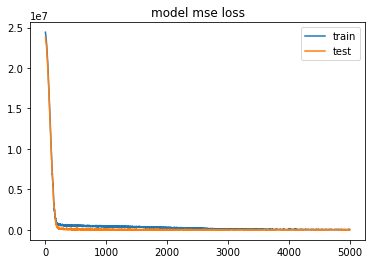

In [37]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse loss')
plt.legend(['train','test'])

In [40]:
h = model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 799us/step - loss: 17529.9785 - mse: 17529.9785 - mae: 102.6696


<h3> Since we are having only 700 dataset, its difficult to get very much accuracy. Here we get (+/-)100 loss which is good

In [41]:
print(" Model loss : ",np.sqrt(h[0]),"\n","Mean absolute error : ",h[2])

 Model loss :  132.40082520749257 
 Mean absolute error :  102.66963195800781
